
**Instalación de librerías**




In [1]:
# Import necessary libs

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from scipy import stats

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# estadística y matemáticas
#import pandas as pd
import scipy.stats as scy
from scipy.stats import kurtosis

# Crea una semilla cualesquiera
seed = 16
np.random.seed(seed)

# Preprocesar label
from sklearn import preprocessing

In [2]:
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300

**Leer los datos del negocio**

In [3]:
## data 
dataset = pd.read_excel('ventas_sebastian.xlsx')
mproductos = pd.read_excel('Maestro_productos.xlsx')
mcanales = pd.read_excel('Maestro_tratamiento.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13755 entries, 0 to 13754
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Oficina de ventas            13755 non-null  object 
 1   Supervisor (Histórico)       13755 non-null  object 
 2   Vendedor (ZV)                13755 non-null  object 
 3   Solicitante                  13755 non-null  object 
 4   Unnamed: 4                   13755 non-null  object 
 5   Material                     13755 non-null  object 
 6   Unnamed: 6                   13755 non-null  object 
 7   Mes natural                  13755 non-null  object 
 8   Año natural                  13755 non-null  int64  
 9   Tratamiento Comercial        13755 non-null  object 
 10  Unnamed: 10                  6881 non-null   object 
 11  
Cantidad Facturada (SD-F)   12792 non-null  float64
 12  
Total Descuentos (SD-F)     1642 non-null   float64
 13  
Facturación Net

In [4]:
#Dimensión de la base de datos original
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13755 entries, 0 to 13754
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Oficina de ventas            13755 non-null  object 
 1   Supervisor (Histórico)       13755 non-null  object 
 2   Vendedor (ZV)                13755 non-null  object 
 3   Solicitante                  13755 non-null  object 
 4   Unnamed: 4                   13755 non-null  object 
 5   Material                     13755 non-null  object 
 6   Unnamed: 6                   13755 non-null  object 
 7   Mes natural                  13755 non-null  object 
 8   Año natural                  13755 non-null  int64  
 9   Tratamiento Comercial        13755 non-null  object 
 10  Unnamed: 10                  6881 non-null   object 
 11  
Cantidad Facturada (SD-F)   12792 non-null  float64
 12  
Total Descuentos (SD-F)     1642 non-null   float64
 13  
Facturación Net

In [5]:
#dataset[dataset['Ano'] == "2017"].head(100)

# Tratamiento de datos

## Tratamiento de valores nulos

In [6]:
print("Número de observaciones = {}".format(dataset.shape[0]))
print("Total de variables disponibles = {}".format(dataset.columns.shape[0]))
print("Columnas que cuentan con algún valor nulo-")
print(dataset.isnull().sum())

Número de observaciones = 13755
Total de variables disponibles = 16
Columnas que cuentan con algún valor nulo-
Oficina de ventas                   0
Supervisor (Histórico)              0
Vendedor (ZV)                       0
Solicitante                         0
Unnamed: 4                          0
Material                            0
Unnamed: 6                          0
Mes natural                         0
Año natural                         0
Tratamiento Comercial               0
Unnamed: 10                      6874
\nCantidad Facturada (SD-F)       963
\nTotal Descuentos (SD-F)       12113
\nFacturación Neta SF (SD-F)     3252
\nCuota de venta                12887
\n% Cumplimiento                13755
dtype: int64


In [7]:
dataset = dataset.fillna(0)
dataset

Oficina de ventas   Supervisor (Histórico)         Vendedor (ZV)  \
0            Of.QS F&C Lima     VIRGINIA LUCIA BAYLY   DANIEL ALONSO TELLO   
1            Of.QS F&C Lima     VIRGINIA LUCIA BAYLY   DANIEL ALONSO TELLO   
2            Of.QS F&C Lima     VIRGINIA LUCIA BAYLY   DANIEL ALONSO TELLO   
3            Of.QS F&C Lima     VIRGINIA LUCIA BAYLY   DANIEL ALONSO TELLO   
4            Of.QS F&C Lima     VIRGINIA LUCIA BAYLY   DANIEL ALONSO TELLO   
...                     ...                      ...                   ...   
13750  Of.QS F&C Ayacu-Huan     FRANK RUBEN ESPINOZA  ROMEL ALCIDES LLACSA   
13751        Of.QS F&C Puno  (X)IVAN PAVEL MANGHIERT  ROSARIO JANET FLORES   
13752        Of.QS F&C Puno  (X)IVAN PAVEL MANGHIERT  ROSARIO JANET FLORES   
13753        Of.QS F&C Puno  (X)IVAN PAVEL MANGHIERT  ROSARIO JANET FLORES   
13754        Of.QS F&C Puno  (X)IVAN PAVEL MANGHIERT  ROSARIO JANET FLORES   

      Solicitante                   Unnamed: 4 Material  \
0          357193    (I)MARCO ALDANY PERU S.A.   536696   
1          357193    (I)MARCO ALDANY PERU S.A.   536696   
2          357193    (I)MARCO ALDANY PERU S.A.   536706   
3          357193    (I)MARCO ALDANY PERU S.A.   536706   
4          357193    (I)MARCO ALDANY PERU S.A.   536706   
...           ...                          ...      ...   
13750      448738  FIGARO PELUQUERIAS E.I.R.L.   568297   
13751           #                  Sin asignar        #   
13752           #                  Sin asignar        #   
13753           #                  Sin asignar        #   
13754           #                  Sin asignar        #   

                          Unnamed: 6 Mes natural  Año natural  \
0            SEB SHAPER FIERCE 400ML       Enero         2017   
1            SEB SHAPER FIERCE 400ML       Enero         2017   
2      SEB PENETRAITT SHAMPOO 1000ML       Enero         2017   
3      SEB PENETRAITT SHAMPOO 1000ML       Enero         2017   
4      SEB PENETRAITT SHAMPOO 1000ML     Febrero         2017   
...                              ...         ...          ...   
13750        SEBMAN PLAYER GEL 150ML   Diciembre         2020   
13751                    Sin asignar        Mayo         2020   
13752                    Sin asignar        Mayo         2020   
13753                    Sin asignar       Junio         2020   
13754                    Sin asignar       Junio         2020   

      Tratamiento Comercial           Unnamed: 10  \
0                        62    Salones de Belleza   
1                 Resultado                     0   
2                        62    Salones de Belleza   
3                 Resultado                     0   
4                        62    Salones de Belleza   
...                     ...                   ...   
13750             Resultado                     0   
13751                     #  OTROS CANALES TRADIC   
13752             Resultado                     0   
13753                     #  OTROS CANALES TRADIC   
13754             Resultado                     0   

       \nCantidad Facturada (SD-F)  \nTotal Descuentos (SD-F)  \
0                              1.0                     -22.16   
1                              1.0                     -22.16   
2                              2.0                     -83.04   
3                              2.0                     -83.04   
4                              1.0                     -41.52   
...                            ...                        ...   
13750                        -48.0                       0.00   
13751                          0.0                       0.00   
13752                          0.0                       0.00   
13753                          0.0                       0.00   
13754                          0.0                       0.00   

       \nFacturación Neta SF (SD-F)  \nCuota de venta  \n% Cumplimiento  
0                             33.24              0.00               0.0  
1                

In [8]:
print(dataset.isnull().sum())

Oficina de ventas               0
Supervisor (Histórico)          0
Vendedor (ZV)                   0
Solicitante                     0
Unnamed: 4                      0
Material                        0
Unnamed: 6                      0
Mes natural                     0
Año natural                     0
Tratamiento Comercial           0
Unnamed: 10                     0
\nCantidad Facturada (SD-F)     0
\nTotal Descuentos (SD-F)       0
\nFacturación Neta SF (SD-F)    0
\nCuota de venta                0
\n% Cumplimiento                0
dtype: int64


# Transformación de datos

In [9]:
#Cambio de nombres de columnas
dataset.rename(columns={'Oficina de ventas':'Oficina_ventas'},inplace = True)
dataset.rename(columns={'Supervisor (Histórico)':'Nombre_Supervisor'},inplace = True)
dataset.rename(columns={'Vendedor (ZV)':'Nombre_Vendedor'},inplace = True)
dataset.rename(columns={'Solicitante':'Cod_solicitante'},inplace = True)
dataset.rename(columns={'Unnamed: 4':'Solicitante'},inplace = True)
dataset.rename(columns={'Material':'Cod_producto'},inplace = True)
dataset.rename(columns={'Unnamed: 6':'Producto'},inplace = True)
dataset.rename(columns={'Mes natural':'Mes'},inplace = True)
dataset.rename(columns={'Año natural':'Ano'},inplace = True)
dataset.rename(columns={'Tratamiento Comercial':'Cod_tratamiento'},inplace = True)
dataset.rename(columns={'Unnamed: 10':'Tratamiento_comercial1'},inplace = True)
dataset.rename(columns={'\nCantidad Facturada (SD-F)':'Cant_facturada'},inplace = True)
dataset.rename(columns={'\nTotal Descuentos (SD-F)':'Total_descuentos'},inplace = True)
dataset.rename(columns={'\nFacturación Neta SF (SD-F)':'Facturacion_neta'},inplace = True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13755 entries, 0 to 13754
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          13755 non-null  object 
 1   Nombre_Supervisor       13755 non-null  object 
 2   Nombre_Vendedor         13755 non-null  object 
 3   Cod_solicitante         13755 non-null  object 
 4   Solicitante             13755 non-null  object 
 5   Cod_producto            13755 non-null  object 
 6   Producto                13755 non-null  object 
 7   Mes                     13755 non-null  object 
 8   Ano                     13755 non-null  int64  
 9   Cod_tratamiento         13755 non-null  object 
 10  Tratamiento_comercial1  13755 non-null  object 
 11  Cant_facturada          13755 non-null  float64
 12  Total_descuentos        13755 non-null  float64
 13  Facturacion_neta        13755 non-null  float64
 14  
Cuota de venta         13755 non-null

In [10]:
#Tratamiento de datos que aplican en el area de ventas
dataset = dataset.drop(dataset[dataset['Cod_tratamiento']=="Resultado"].index) #eliminamos errores de SAP
dataset = dataset.drop(dataset[dataset['Cod_producto']=="#"].index) #eliminamos errores de SAP
dataset = dataset.drop(['\nCuota de venta','\n% Cumplimiento'], axis=1) #eliminamos columnas que no se usan
dataset["Tratamiento_comercial1"] = dataset["Tratamiento_comercial1"].str.lower() #unificamos errores de escritura de tratamiento comercial
dataset['Cod_producto']= pd.to_numeric(dataset['Cod_producto'])
mproductos.rename(columns={'CODIGO QS':'Cod_producto'},inplace = True)
dataset = pd.merge(left=dataset,right=mproductos, how='left', left_on='Cod_producto', right_on='Cod_producto') #agregamos columnas del maestro de productos
dataset = dataset.drop(['DESCRIPCIÓN DEL PRODUCTO','COSTO UNITARIO'], axis=1) #borramos columnas que no nocesitamos
mcanales.rename(columns={'Tratamiento comercial 1':'Tratamiento_comercial1'},inplace = True)
mcanales["Tratamiento_comercial1"] = mcanales["Tratamiento_comercial1"].str.lower() #unificamos errores de escritura de tratamiento comercial
dataset = pd.merge(left=dataset,right=mcanales, how='left', left_on='Tratamiento_comercial1', right_on='Tratamiento_comercial1') #agregamos columnas del maestro de productos
dataset.rename(columns={'Tratamiento comercial 2':'Canales'},inplace = True)
dataset['Total_descuentos'] = dataset['Total_descuentos'].abs()
dataset["Cod_producto"] = dataset["Cod_producto"].astype(str) 
dataset["Cod_solicitante"] = dataset["Cod_solicitante"].astype(str) 
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6555 entries, 0 to 6554
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          6555 non-null   object 
 1   Nombre_Supervisor       6555 non-null   object 
 2   Nombre_Vendedor         6555 non-null   object 
 3   Cod_solicitante         6555 non-null   object 
 4   Solicitante             6555 non-null   object 
 5   Cod_producto            6555 non-null   object 
 6   Producto                6555 non-null   object 
 7   Mes                     6555 non-null   object 
 8   Ano                     6555 non-null   int64  
 9   Cod_tratamiento         6555 non-null   object 
 10  Tratamiento_comercial1  6555 non-null   object 
 11  Cant_facturada          6555 non-null   float64
 12  Total_descuentos        6555 non-null   float64
 13  Facturacion_neta        6555 non-null   float64
 14  CATEGORIA               6505 non-null   

In [11]:

#Realizamos cambios en la data y creamos columnas para facilitar el analisis
dataset['Mes'] = dataset['Mes'].replace(['Enero'],'01')
dataset['Mes'] = dataset['Mes'].replace(['Febrero'],'02')
dataset['Mes'] = dataset['Mes'].replace(['Marzo'],'03')
dataset['Mes'] = dataset['Mes'].replace(['Abril'],'04')
dataset['Mes'] = dataset['Mes'].replace(['Mayo'],'05')
dataset['Mes'] = dataset['Mes'].replace(['Junio'],'06')
dataset['Mes'] = dataset['Mes'].replace(['Julio'],'07')
dataset['Mes'] = dataset['Mes'].replace(['Agosto'],'08')
dataset['Mes'] = dataset['Mes'].replace(['Septiembre'],'09')
dataset['Mes'] = dataset['Mes'].replace(['Octubre'],'10')
dataset['Mes'] = dataset['Mes'].replace(['Noviembre'],'11')
dataset['Mes'] = dataset['Mes'].replace(['Diciembre'],'12')

#dataset['COVID'] = dataset['Mes'].replace(['Diciembre'],'12')
#dataset['Mes']= dataset['Mes'].astype('string')
#dataset['Ano']= dataset['Ano'].astype('string')
#dataset['Cod_producto']= dataset['Cod_producto'].astype('string')




dataset

dataset['Ano']=dataset['Ano'].replace("[,""]","", regex=True)
dataset['Ano']= dataset['Ano'].astype(str)
dataset['Ano_Mes'] = dataset['Ano']+dataset['Mes']
dataset['Ano_Mes']= dataset['Ano_Mes'].astype(int)
dataset['Cerrado_COVID'] = ["1" if x == 202003 or x == 202004 or x == 202005 or x == 202006 else "0" for x in dataset['Ano_Mes']]
dataset['Covid'] = ["1" if x >=202003 else "0" for x in dataset['Ano_Mes']] 
#dataset['Mes']= dataset['Mes'].astype('string')
#dataset['Ano']= dataset['Ano'].astype('string')
#dataset['Cod_producto']= dataset['Cod_producto'].astype('string')

dataset.reset_index()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6555 entries, 0 to 6554
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          6555 non-null   object 
 1   Nombre_Supervisor       6555 non-null   object 
 2   Nombre_Vendedor         6555 non-null   object 
 3   Cod_solicitante         6555 non-null   object 
 4   Solicitante             6555 non-null   object 
 5   Cod_producto            6555 non-null   object 
 6   Producto                6555 non-null   object 
 7   Mes                     6555 non-null   object 
 8   Ano                     6555 non-null   object 
 9   Cod_tratamiento         6555 non-null   object 
 10  Tratamiento_comercial1  6555 non-null   object 
 11  Cant_facturada          6555 non-null   float64
 12  Total_descuentos        6555 non-null   float64
 13  Facturacion_neta        6555 non-null   float64
 14  CATEGORIA               6505 non-null   

In [12]:
dataset['id_venta'] = dataset['Ano']+dataset['Mes']+dataset['Cod_solicitante']
dataset['id_prod'] = dataset['Ano']+dataset['Mes']+dataset['Cod_producto']
dataset.head()

Oficina_ventas     Nombre_Supervisor      Nombre_Vendedor Cod_solicitante  \
0  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO          357193   
1  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO          357193   
2  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO          357193   
3  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO          357193   
4  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO          357193   

                 Solicitante Cod_producto                       Producto Mes  \
0  (I)MARCO ALDANY PERU S.A.       536696        SEB SHAPER FIERCE 400ML  01   
1  (I)MARCO ALDANY PERU S.A.       536706  SEB PENETRAITT SHAMPOO 1000ML  01   
2  (I)MARCO ALDANY PERU S.A.       536706  SEB PENETRAITT SHAMPOO 1000ML  02   
3  (I)MARCO ALDANY PERU S.A.       536706  SEB PENETRAITT SHAMPOO 1000ML  03   
4  (I)MARCO ALDANY PERU S.A.       536706  SEB PENETRAITT SHAMPOO 1000ML  04   

    Ano Cod_tratamiento Tratamiento_comercial1  Cant_facturada  \
0  2017              62     salones de belleza             1.0   
1  2017              62     salones de belleza             2.0   
2  2017              62     salones de belleza             1.0   
3  2017              62     salones de belleza             1.0   
4  2017              62     salones de belleza             2.0   

   Total_descuentos  Facturacion_neta   CATEGORIA     TIPO  \
0             22.16             33.24        FORM  AEROSOL   
1             83.04            124.56  FOUNDATION  SHAMPOO   
2             41.52             62.28  FOUNDATION  SHAMPOO   
3             41.52             62.28  FOUNDATION  SHAMPOO   
4             83.04            124.56  FOUNDATION  SHAMPOO   

              Canales  Ano_Mes Cerrado_COVID Covid      id_venta       id_prod  
0  Salones de Belleza   201701             0     0  201701357193  201701536696  
1  Salones de Belleza   201701             0     0  201701357193  201701536706  
2  Salones de Belleza   201702             0     0  201702357193  201702536706  
3  Salones de Belleza   201703             0     0  201703357193  201703536706  
4  Salones de Belleza   201704             0     0  201704357193  201704536706

### Diferenciacion de data

In [13]:
dataset = dataset.drop_duplicates()
dataset

Oficina_ventas               Nombre_Supervisor  \
0           Of.QS F&C Lima            VIRGINIA LUCIA BAYLY   
1           Of.QS F&C Lima            VIRGINIA LUCIA BAYLY   
2           Of.QS F&C Lima            VIRGINIA LUCIA BAYLY   
3           Of.QS F&C Lima            VIRGINIA LUCIA BAYLY   
4           Of.QS F&C Lima            VIRGINIA LUCIA BAYLY   
...                    ...                             ...   
6550  Of.QS F&C Junin-Pasc            JUAN CARLOS MARTINEZ   
6551  Of.QS F&C Junin-Pasc            JUAN CARLOS MARTINEZ   
6552  Of.QS F&C Cajam-Amaz  CARLOS ENRIQUE VASQUEZ HURTADO   
6553  Of.QS F&C Ayacu-Huan            FRANK RUBEN ESPINOZA   
6554  Of.QS F&C Ayacu-Huan            FRANK RUBEN ESPINOZA   

                     Nombre_Vendedor Cod_solicitante  \
0                DANIEL ALONSO TELLO          357193   
1                DANIEL ALONSO TELLO          357193   
2                DANIEL ALONSO TELLO          357193   
3                DANIEL ALONSO TELLO          357193   
4                DANIEL ALONSO TELLO          357193   
...                              ...             ...   
6550                      CIRO PRADO          452268   
6551                      CIRO PRADO          452268   
6552  ROSMERY YANINA JULCA CASTAÑEDA          333423   
6553            ROMEL ALCIDES LLACSA          448738   
6554            ROMEL ALCIDES LLACSA          448738   

                        Solicitante Cod_producto  \
0         (I)MARCO ALDANY PERU S.A.       536696   
1         (I)MARCO ALDANY PERU S.A.       536706   
2         (I)MARCO ALDANY PERU S.A.       536706   
3         (I)MARCO ALDANY PERU S.A.       536706   
4         (I)MARCO ALDANY PERU S.A.       536706   
...                             ...          ...   
6550        RODRIGUEZ SALAZAR RONNY       220302   
6551        RODRIGUEZ SALAZAR RONNY       221183   
6552  AGUERO OLIVOS DOMINGO ANTONIO       536720   
6553    FIGARO PELUQUERIAS E.I.R.L.       568297   
6554    FIGARO PELUQUERIAS E.I.R.L.       568297   

                           Producto Mes   Ano Cod_tratamiento  \
0           SEB SHAPER FIERCE 400ML  01  2017              62   
1     SEB PENETRAITT SHAMPOO 1000ML  01  2017              62   
2     SEB PENETRAITT SHAMPOO 1000ML  02  2017              62   
3     SEB PENETRAITT SHAMPOO 1000ML  03  2017              62   
4     SEB PENETRAITT SHAMPOO 1000ML  04  2017              62   
...                             ...  ..   ...             ...   
6550           PACK SEBASTIAN HYDRE  12  2020              AD   
6551      PACK SEBASTIAN PENETRAITT  12  2020              AD   
6552    SEB POTION 9 STYL TRT 150ML  01  2020              AR   
6553        SEBMAN PLAYER GEL 150ML  08  2020              AR   
6554        SEBMAN PLAYER GEL 150ML  12  2020              AR   

     Tratamiento_comercial1  Cant_facturada  Total_descuentos  \
0        salones de belleza             1.0             22.16   
1        salones de belleza             2.0             83.04   
2        salones de belleza             1.0             41.52   
3        salones de belleza             1.0             41.52   
4        salones de belleza             2.0             83.04   
...                     ...             ...               ...   
6550       farmacias indep.             1.0              0.00   
6551       farmacias indep.             1.0              0.00   
6552     salones de belleza             4.0              0.00   
6553     salones de belleza            96.0              0.00   
6554     salones de belleza           -48.0              0.00   

      Facturacion_neta   CATEGORIA     TIPO             Canales  Ano_Mes  \
0                33.24        FORM  AEROSOL  Salones de Belleza   201701   
1               124.56  FOUNDATION  SHAMPOO  Salones de Belleza   201701   
2                62.28  FOUNDATION  SHAMPOO  Salones de Belleza   201702   
3                62.28  FOUNDATION  SHAMPOO  Salones de Belleza   201703   
4               124.56  FOU

In [14]:
#Para crear el dataframe de ventas, retiramos los otros escenarios encontrados en el reporte como: rebates, devoluciones, regalos
ventas = dataset.drop(dataset[dataset['Cant_facturada'] <= 0 ].index) #eliminamos los rebates(sin cantidad) y devoluciones (cantidades negativas) para quedarnos solo con las ventas
ventas = ventas.drop(ventas[ventas['Facturacion_neta'] <= 1 ].index) #eliminamos los regalos promocionales (no generan ganancias)
ventas['Facturacion_neta'] = ventas['Facturacion_neta'].abs()
ventas['precio_venta_cd'] = ventas['Facturacion_neta']/ventas['Cant_facturada']
ventas['precio_venta_sd'] = (ventas['Facturacion_neta']+ ventas['Total_descuentos'])/ventas['Cant_facturada']

ventas2020 = ventas.drop(ventas[ventas['Ano'] != "2020" ].index)
ventas2017 = ventas.drop(ventas[ventas['Ano'] != "2017" ].index)
ventas2017.info()

#ventas['ID_CORRELATIVO'] =   ventas['ID_CORRELATIVO'].apply(lambda x: '{0:0>7}'.format(x))
#ventas = ventas.sort_values(['ID_CORRELATIVO'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261 entries, 0 to 6512
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          1261 non-null   object 
 1   Nombre_Supervisor       1261 non-null   object 
 2   Nombre_Vendedor         1261 non-null   object 
 3   Cod_solicitante         1261 non-null   object 
 4   Solicitante             1261 non-null   object 
 5   Cod_producto            1261 non-null   object 
 6   Producto                1261 non-null   object 
 7   Mes                     1261 non-null   object 
 8   Ano                     1261 non-null   object 
 9   Cod_tratamiento         1261 non-null   object 
 10  Tratamiento_comercial1  1261 non-null   object 
 11  Cant_facturada          1261 non-null   float64
 12  Total_descuentos        1261 non-null   float64
 13  Facturacion_neta        1261 non-null   float64
 14  CATEGORIA               1261 non-null   

In [15]:
#Para crear el dataframe de devoluciones
devoluciones = dataset.drop(dataset[dataset['Cant_facturada'] >= 0 ].index)
devoluciones = devoluciones.drop(devoluciones[devoluciones['Facturacion_neta'] >= 0 ].index)
devoluciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 240 to 6554
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          105 non-null    object 
 1   Nombre_Supervisor       105 non-null    object 
 2   Nombre_Vendedor         105 non-null    object 
 3   Cod_solicitante         105 non-null    object 
 4   Solicitante             105 non-null    object 
 5   Cod_producto            105 non-null    object 
 6   Producto                105 non-null    object 
 7   Mes                     105 non-null    object 
 8   Ano                     105 non-null    object 
 9   Cod_tratamiento         105 non-null    object 
 10  Tratamiento_comercial1  105 non-null    object 
 11  Cant_facturada          105 non-null    float64
 12  Total_descuentos        105 non-null    float64
 13  Facturacion_neta        105 non-null    float64
 14  CATEGORIA               105 non-null   

In [16]:
#Para crear el dataframe de rebates
rebates = dataset.drop(dataset[dataset['Cant_facturada'] != 0 ].index)
rebates = rebates.drop(rebates[rebates['Facturacion_neta'] >= 1 ].index)
rebates=rebates.reset_index()
rebates=rebates.drop(['index'], axis=1)
rebates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          47 non-null     object 
 1   Nombre_Supervisor       47 non-null     object 
 2   Nombre_Vendedor         47 non-null     object 
 3   Cod_solicitante         47 non-null     object 
 4   Solicitante             47 non-null     object 
 5   Cod_producto            47 non-null     object 
 6   Producto                47 non-null     object 
 7   Mes                     47 non-null     object 
 8   Ano                     47 non-null     object 
 9   Cod_tratamiento         47 non-null     object 
 10  Tratamiento_comercial1  47 non-null     object 
 11  Cant_facturada          47 non-null     float64
 12  Total_descuentos        47 non-null     float64
 13  Facturacion_neta        47 non-null     float64
 14  CATEGORIA               46 non-null     obje

In [17]:
#Para crear el dataframe de devoluciones
promocional = dataset.drop(dataset[dataset['Facturacion_neta'] > 1 ].index)
promocional = promocional.drop(promocional[promocional['Cant_facturada'] < 0 ].index)



promocional.head()

Oficina_ventas     Nombre_Supervisor      Nombre_Vendedor  \
130  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
131  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
132  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
133  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
134  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   

    Cod_solicitante                          Solicitante Cod_producto  \
130          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       216030   
131          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       216030   
132          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       221091   
133          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       232946   
134          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       232946   

                  Producto Mes   Ano Cod_tratamiento Tratamiento_comercial1  \
130  BOLSA PAPEL SEBASTIAN  10  2020              AR     salones de belleza   
131  BOLSA PAPEL SEBASTIAN  12  2020              AR     salones de belleza   
132         CAPA SEBASTIAN  10  2020              AR     salones de belleza   
133       TOALLA SEBASTIAN  10  2020              AR     salones de belleza   
134       TOALLA SEBASTIAN  12  2020              AR     salones de belleza   

     Cant_facturada  Total_descuentos  Facturacion_neta CATEGORIA TIPO  \
130            60.0               0.0               0.0       POP  POP   
131            30.0               0.0               0.0       POP  POP   
132            12.0               0.0               0.0       POP  POP   
133            10.0               0.0               0.0       POP  POP   
134             7.0               0.0               0.0       POP  POP   

                Canales  Ano_Mes Cerrado_COVID Covid      id_venta  \
130  Salones de Belleza   202010             0     1  202010457220   
131  Salones de Belleza   202012             0     1  202012457220   
132  Salones de Belleza   202010             0     1  202010457220   
133  Salones de Belleza   202010             0     1  202010457220   
134  Salones de Belleza   202012             0     1  202012457220   

          id_prod  
130  202010216030  
131  202012216030  
132  202010221091  
133  202010232946  
134  202012232946

In [18]:
#Para crear el dataframe de defectuosos devueltos
promocional = dataset.drop(dataset[dataset['Facturacion_neta'] <0 ].index)
promocional = promocional.drop(promocional[promocional['Facturacion_neta']> 1].index)
promocional.head()

Oficina_ventas     Nombre_Supervisor      Nombre_Vendedor  \
130  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
131  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
132  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
133  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
134  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   

    Cod_solicitante                          Solicitante Cod_producto  \
130          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       216030   
131          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       216030   
132          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       221091   
133          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       232946   
134          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       232946   

                  Producto Mes   Ano Cod_tratamiento Tratamiento_comercial1  \
130  BOLSA PAPEL SEBASTIAN  10  2020              AR     salones de belleza   
131  BOLSA PAPEL SEBASTIAN  12  2020              AR     salones de belleza   
132         CAPA SEBASTIAN  10  2020              AR     salones de belleza   
133       TOALLA SEBASTIAN  10  2020              AR     salones de belleza   
134       TOALLA SEBASTIAN  12  2020              AR     salones de belleza   

     Cant_facturada  Total_descuentos  Facturacion_neta CATEGORIA TIPO  \
130            60.0               0.0               0.0       POP  POP   
131            30.0               0.0               0.0       POP  POP   
132            12.0               0.0               0.0       POP  POP   
133            10.0               0.0               0.0       POP  POP   
134             7.0               0.0               0.0       POP  POP   

                Canales  Ano_Mes Cerrado_COVID Covid      id_venta  \
130  Salones de Belleza   202010             0     1  202010457220   
131  Salones de Belleza   202012             0     1  202012457220   
132  Salones de Belleza   202010             0     1  202010457220   
133  Salones de Belleza   202010             0     1  202010457220   
134  Salones de Belleza   202012             0     1  202012457220   

          id_prod  
130  202010216030  
131  202012216030  
132  202010221091  
133  202010232946  
134  202012232946

# Análisis exploratorio de los datos - Ventas

In [19]:
#Consultamos la dimension de la base de datos con el tratamiento de datos
ventas.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5095 entries, 0 to 6553
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          5095 non-null   object 
 1   Nombre_Supervisor       5095 non-null   object 
 2   Nombre_Vendedor         5095 non-null   object 
 3   Cod_solicitante         5095 non-null   object 
 4   Solicitante             5095 non-null   object 
 5   Cod_producto            5095 non-null   object 
 6   Producto                5095 non-null   object 
 7   Mes                     5095 non-null   object 
 8   Ano                     5095 non-null   object 
 9   Cod_tratamiento         5095 non-null   object 
 10  Tratamiento_comercial1  5095 non-null   object 
 11  Cant_facturada          5095 non-null   float64
 12  Total_descuentos        5095 non-null   float64
 13  Facturacion_neta        5095 non-null   float64
 14  CATEGORIA               5095 non-null   

In [20]:
ventas.head()

Oficina_ventas     Nombre_Supervisor      Nombre_Vendedor Cod_solicitante  \
0  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO          357193   
1  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO          357193   
2  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO          357193   
3  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO          357193   
4  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO          357193   

                 Solicitante Cod_producto                       Producto Mes  \
0  (I)MARCO ALDANY PERU S.A.       536696        SEB SHAPER FIERCE 400ML  01   
1  (I)MARCO ALDANY PERU S.A.       536706  SEB PENETRAITT SHAMPOO 1000ML  01   
2  (I)MARCO ALDANY PERU S.A.       536706  SEB PENETRAITT SHAMPOO 1000ML  02   
3  (I)MARCO ALDANY PERU S.A.       536706  SEB PENETRAITT SHAMPOO 1000ML  03   
4  (I)MARCO ALDANY PERU S.A.       536706  SEB PENETRAITT SHAMPOO 1000ML  04   

    Ano Cod_tratamiento Tratamiento_comercial1  Cant_facturada  \
0  2017              62     salones de belleza             1.0   
1  2017              62     salones de belleza             2.0   
2  2017              62     salones de belleza             1.0   
3  2017              62     salones de belleza             1.0   
4  2017              62     salones de belleza             2.0   

   Total_descuentos  Facturacion_neta   CATEGORIA     TIPO  \
0             22.16             33.24        FORM  AEROSOL   
1             83.04            124.56  FOUNDATION  SHAMPOO   
2             41.52             62.28  FOUNDATION  SHAMPOO   
3             41.52             62.28  FOUNDATION  SHAMPOO   
4             83.04            124.56  FOUNDATION  SHAMPOO   

              Canales  Ano_Mes Cerrado_COVID Covid      id_venta  \
0  Salones de Belleza   201701             0     0  201701357193   
1  Salones de Belleza   201701             0     0  201701357193   
2  Salones de Belleza   201702             0     0  201702357193   
3  Salones de Belleza   201703             0     0  201703357193   
4  Salones de Belleza   201704             0     0  201704357193   

        id_prod  precio_venta_cd  precio_venta_sd  
0  201701536696            33.24             55.4  
1  201701536706            62.28            103.8  
2  201702536706            62.28            103.8  
3  201703536706            62.28            103.8  
4  201704536706            62.28            103.8

In [21]:
ventas.nunique()

Oficina_ventas              10
Nombre_Supervisor           23
Nombre_Vendedor             31
Cod_solicitante            390
Solicitante                390
Cod_producto                86
Producto                    86
Mes                         12
Ano                          4
Cod_tratamiento             14
Tratamiento_comercial1      12
Cant_facturada              74
Total_descuentos           334
Facturacion_neta           936
CATEGORIA                   10
TIPO                        17
Canales                      3
Ano_Mes                     48
Cerrado_COVID                2
Covid                        2
id_venta                  1443
id_prod                   1781
precio_venta_cd            769
precio_venta_sd            570
dtype: int64

In [22]:
ventas.dtypes


Oficina_ventas             object
Nombre_Supervisor          object
Nombre_Vendedor            object
Cod_solicitante            object
Solicitante                object
Cod_producto               object
Producto                   object
Mes                        object
Ano                        object
Cod_tratamiento            object
Tratamiento_comercial1     object
Cant_facturada            float64
Total_descuentos          float64
Facturacion_neta          float64
CATEGORIA                  object
TIPO                       object
Canales                    object
Ano_Mes                     int32
Cerrado_COVID              object
Covid                      object
id_venta                   object
id_prod                    object
precio_venta_cd           float64
precio_venta_sd           float64
dtype: object

In [23]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5095 entries, 0 to 6553
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          5095 non-null   object 
 1   Nombre_Supervisor       5095 non-null   object 
 2   Nombre_Vendedor         5095 non-null   object 
 3   Cod_solicitante         5095 non-null   object 
 4   Solicitante             5095 non-null   object 
 5   Cod_producto            5095 non-null   object 
 6   Producto                5095 non-null   object 
 7   Mes                     5095 non-null   object 
 8   Ano                     5095 non-null   object 
 9   Cod_tratamiento         5095 non-null   object 
 10  Tratamiento_comercial1  5095 non-null   object 
 11  Cant_facturada          5095 non-null   float64
 12  Total_descuentos        5095 non-null   float64
 13  Facturacion_neta        5095 non-null   float64
 14  CATEGORIA               5095 non-null   

**Variables cuantitativas para un análisis descriptivo**

In [24]:
#target
target = ['Factiracion_neta']  

# data continua comercial
var_1 = ["Cant_facturada", "Total_descuentos","Facturacion_neta"]


In [25]:
var_1

['Cant_facturada', 'Total_descuentos', 'Facturacion_neta']

In [26]:
ventas[var_1].describe()

Cant_facturada  Total_descuentos  Facturacion_neta
count     5095.000000       5095.000000       5095.000000
mean        10.998037          8.397025        612.940332
std         11.477329         51.364581        767.690067
min          1.000000          0.000000         12.710000
25%          4.000000          0.000000        178.200000
50%          8.000000          0.000000        374.850000
75%         16.000000          0.000000        711.600000
max        140.000000       1409.760000      13729.200000

In [27]:
print(ventas.Producto.value_counts())
print(ventas.Producto.value_counts(normalize=True))

SEB POTION 9 STYL TRT 150ML                391
SEB PENETRAITT SHAMPOO 250ML               253
SEB PENETRAITT CONDITION 250ML             224
SEB PENETRAITT SHAMPOO 1000ML              218
SEB POTION 9 STYL TRT 500ML                206
SEB DARK OIL 95ML                          206
SEB HYDRE SHAMPOO 250ML                    191
SEB PENETRAITT MASQUE 150ml                182
SEB PENETRAITT CONDIT. 1000ML              170
SEB PENETRAITT PRO MASQUE 500ML            155
SEB TRILLIANCE SHP 250ML                   139
SEB RE-SHAPER 400ML                        135
SEB HYDRE CONDITIONER 250ML                119
SEB WHIPPED CREME 150ML                    118
PACK SEBASTIAN PENETRAITT                  101
SEB TRILLIANCE SHP 1000ML                   95
SEB GEL FORTE STRONG 200ML                  93
SEB CELLOPHANES ICE BLOND 300 ML            89
SEB HYDRE SHAMPOO 1000ML                    83
SEB SHAPER ZERO GRAV. 400ML                 82
SEB SHAPER FIERCE 400ML                     81
SEB TRILLIANC

In [28]:
#Medidas de dispersión
std = ventas[var_1].std(ddof=1)
var = ventas[var_1].var(ddof=1)
print(std, var)



Cant_facturada       11.477329
Total_descuentos     51.364581
Facturacion_neta    767.690067
dtype: float64 Cant_facturada         131.729089
Total_descuentos      2638.320187
Facturacion_neta    589348.038831
dtype: float64


In [29]:
#coeficiente de variación
cv = ventas[var_1].std(ddof=0) / ventas[var_1].mean()
cv2 = scy.variation(ventas[var_1])
print(cv)

Cant_facturada      1.043477
Total_descuentos    6.116398
Facturacion_neta    1.252348
dtype: float64


In [30]:
print(cv2)

[1.04347736 6.11639753 1.25234821]


**Medidas de Asimetria**

In [31]:
#Skewness, podemos concluir que la facturacion no es simetrica y tiene cola a la derecha
asimetria = scy.skew(ventas[var_1])
asimetria

array([ 2.87908784, 13.77696048,  4.99545137])

In [32]:
#Kurtosis, variable leptokurtik, sus colas son más largas y gordas, y a menudo su pico central es más alto y más afilado.
kurtosis(ventas[var_1])

array([ 14.79885323, 252.59283694,  45.41780146])

**Variables cualitativas para un análisis descriptivo**

In [33]:
ventas['Canales'].value_counts() 

Salones de Belleza    4844
Mayoristas             142
Sub-distribuidores     109
Name: Canales, dtype: int64

In [34]:
ventas['Producto'].value_counts() 

SEB POTION 9 STYL TRT 150ML                391
SEB PENETRAITT SHAMPOO 250ML               253
SEB PENETRAITT CONDITION 250ML             224
SEB PENETRAITT SHAMPOO 1000ML              218
SEB POTION 9 STYL TRT 500ML                206
SEB DARK OIL 95ML                          206
SEB HYDRE SHAMPOO 250ML                    191
SEB PENETRAITT MASQUE 150ml                182
SEB PENETRAITT CONDIT. 1000ML              170
SEB PENETRAITT PRO MASQUE 500ML            155
SEB TRILLIANCE SHP 250ML                   139
SEB RE-SHAPER 400ML                        135
SEB HYDRE CONDITIONER 250ML                119
SEB WHIPPED CREME 150ML                    118
PACK SEBASTIAN PENETRAITT                  101
SEB TRILLIANCE SHP 1000ML                   95
SEB GEL FORTE STRONG 200ML                  93
SEB CELLOPHANES ICE BLOND 300 ML            89
SEB HYDRE SHAMPOO 1000ML                    83
SEB SHAPER ZERO GRAV. 400ML                 82
SEB SHAPER FIERCE 400ML                     81
SEB TRILLIANC

In [35]:
ventas['Canales'].value_counts(normalize=True) 

Salones de Belleza    0.950736
Mayoristas            0.027870
Sub-distribuidores    0.021394
Name: Canales, dtype: float64

In [36]:
ventas['Solicitante'].value_counts() 

REPRESENTACIONES PROBELA S.A.C.     305
IL SALONE ESTILISTAS S.A.C.         217
CORPORACIÓN PERÚ BELLEZA S.A.C      173
(I)MARCO ALDANY PERU S.A.           130
ONE BLUSH S.A.C.                    125
                                   ... 
LAVALLE ZAPATA, CARLOS EDUARDO        1
(X)RODRIGUEZ GOMEZ TOMAS ALBERTO      1
CASTILLO DEZA SILVIA MARGOT           1
PEREZ QUISPE LORENA GERTRUDES         1
(X)RAMIREZ HIDALGO SAYRA SADUTH       1
Name: Solicitante, Length: 390, dtype: int64

In [37]:
ventas['Oficina_ventas'].value_counts() 

Of.QS F&C Lima          4473
Of.QS F&C La Liberta     260
Of.QS F&C Lambayeque     136
Of.QS F&C Arequipa       110
Of.QS F&C Sur Chico       61
Of.QS F&C Nort.Chico      32
Of.QS F&C Piura-Tumb      19
Of.QS F&C Junin-Pasc       2
Of.QS F&C Ayacu-Huan       1
Of.QS F&C Cajam-Amaz       1
Name: Oficina_ventas, dtype: int64

In [38]:
ventas['Producto'].mode()

0    SEB POTION 9 STYL TRT 150ML
dtype: object

**EDA univariado gráfico**

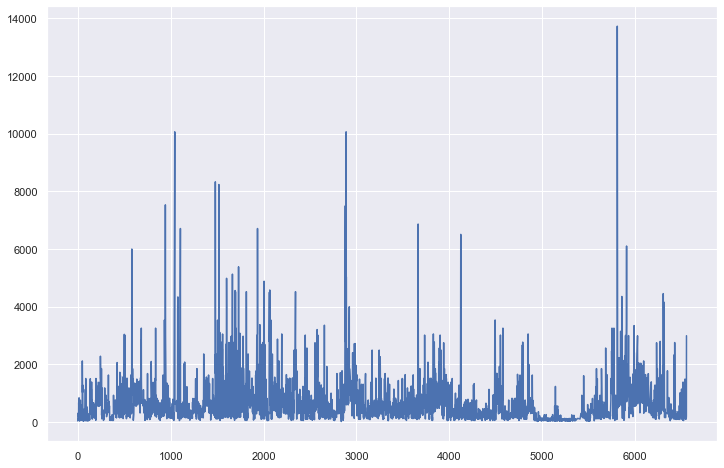

In [39]:
sns.set() 
# Grouped boxplot
plt.figure(figsize=(12,8)) # Generamos una gráfica mas grande y visible

plt.plot(ventas['Facturacion_neta']) 
plt.show();

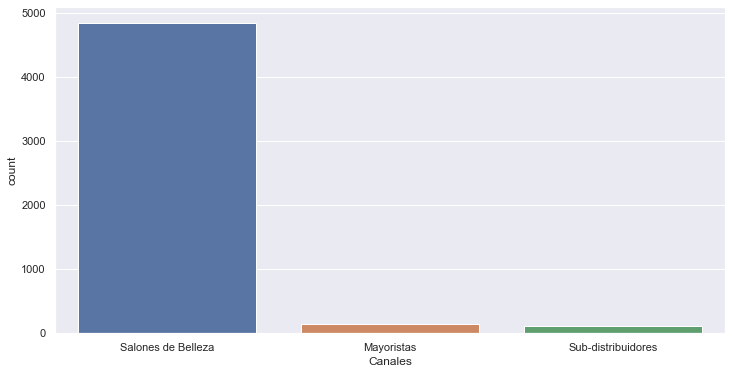

In [40]:
# Cantidad de compras por Canales

sns.set()
plt.figure(figsize=(12,6))
sns.countplot(x = 'Canales',
              data = ventas,
              order = ventas['Canales'].value_counts().index)
plt.show()

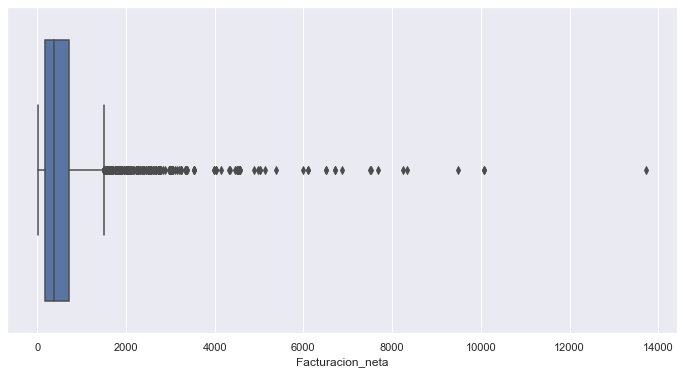

In [41]:
# Grouped boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Facturacion_neta', data=ventas);

**Análisis descriptivo multivariado**

In [42]:
pd.crosstab(ventas['Producto'], ventas['Cant_facturada'],margins=True)

Cant_facturada                           1.0  2.0  3.0  4.0  5.0  6.0  7.0  \
Producto                                                                     
PACK SEBASTIAN HYDRE                       1    0    2    2    1    0    6   
PACK SEBASTIAN PENETRAITT                 18    4    1    4    3    5    1   
PROFESSIONAL SEB DRYNAMIC SH 212ML         0    1    0    1    0    0    0   
PROFESSIONAL SEB DRYNAMIC SH 75ML          0    0    0    1    0    0    0   
PROFESSIONAL SEB SHINE SHAKER 75ML         0    2    0    5    0    0    0   
PROFESSIONAL SEB TEXTURE MAKER 150ML       0    0    1    2    0    1    0   
SEB CELLOPHANES CARAMEL BROWN 300 ML      15    7    8    6    0    3    1   
SEB CELLOPHANES CHOCOLATE BROWN 300 ML     8    5    2    4    0    0    0   
SEB CELLOPHANES CRANBERRY RED 300 ML       9    5    3    2    1    3    0   
SEB CELLOPHANES ESPRESSO BROWN 300 ML     11    7    8    7    3    0    0   
SEB CELLOPHANES HONEY COMB BLOND 300ML    13    6    6    5    3    5    2   
SEB CELLOPHANES ICE BLOND 300 ML          17   12    9   10    5    4    3   
SEB CELLOPHANES SAFFRON RED 300 ML         6    5    4    5    1    1    1   
SEB CELLOPHANES SHINE CLEAR 300 ML         4   11    9    5    4    6    2   
SEB CELLOPHANES VANILLA BLOND 300 ML      15   10    3    8    1    2    0   
SEB COL IGNITE MONO SHP 1000ML             2    4    1    5    1    1    0   
SEB COL IGNITE MONO SHP 250ML              0    1    1    4    1    2    0   
SEB CRAFT CLAY REMOLD 50G                 10    3    0    7    0    0    1   
SEB DARK OIL 95ML                         37    6    2   17    6    2    5   
SEB DARK OIL CONDITIONER 1000ML IV         3    1    0    1    1    0    0   
SEB DARK OIL CONDITIONER 250ML             1    0    0    0    0    0    0   
SEB DARK OIL MASK 150ML                    1    0    0    0    0    8    0   
SEB DARK OIL MASK 500ML                    0    0    0    1    1    0    0   
SEB DARK OIL SHAMPOO 1000ML                1    0    0    2    1    1    0   
SEB DARK OIL SHAMPOO 250ML                 0    1    0    1    1    0    0   
SEB GEL FORTE STRONG 200ML                16    2    2   16    0    3    6   
SEB HYDRE CONDITIONER 1000ML               9    3    9   15    9    3    0   
SEB HYDRE CONDITIONER 250ML               12    7    7   12    3    3    3   
SEB HYDRE SHAMPOO 1000ML                   9    7   10   12    5    3    5   
SEB HYDRE SHAMPOO 250ML                   22    5    8   20    4   10    2   
SEB HYDRE TREATMENT 150ML                 10    4    3   11    0    1    1   
SEB LIQUID GLOSS DEFRIZZ 50ML              0    1    0    0    0    1    0   
SEB LIQUID STEEL STYLER GEL 150ML          5    1    1   13    0    0    1   
SEB MATTE PUTTY SOFT 75G                   4    4    0    4    0    3    0   
SEB MICROWEB FIB ELAST 45ML                2    1    2    8    1    3    0   
SEB MOUSSE FORT/STRONG 200ML               6    4    1    2    0    0    0   
SEB PENETRAITT CONDIT. 1000ML             55   16   12   18   11    7    4   
SEB PENETRAITT CONDITION 250ML            14    7    9   27    7   18    7   
SEB PENETRAITT MASQUE 150ml               29    5    3   17    2    3    4   
SEB PENETRAITT PRO MASQUE 500ML           25    7    3   26    1    2    4   
SEB PENETRAITT SHAMPOO 1000ML             73   12   15   29    9    9    6   
SEB PENETRAITT SHAMPOO 250ML              10    7    6   35    7   17   12   
SEB POTION 9 LITE STYLER 150ml             7    0    2    9    0    2    0   
SEB POTION 9 STYL TRT 150ML               17    2    3   48    2    5   18   
SEB POTION 9 STYL TRT 500ML               30   11    2   28    4    3    5   
SEB RE-SHAPER 400ML                        7   12    8   11    3    2    5   
SEB SHAPER FIERCE 400ML                    7    3    2    9    1    1    4   
SEB SHAPER FIERCE 50ML                     0    0    0    0    0    0    0   
SEB SHAPER ZERO GRAV. 400ML                5    7    8    7    4    2    2   
SEB SHAPER ZERO GRAV. 

In [43]:
pd.crosstab(ventas['Producto'], ventas['Cant_facturada'],margins=True).apply(lambda r: r/len(ventas) *100,
                                                                                        axis=1)

Cant_facturada                                 1.0       2.0       3.0  \
Producto                                                                 
PACK SEBASTIAN HYDRE                      0.019627  0.000000  0.039254   
PACK SEBASTIAN PENETRAITT                 0.353288  0.078508  0.019627   
PROFESSIONAL SEB DRYNAMIC SH 212ML        0.000000  0.019627  0.000000   
PROFESSIONAL SEB DRYNAMIC SH 75ML         0.000000  0.000000  0.000000   
PROFESSIONAL SEB SHINE SHAKER 75ML        0.000000  0.039254  0.000000   
PROFESSIONAL SEB TEXTURE MAKER 150ML      0.000000  0.000000  0.019627   
SEB CELLOPHANES CARAMEL BROWN 300 ML      0.294406  0.137390  0.157017   
SEB CELLOPHANES CHOCOLATE BROWN 300 ML    0.157017  0.098135  0.039254   
SEB CELLOPHANES CRANBERRY RED 300 ML      0.176644  0.098135  0.058881   
SEB CELLOPHANES ESPRESSO BROWN 300 ML     0.215898  0.137390  0.157017   
SEB CELLOPHANES HONEY COMB BLOND 300ML    0.255152  0.117763  0.117763   
SEB CELLOPHANES ICE BLOND 300 ML          0.333660  0.235525  0.176644   
SEB CELLOPHANES SAFFRON RED 300 ML        0.117763  0.098135  0.078508   
SEB CELLOPHANES SHINE CLEAR 300 ML        0.078508  0.215898  0.176644   
SEB CELLOPHANES VANILLA BLOND 300 ML      0.294406  0.196271  0.058881   
SEB COL IGNITE MONO SHP 1000ML            0.039254  0.078508  0.019627   
SEB COL IGNITE MONO SHP 250ML             0.000000  0.019627  0.019627   
SEB CRAFT CLAY REMOLD 50G                 0.196271  0.058881  0.000000   
SEB DARK OIL 95ML                         0.726202  0.117763  0.039254   
SEB DARK OIL CONDITIONER 1000ML IV        0.058881  0.019627  0.000000   
SEB DARK OIL CONDITIONER 250ML            0.019627  0.000000  0.000000   
SEB DARK OIL MASK 150ML                   0.019627  0.000000  0.000000   
SEB DARK OIL MASK 500ML                   0.000000  0.000000  0.000000   
SEB DARK OIL SHAMPOO 1000ML               0.019627  0.000000  0.000000   
SEB DARK OIL SHAMPOO 250ML                0.000000  0.019627  0.000000   
SEB GEL FORTE STRONG 200ML                0.314033  0.039254  0.039254   
SEB HYDRE CONDITIONER 1000ML              0.176644  0.058881  0.176644   
SEB HYDRE CONDITIONER 250ML               0.235525  0.137390  0.137390   
SEB HYDRE SHAMPOO 1000ML                  0.176644  0.137390  0.196271   
SEB HYDRE SHAMPOO 250ML                   0.431796  0.098135  0.157017   
SEB HYDRE TREATMENT 150ML                 0.196271  0.078508  0.058881   
SEB LIQUID GLOSS DEFRIZZ 50ML             0.000000  0.019627  0.000000   
SEB LIQUID STEEL STYLER GEL 150ML         0.098135  0.019627  0.019627   
SEB MATTE PUTTY SOFT 75G                  0.078508  0.078508  0.000000   
SEB MICROWEB FIB ELAST 45ML               0.039254  0.019627  0.039254   
SEB MOUSSE FORT/STRONG 200ML              0.117763  0.078508  0.019627   
SEB PENETRAITT CONDIT. 1000ML             1.079490  0.314033  0.235525   
SEB PENETRAITT CONDITION 250ML            0.274779  0.137390  0.176644   
SEB PENETRAITT MASQUE 150ml               0.569185  0.098135  0.058881   
SEB PENETRAITT PRO MASQUE 500ML           0.490677  0.137390  0.058881   
SEB PENETRAITT SHAMPOO 1000ML             1.432777  0.235525  0.294406   
SEB PENETRAITT SHAMPOO 250ML              0.196271  0.137390  0.117763   
SEB POTION 9 LITE STYLER 150ml            0.137390  0.000000  0.039254   
SEB POTION 9 STYL TRT 150ML               0.333660  0.039254  0.058881   
SEB POTION 9 STYL TRT 500ML               0.588813  0.215898  0.039254   
SEB RE-SHAPER 400ML                       0.137390  0.235525  0.157017   
SEB SHAPER FIERCE 400ML                   0.137390  0.058881  0.039254   
SEB SHAPER FIERCE 50ML                    0.000000  0.000000  0.000000   
SEB SHAPER ZERO GRAV. 400ML               0.098135  0.137390  0.157017   
SEB SHAPER ZERO GRAV. 50ml                0.019627  0.000000  0.000000   
SEB SHINE CRAFTER WAX 50ML                0.078508  0.019627  0.000000   
SEB SHINE DEFINE SPRAY 200ML              0.039254  0.000000  0.000000   
SEB 

In [44]:
# Grouped boxplot, cantidad facturada promedio por Canal

# plot chart
#plt.pie(ventas['Facturacion_neta'], labels=ventas['Canales']  autopct='%0.f%%', shadow=True, startangle=90)

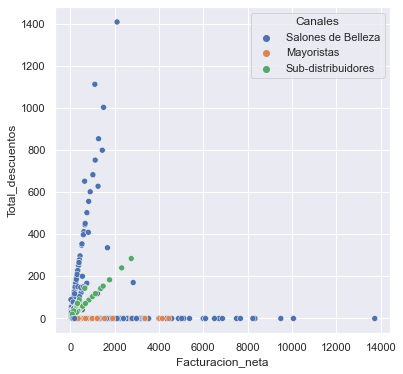

In [45]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Facturacion_neta', y=ventas['Total_descuentos'], data=ventas ,hue='Canales')
plt.show()

<Figure size 864x576 with 0 Axes>

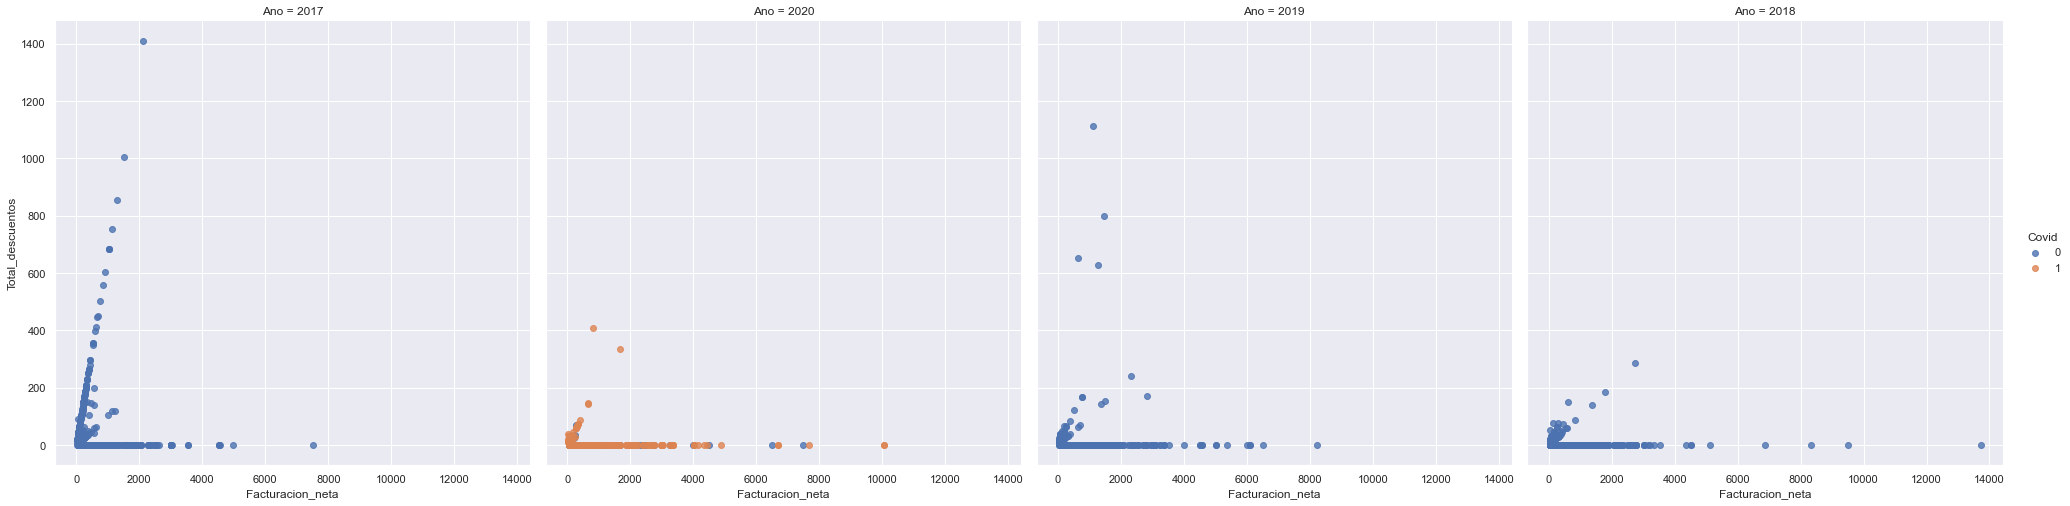

In [46]:
plt.figure(figsize=(12,8))
sns.lmplot(x='Facturacion_neta', y='Total_descuentos', data=ventas,
           fit_reg=False,
           col= 'Ano',
           col_wrap=4,
           hue='Covid',
           size=7
          )   
plt.show()

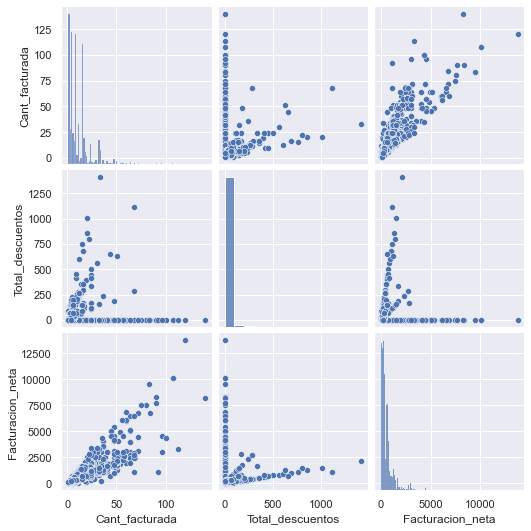

In [47]:
sns.pairplot(ventas[var_1]);

In [48]:
tendencia = ventas.groupby('Ano_Mes').sum()['Facturacion_neta'].reset_index()
tendencia.head(5)

Ano_Mes  Facturacion_neta
0   201701          46121.15
1   201702          38806.49
2   201703          78756.24
3   201704          49182.18
4   201705          60575.61

In [49]:
from datetime import datetime
tendencia['Ano_Mes']=tendencia['Ano_Mes'].replace("[,""]","", regex=True)
tendencia['Ano_Mes']= tendencia['Ano_Mes'].astype(str)


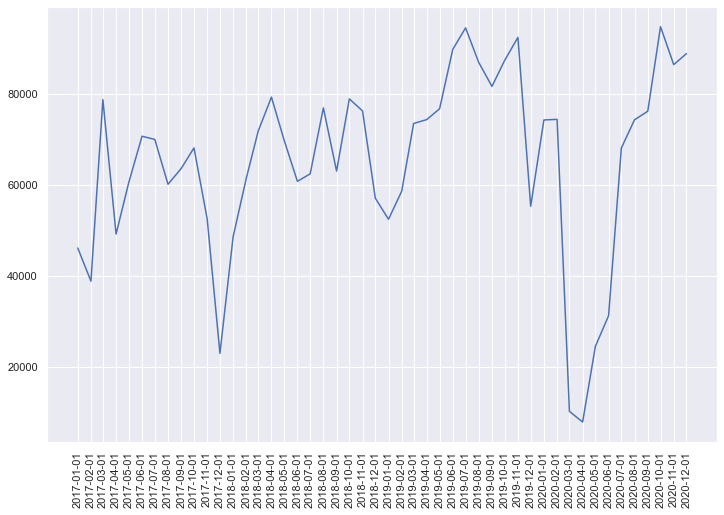

In [50]:
tendencia['Ano_Mes'] = pd.to_datetime(tendencia['Ano_Mes'], format='%Y%m')

am =tendencia['Ano_Mes'].unique()
plt.figure(figsize=(12,8))
plt.plot(am, tendencia['Facturacion_neta'])
plt.xticks(am, rotation=90)

plt.show()

Text(0, 0.5, 'Facturacion_neta')

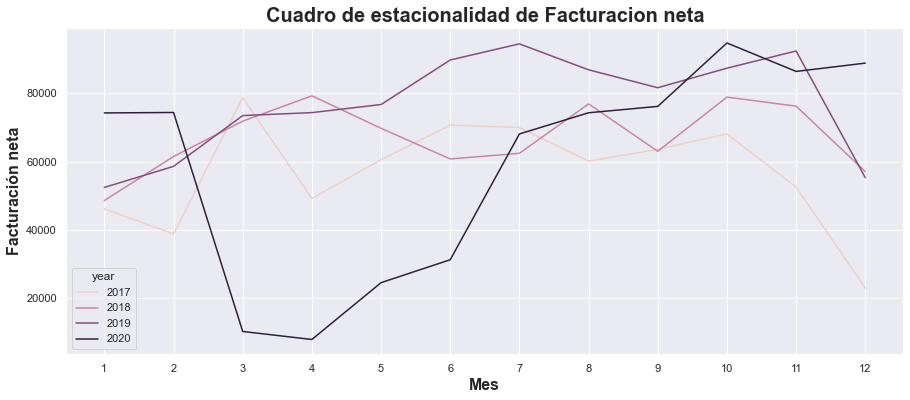

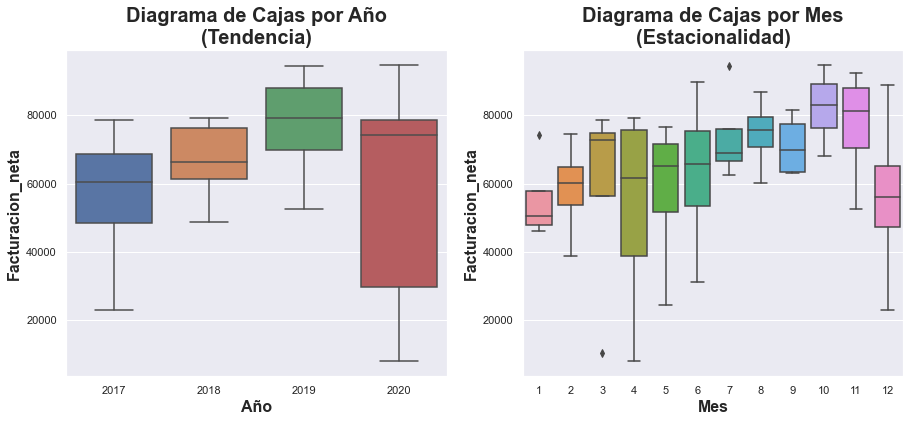

In [51]:
tendencia['year'] = tendencia['Ano_Mes'].dt.year
tendencia['month'] = tendencia['Ano_Mes'].dt.month

d = tendencia

variable = 'Facturacion_neta'
fig, ax = plt.subplots(figsize=(15, 6))


sns.lineplot(d['month'], d[variable], hue=d['year'])
ax.set_title('Cuadro de estacionalidad de Facturacion neta', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Mes', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Facturación neta', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_xticks(range(1,13))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(d['year'], d[variable], ax=ax[0])
ax[0].set_title('Diagrama de Cajas por Año\n(Tendencia)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Año', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Facturacion_neta', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(d['month'], d[variable], ax=ax[1])
ax[1].set_title('Diagrama de Cajas por Mes\n(Estacionalidad)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Mes', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Facturacion_neta', fontsize = 16, fontdict=dict(weight='bold'))

Text(0, 0.5, 'Facturacion_neta')

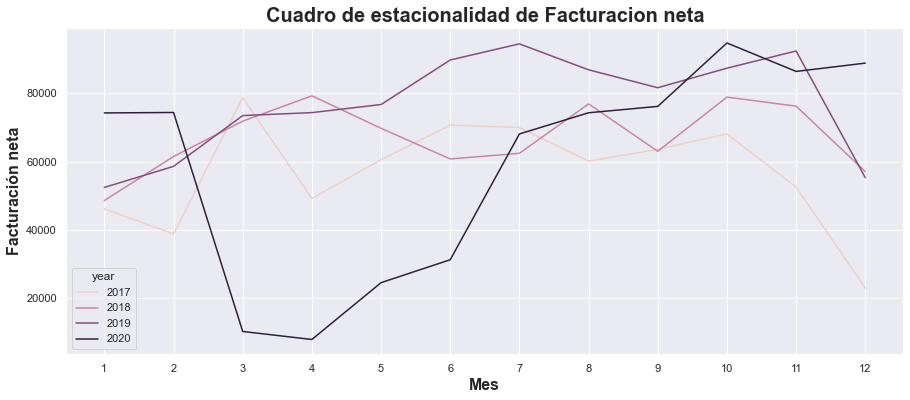

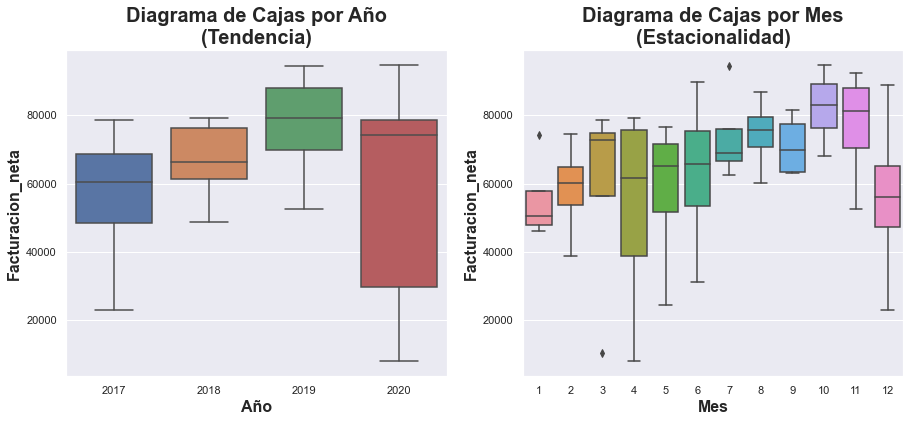

In [52]:
tendencia['year'] = tendencia['Ano_Mes'].dt.year
tendencia['month'] = tendencia['Ano_Mes'].dt.month

d = tendencia

variable = 'Facturacion_neta'
fig, ax = plt.subplots(figsize=(15, 6))


sns.lineplot(d['month'], d[variable], hue=d['year'])
ax.set_title('Cuadro de estacionalidad de Facturacion neta', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Mes', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Facturación neta', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_xticks(range(1,13))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(d['year'], d[variable], ax=ax[0])
ax[0].set_title('Diagrama de Cajas por Año\n(Tendencia)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Año', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Facturacion_neta', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(d['month'], d[variable], ax=ax[1])
ax[1].set_title('Diagrama de Cajas por Mes\n(Estacionalidad)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Mes', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Facturacion_neta', fontsize = 16, fontdict=dict(weight='bold'))

In [53]:
tendencia = tendencia.set_index('Ano_Mes')

anual = tendencia.resample('Y').sum()
anual

Facturacion_neta   year  month
Ano_Mes                                   
2017-12-31         681477.62  24204     78
2018-12-31         806491.89  24216     78
2019-12-31         923756.79  24228     78
2020-12-31         711204.69  24240     78

In [54]:
top=pd.DataFrame(ventas.groupby(['Ano','Producto']) [['Facturacion_neta']].sum()['Facturacion_neta'])
top=top.sort_values(by=['Ano', 'Facturacion_neta'], ascending=False)
top.head(15)



Facturacion_neta
Ano  Producto                                               
2020 SEB POTION 9 STYL TRT 500ML                    51636.02
     PACK SEBASTIAN HYDRE                           50787.33
     SEB DARK OIL 95ML                              42095.70
     PACK SEBASTIAN PENETRAITT                      41934.00
     SEB PENETRAITT SHAMPOO 1000ML                  36220.74
     SEB POTION 9 STYL TRT 150ML                    35120.68
     SEB PENETRAITT PRO MASQUE 500ML                34027.31
     SEB PENETRAITT CONDIT. 1000ML                  28485.58
     SEB PENETRAITT MASQUE 150ml                    26277.27
     SEB HYDRE SHAMPOO 250ML                        19777.30
     SEB PENETRAITT CONDITION 250ML                 18937.41
     SEB PENETRAITT SHAMPOO 250ML                   16964.24
     SEB DARK OIL SHAMPOO 250ML                     15255.00
     SEB TWISTED MAGNIFIER STY CREAM 145ML          14749.32
     SEB DARK OIL CONDITIONER 250ML                 14356.52

In [55]:
top1=top.sort_values(by=['Facturacion_neta'], ascending=False)
top2=pd.DataFrame(top1.groupby(['Producto']) [['Facturacion_neta']].sum()['Facturacion_neta'])
top2=top2.sort_values(by=['Facturacion_neta'], ascending=False)
top2['Producto'] = top2.index
sorter=top2.index.tolist()
top3=pd.DataFrame(top1.groupby(['Producto','Ano']) [['Facturacion_neta']].sum()['Facturacion_neta'])

top3 = top3.reset_index()
sorterIndex = dict(zip(sorter, range(len(sorter))))
top3['Prod_rank'] = top3['Producto'].map(sorterIndex)
top3.sort_values('Prod_rank',
        ascending = True, inplace = True)
top3=top3.reset_index()
top3=top3.drop(columns=['index'])
top3


Producto   Ano  Facturacion_neta  \
0                SEB POTION 9 STYL TRT 150ML  2017          80269.09   
1                SEB POTION 9 STYL TRT 150ML  2018          74183.50   
2                SEB POTION 9 STYL TRT 150ML  2019          73704.98   
3                SEB POTION 9 STYL TRT 150ML  2020          35120.68   
4                SEB POTION 9 STYL TRT 500ML  2018          59019.44   
5                SEB POTION 9 STYL TRT 500ML  2020          51636.02   
6                SEB POTION 9 STYL TRT 500ML  2019          54660.09   
7                SEB POTION 9 STYL TRT 500ML  2017          86981.20   
8                  PACK SEBASTIAN PENETRAITT  2017          28933.65   
9                  PACK SEBASTIAN PENETRAITT  2018          53429.47   
10                 PACK SEBASTIAN PENETRAITT  2019          85675.76   
11                 PACK SEBASTIAN PENETRAITT  2020          41934.00   
12                         SEB DARK OIL 95ML  2018          73502.00   
13                         SEB DARK OIL 95ML  2020          42095.70   
14                         SEB DARK OIL 95ML  2019          53150.64   
15           SEB PENETRAITT PRO MASQUE 500ML  2017          30320.52   
16           SEB PENETRAITT PRO MASQUE 500ML  2018          39473.28   
17           SEB PENETRAITT PRO MASQUE 500ML  2019          34618.61   
18           SEB PENETRAITT PRO MASQUE 500ML  2020          34027.31   
19              SEB PENETRAITT SHAMPOO 250ML  2017          33106.88   
20              SEB PENETRAITT SHAMPOO 250ML  2018          40982.78   
21              SEB PENETRAITT SHAMPOO 250ML  2019          34448.86   
22              SEB PENETRAITT SHAMPOO 250ML  2020          16964.24   
23             SEB PENETRAITT SHAMPOO 1000ML  2019          25164.50   
24             SEB PENETRAITT SHAMPOO 1000ML  2018          28911.45   
25             SEB PENETRAITT SHAMPOO 1000ML  2017          30553.85   
26             SEB PENETRAITT SHAMPOO 1000ML  2020          36220.74   
27            SEB PENETRAITT CONDITION 250ML  2017          33015.42   
28            SEB PENETRAITT CONDITION 250ML  2018          33882.81   
29            SEB PENETRAITT CONDITION 250ML  2020          18937.41   
30            SEB PENETRAITT CONDITION 250ML  2019          34292.24   
31                      PACK SEBASTIAN HYDRE  2019          43557.25   
32                      PACK SEBASTIAN HYDRE  2018          24292.80   
33                      PACK SEBASTIAN HYDRE  2020          50787.33   
34               SEB PENETRAITT MASQUE 150ml  2020          26277.27   
35               SEB PENETRAITT MASQUE 150ml  2017          31660.80   
36               SEB PENETRAITT MASQUE 150ml  2019          32433.95   
37               SEB PENETRAITT MASQUE 150ml  2018          27956.16   
38             SEB PENETRAITT CONDIT. 1000ML  2017          15425.64   
39             SEB PENETRAITT CONDIT. 1000ML  2019          21479.54   
40             SEB PENETRAITT CONDIT. 1000ML  2020          28485.58   
41             SEB PENETRAITT CONDIT. 1000ML  2018          24862.61   
42                   SEB HYDRE SHAMPOO 250ML  2020          19777.30   
43                   SEB HYDRE SHAMPOO 250ML  2019          25665.24   
44                   SEB HYDRE SHAMPOO 250ML  2017          20435.78   
45                   SEB HYDRE SHAMPOO 250ML  2018          24019.26   
46                       SEB RE-SHAPER 400ML  2020           5967.80   
47                       SEB RE-SHAPER 400ML  2019          18004.38   
48                       SEB RE-SHAPER 400ML  2018          23198.04   
49                       SEB RE-SHAPER 400ML  2017          20928.71   
50                  SEB TRILLIANCE SHP 250ML  2017          14945.10   
51                  SEB TRILLIANCE SHP 250ML  2018          18386.10   
52                  SEB TRILLIANCE SHP 250ML  2019          20538.70   
53                  SEB TRILLIANCE SHP 250ML  2020           9943.56   
54                  SEB HYDRE SHAMPOO 1000ML  2019          20759.64   
55  

In [56]:
categoria_tipo=pd.DataFrame(ventas.groupby(['Ano','CATEGORIA','TIPO']).sum()['Facturacion_neta'])
categoria_tipo.sort_values(['Ano', 'CATEGORIA'], ascending=False)


Facturacion_neta
Ano  CATEGORIA  TIPO                            
2020 STYLING    GEL                      6029.62
                PASTA                    1401.07
                POMADA                   1534.97
                SPRAY                     955.79
     GROOMING   ACEITE                   1763.93
                BALSAMO                  1064.50
     FOUNDATION ACONDICIONADOR          98327.46
                PACK                    92721.33
                SHAMPOO                123785.35
                TRATAM                  83396.65
     FORM       AEROSOL                 16976.52
                CERA                     2347.47
                CREMA                    1498.77
                GEL                      6293.95
     FLOW       MOUSSE                   7723.03
                SUERO                    3466.25
                TRATAM                  88867.18
     FLEX       ACONDICIONADOR          16779.91
                CREMA                   14749.32
                MOUSSE                   2758.52
                SHAMPOO                 19465.00
                TRATAM                  18226.86
     FLAUNT     AEROSOL                   741.51
                CERA                      332.40
                CREMA                    1940.70
                SPRAY                   14242.86
     DARK OIL   ACEITE                  42095.70
     COLOR      COLOR                   30407.65
     CARE       ACONDICIONADOR           3105.33
                SHAMPOO                  6332.09
                TONICO                   1873.00
2019 FOUNDATION ACONDICIONADOR          94060.98
                PACK                   129233.01
                SHAMPOO                145729.88
                TRATAM                  70912.45
     FORM       AEROSOL                 37265.46
                CERA                     4538.60
                CREMA                    5391.37
                GEL                     21490.11
     FLOW       MOUSSE                  22083.49
                SUERO                    7970.55
                TRATAM                 132302.60
     FLEX       ACONDICIONADOR          21683.95
                CREMA                   12585.86
                MOUSSE                   9648.32
                SHAMPOO                 24588.94
                TRATAM                  20319.76
     FLAUNT     AEROSOL                  2455.08
                CERA                     1006.08
                CREMA                   12827.95
                SPRAY                   16992.51
     DARK OIL   ACEITE                  53150.64
     COLOR      COLOR                   77519.20
2018 FOUNDATION ACONDICIONADOR         104612.40
                PACK                    77722.27
                SHAMPOO                148550.85
                TRATAM                  72836.20
     FORM       AEROSOL                 42880.24
                CERA                     8262.64
                CREMA                    4097.54
                GEL                     17799.04
     FLOW       MOUSSE                  22651.19
                SPRAY                     926.82
                SUERO                    6408.32
                TRATAM                 143128.38
     FLAUNT     CERA                     2770.20
                SPRAY                   11222.54
     DARK OIL   ACEITE                  73502.00
     COLOR      COLOR                   69121.26
2017 FOUNDATION ACONDICIONADOR          93561.33
                PACK                    28933.65
                SHAMPOO                127253.50
                TRATAM                  72021.11
     FORM       AEROSOL                 47305.14
                CERA                    11989.80
                CREMA                    3700.80
                GEL                     24645.60
     FLOW       ACEITE                   2561.76
                MOUSSE                  29500.93
                SPRAY                     358.66
              

In [57]:
mesaño=ventas
mesaño['Ano_Mes']= mesaño['Ano_Mes'].astype(str)
mesaño['id_compra']=mesaño['Solicitante']
mesaño['id_compra']=mesaño['Solicitante']+mesaño['Ano_Mes']


mesaño['Grouped'] = mesaño.groupby('id_compra')['Producto'].transform(lambda x: ','.join(x) )
mesaño=mesaño[['id_compra','Grouped']].drop_duplicates()
mesaño.head(50)


id_compra  \
0              (I)MARCO ALDANY PERU S.A.201701   
2              (I)MARCO ALDANY PERU S.A.201702   
3              (I)MARCO ALDANY PERU S.A.201703   
4              (I)MARCO ALDANY PERU S.A.201704   
5              (I)MARCO ALDANY PERU S.A.201705   
6              (I)MARCO ALDANY PERU S.A.201706   
7              (I)MARCO ALDANY PERU S.A.201707   
15             (I)MARCO ALDANY PERU S.A.201708   
16             (I)MARCO ALDANY PERU S.A.201709   
23             (I)MARCO ALDANY PERU S.A.201712   
69             (I)MARCO ALDANY PERU S.A.201710   
135  KALIA SALON SOCIEDAD ANONIMA CERRAD202010   
136  KALIA SALON SOCIEDAD ANONIMA CERRAD202012   
154                   REYES MUCHA RACHEL201709   
155      SALCEDO BRINGAS RICARDO ENRIQUE201903   
157  MORON LOPEZ DE VILLIGER MARIA ELIZA201708   
160  MORON LOPEZ DE VILLIGER MARIA ELIZA201904   
163  MORON LOPEZ DE VILLIGER MARIA ELIZA201906   
169  MORON LOPEZ DE VILLIGER MARIA ELIZA201707   
170  MORON LOPEZ DE VILLIGER MARIA ELIZA201805   
174  MORON LOPEZ DE VILLIGER MARIA ELIZA201709   
176  MORON LOPEZ DE VILLIGER MARIA ELIZA201908   
178  MORON LOPEZ DE VILLIGER MARIA ELIZA201703   
182  MORON LOPEZ DE VILLIGER MARIA ELIZA201801   
185  MORON LOPEZ DE VILLIGER MARIA ELIZA201907   
192  IGLESIAS DEL CARPIO FABIAN HUMBERTO201803   
193       (X)INVERSIONES COIFFURE S.A.C.201701   
194            GIL VELASCO LUIS HUMBERTO201806   
197            TEMOCHE CERNA ANA CECILIA201902   
199            TEMOCHE CERNA ANA CECILIA201903   
200            TEMOCHE CERNA ANA CECILIA201806   
201            TEMOCHE CERNA ANA CECILIA201711   
202            CENTRO DE ESTETICA ARAMIS201810   
209            CENTRO DE ESTETICA ARAMIS201803   
210            CENTRO DE ESTETICA ARAMIS201704   
211            CENTRO DE ESTETICA ARAMIS201806   
212            CENTRO DE ESTETICA ARAMIS201909   
213            CENTRO DE ESTETICA ARAMIS201812   
215            CENTRO DE ESTETICA ARAMIS201710   
220            CENTRO DE ESTETICA ARAMIS201905   
222            CENTRO DE ESTETICA ARAMIS201801   
233            CENTRO DE ESTETICA ARAMIS201703   
236            CENTRO DE ESTETICA ARAMIS201902   
243            CENTRO DE ESTETICA ARAMIS201911   
257            CENTRO DE ESTETICA ARAMIS201705   
258              MIÑOPE VALLEJOS ZENOBIA201705   
259      INVERSIONES ROSA FERNANDEZ  SAC201811   
261                GRUPO INTRIGUE S.A.C.201710   
263  FIGUEROA VILLAR DE BALDERA NERI ROS201903   
265  FIGUEROA VILLAR DE BALDERA NERI ROS201809   

                                               Grouped  
0    SEB SHAPER FIERCE 400ML,SEB PENETRAITT SHAMPOO...  
2    SEB PENETRAITT SHAMPOO 1000ML,SEB PENETRAITT S...  
3    SEB PENETRAITT SHAMPOO 1000ML,SEB PENETRAITT S...  
4    SEB PENETRAITT SHAMPOO 1000ML,SEB PENETRAITT S...  
5    SEB PENETRAITT SHAMPOO 1000ML,SEB PENETRAITT S...  
6    SEB PENETRAITT SHAMPOO 1000ML,SEB PENETRAITT S...  
7    SEB PENETRAITT SHAMPOO 1000ML,SEB PENETRAITT S...  
15   SEB PENETRAITT SHAMPOO 250ML,SEB PENETRAITT CO...  
16   SEB PENETRAITT SHAMPOO 250ML,SEB PENETRAITT CO...  
23   SEB HYDRE SHAMPOO 250ML,SEB PENETRAITT CONDITI...  
69   SEB GEL FORTE STRONG 200ML,SEB POTION 9 STYL T...  
135  SEB DARK OIL 95ML,SEB TWISTED CLEANSER SHAMPOO...  
136  SEB DARK OIL 95ML,SEB DARK OIL SHAMPOO 250ML,S...  
154                        SEB POTION 9 STYL TRT 150ML  
155                    SEB PENETRAITT PRO MASQUE 500ML  
157  SEB CELLOPHANES VANILLA BLOND 300 ML,SEB CELLO...  
160  SEB DARK OIL 95ML,SEB SUBLIMATE STYLING CREME ...  
163  SEB TWISTED CLEANSER SHAMPOO 250ML,SEB TWISTED...  
169  SEB SHAPER FIERCE 400ML,SEB SHAPER ZERO GRAV. ...  
170                        SEB SHAPER ZERO GRAV. 400ML  
174  SEB MOUSSE FORT/STRONG 200ML,SEB TEXTURIZER BO...  
176                            SEB WHIPPED CREME 150ML  
178  SEB HYDRE SHAMPOO 250ML,SEB HYDRE CONDITIONER ...  
182                         SEB GEL FORTE STRONG 200ML  
185                         SEB GEL FORTE STRONG 200ML  
192 

In [58]:
from itertools import combinations
from collections import Counter

count =Counter()

for row in mesaño['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

    

[(('SEB PENETRAITT SHAMPOO 250ML', 'SEB PENETRAITT CONDITION 250ML'), 177),
 (('SEB PENETRAITT SHAMPOO 1000ML', 'SEB PENETRAITT CONDIT. 1000ML'), 110),
 (('SEB PENETRAITT SHAMPOO 250ML', 'SEB POTION 9 STYL TRT 150ML'), 99),
 (('SEB PENETRAITT SHAMPOO 250ML', 'SEB TRILLIANCE SHP 250ML'), 88),
 (('SEB HYDRE SHAMPOO 250ML', 'SEB HYDRE CONDITIONER 250ML'), 87),
 (('SEB PENETRAITT CONDITION 250ML', 'SEB POTION 9 STYL TRT 150ML'), 87),
 (('SEB PENETRAITT SHAMPOO 250ML', 'SEB HYDRE SHAMPOO 250ML'), 85),
 (('SEB PENETRAITT SHAMPOO 250ML', 'SEB PENETRAITT MASQUE 150ml'), 82),
 (('SEB HYDRE SHAMPOO 250ML', 'SEB POTION 9 STYL TRT 150ML'), 77),
 (('SEB POTION 9 STYL TRT 150ML', 'SEB POTION 9 STYL TRT 500ML'), 76)]

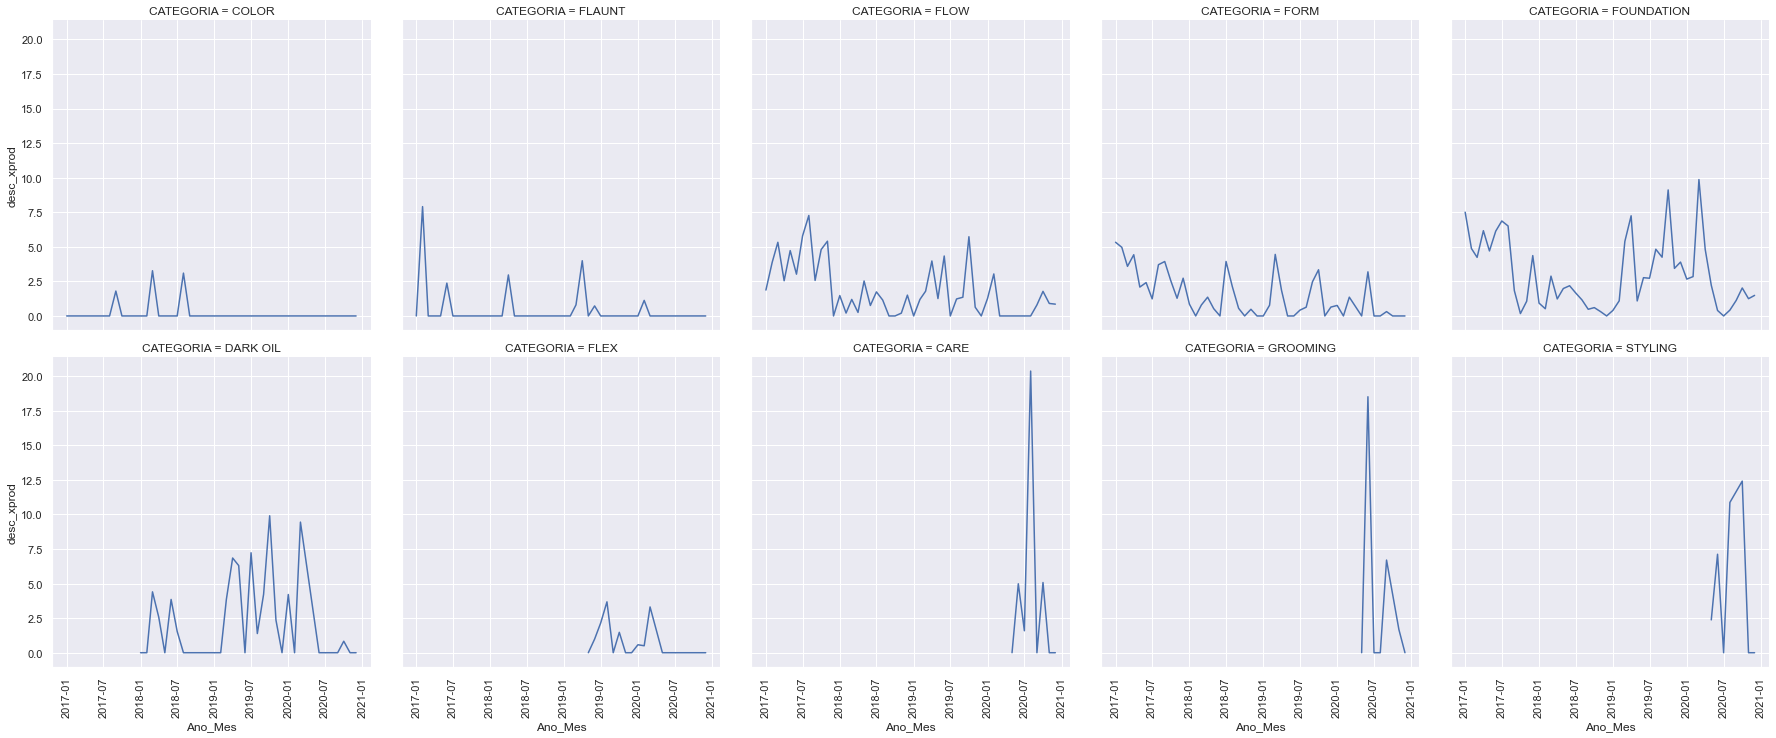

In [59]:

ventas['desc_xprod'] = (ventas['precio_venta_sd']-ventas['precio_venta_cd'])

descuentos=pd.DataFrame(ventas.groupby(['Ano_Mes','CATEGORIA']) [['desc_xprod','precio_venta_cd','precio_venta_sd']].mean())
descuentos=descuentos.reset_index()

descuentos['Ano_Mes']=descuentos['Ano_Mes'].replace("[,""]","", regex=True)
descuentos['Ano_Mes']= descuentos['Ano_Mes'].astype(str)
descuentos['Ano_Mes'] = pd.to_datetime(descuentos['Ano_Mes'], format='%Y%m')

descuentos=descuentos.sort_values(by=['Ano_Mes'], ascending=True).reset_index()
desc =descuentos['Ano_Mes'].unique()




k = sns.FacetGrid(descuentos, col="CATEGORIA",col_wrap=5, height=5, aspect=1)
k.map(sns.lineplot,'Ano_Mes','desc_xprod', palette='pastel')
for axes in k.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()


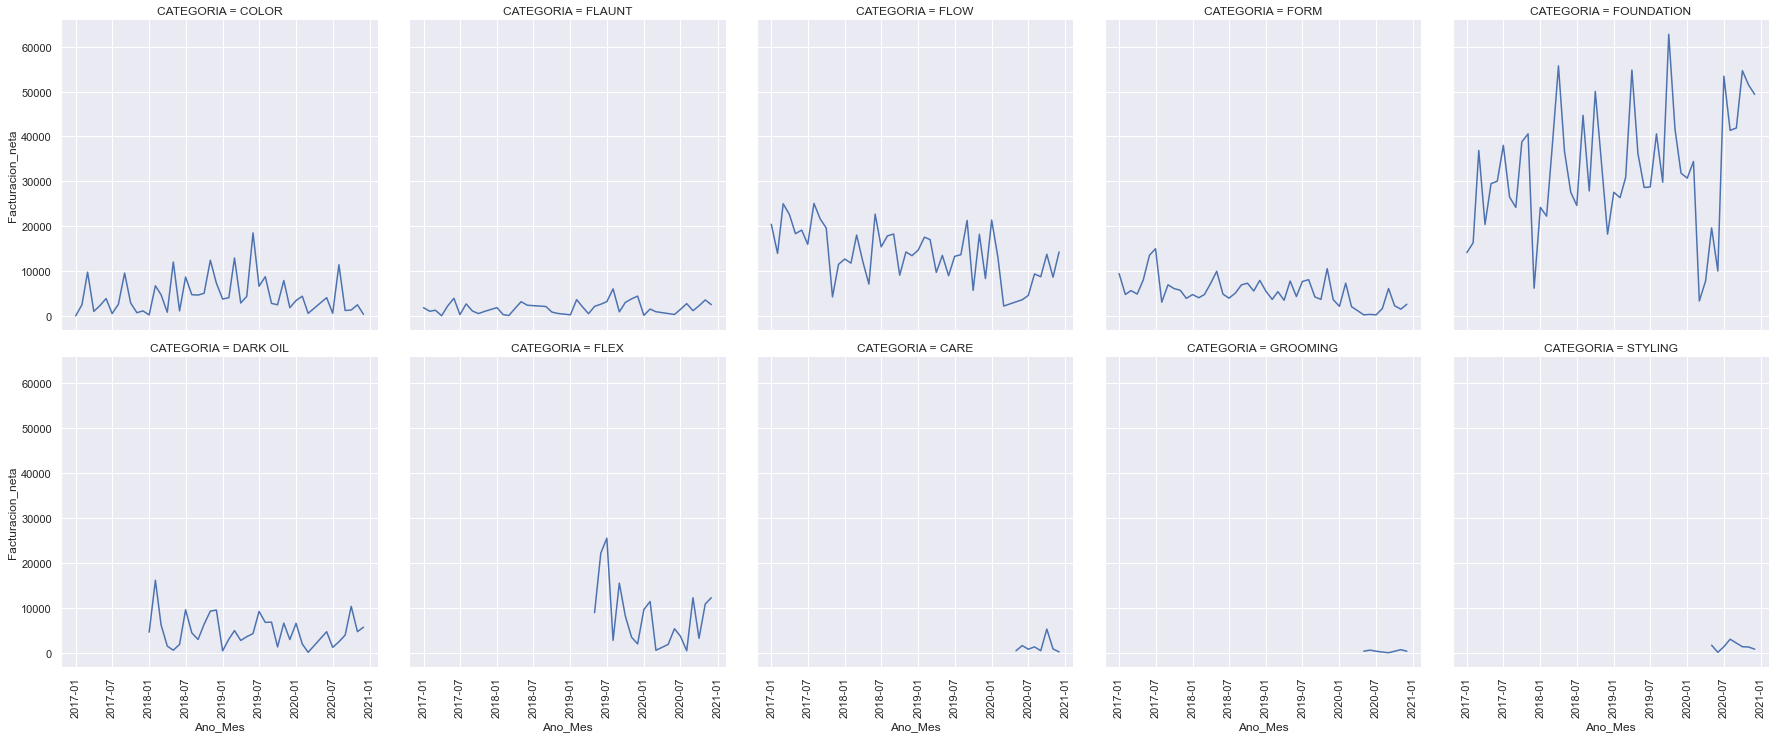

In [60]:

ventas['desc_xprod'] = (ventas['precio_venta_sd']-ventas['precio_venta_cd'])

descuentos=pd.DataFrame(ventas.groupby(['Ano_Mes','CATEGORIA']) [['Facturacion_neta']].sum())
descuentos=descuentos.reset_index()

descuentos['Ano_Mes']=descuentos['Ano_Mes'].replace("[,""]","", regex=True)
descuentos['Ano_Mes']= descuentos['Ano_Mes'].astype(str)
descuentos['Ano_Mes'] = pd.to_datetime(descuentos['Ano_Mes'], format='%Y%m')

descuentos=descuentos.sort_values(by=['Ano_Mes'], ascending=True).reset_index()
desc =descuentos['Ano_Mes'].unique()




k = sns.FacetGrid(descuentos, col="CATEGORIA",col_wrap=5, height=5, aspect=1)
k.map(sns.lineplot,'Ano_Mes','Facturacion_neta', palette='pastel')
for axes in k.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

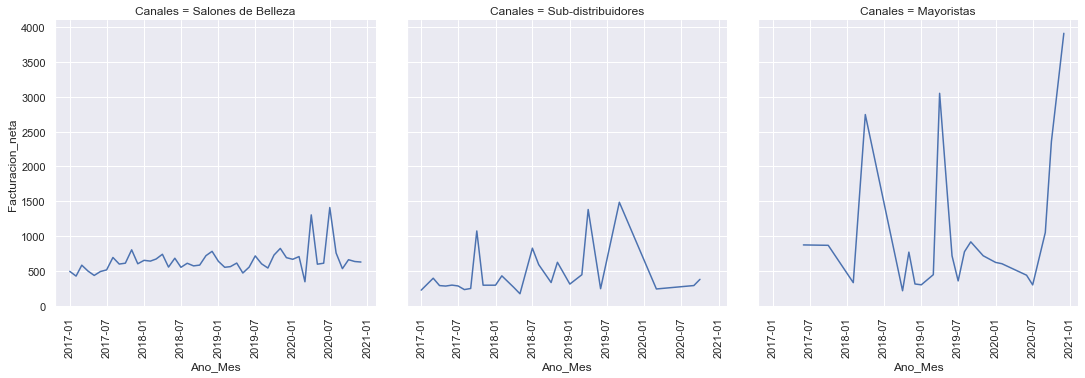

In [61]:

ventas['desc_xprod'] = (ventas['precio_venta_sd']-ventas['precio_venta_cd'])

descuentos=pd.DataFrame(ventas.groupby(['Ano_Mes','Canales']) [['Facturacion_neta']].mean())
descuentos=descuentos.reset_index()

descuentos['Ano_Mes']=descuentos['Ano_Mes'].replace("[,""]","", regex=True)
descuentos['Ano_Mes']= descuentos['Ano_Mes'].astype(str)
descuentos['Ano_Mes'] = pd.to_datetime(descuentos['Ano_Mes'], format='%Y%m')

descuentos=descuentos.sort_values(by=['Ano_Mes'], ascending=True).reset_index()
desc =descuentos['Ano_Mes'].unique()




k = sns.FacetGrid(descuentos, col="Canales",col_wrap=5, height=5, aspect=1)
k.map(sns.lineplot,'Ano_Mes','Facturacion_neta', palette='pastel')
for axes in k.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

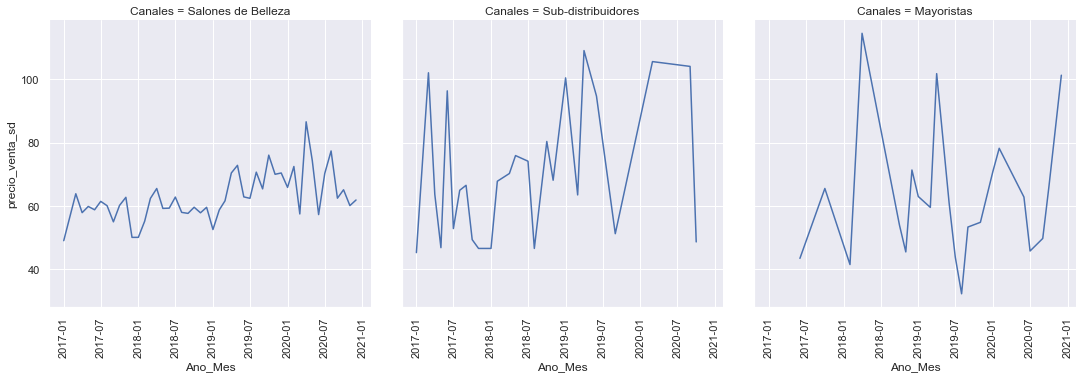

In [62]:

ventas['desc_xprod'] = (ventas['precio_venta_sd']-ventas['precio_venta_cd'])

descuentos=pd.DataFrame(ventas.groupby(['Ano_Mes','Canales']) [['precio_venta_sd']].mean())
descuentos=descuentos.reset_index()

descuentos['Ano_Mes']=descuentos['Ano_Mes'].replace("[,""]","", regex=True)
descuentos['Ano_Mes']= descuentos['Ano_Mes'].astype(str)
descuentos['Ano_Mes'] = pd.to_datetime(descuentos['Ano_Mes'], format='%Y%m')

descuentos=descuentos.sort_values(by=['Ano_Mes'], ascending=True).reset_index()
desc =descuentos['Ano_Mes'].unique()




k = sns.FacetGrid(descuentos, col="Canales",col_wrap=5, height=5, aspect=1)
k.map(sns.lineplot,'Ano_Mes','precio_venta_sd', palette='pastel')
for axes in k.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

<AxesSubplot:xlabel='TIPO', ylabel='TIPO'>

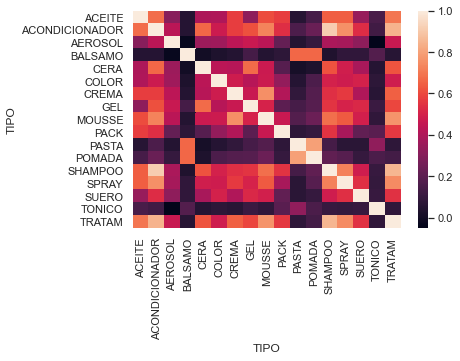

In [63]:
hm = pd.crosstab(ventas['Solicitante'], ventas['TIPO'])
hm2=hm.corr()
sns.heatmap(hm2)


array([<AxesSubplot:ylabel='Facturacion_neta'>], dtype=object)

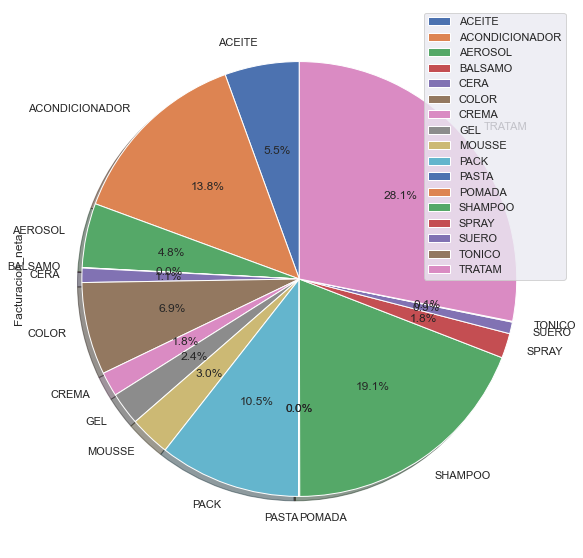

In [64]:
tipopie=pd.DataFrame(ventas.groupby(['TIPO']) [['Facturacion_neta']].sum())
tipopie.plot(kind='pie',subplots=True,shadow = True,startangle=90,
figsize=(15,10),autopct='%1.1f%%')

array([<AxesSubplot:ylabel='Facturacion_neta'>], dtype=object)

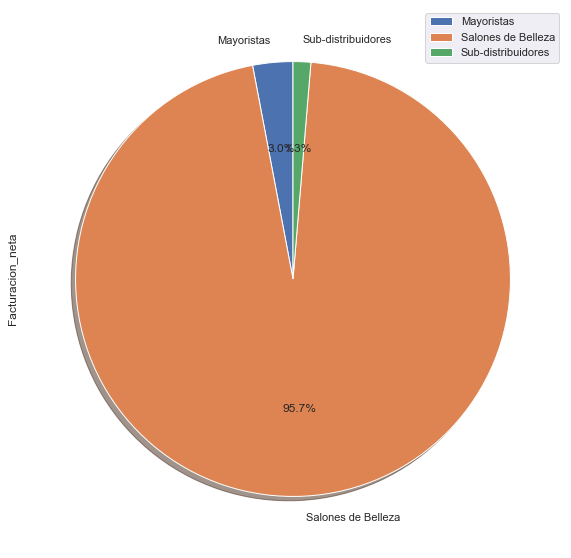

In [65]:
canalespie=pd.DataFrame(ventas.groupby(['Canales']) [['Facturacion_neta']].sum())
canalespie.plot(kind='pie',subplots=True,shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

Facturacion_neta
count      1.000000e+01
mean       3.122931e+05
std        8.218077e+05
min        2.050800e+02
25%        4.393113e+03
50%        2.769631e+04
75%        7.607780e+04
max        2.639286e+06

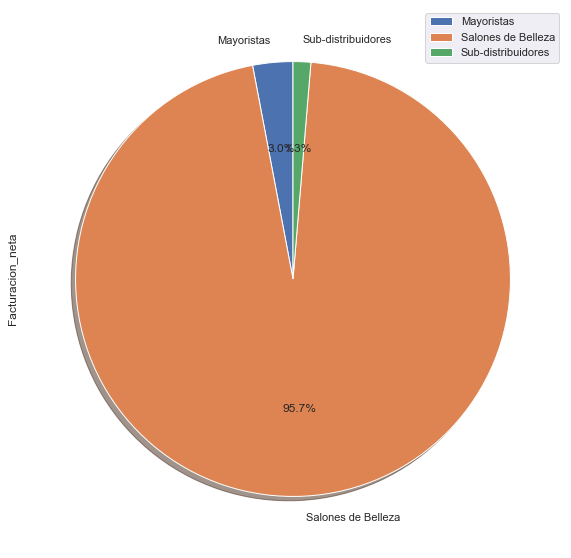

In [66]:
ubi=pd.DataFrame(ventas.groupby(['Oficina_ventas']) [['Facturacion_neta']].sum())
canalespie.plot(kind='pie',subplots=True,shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
ubi.describe()

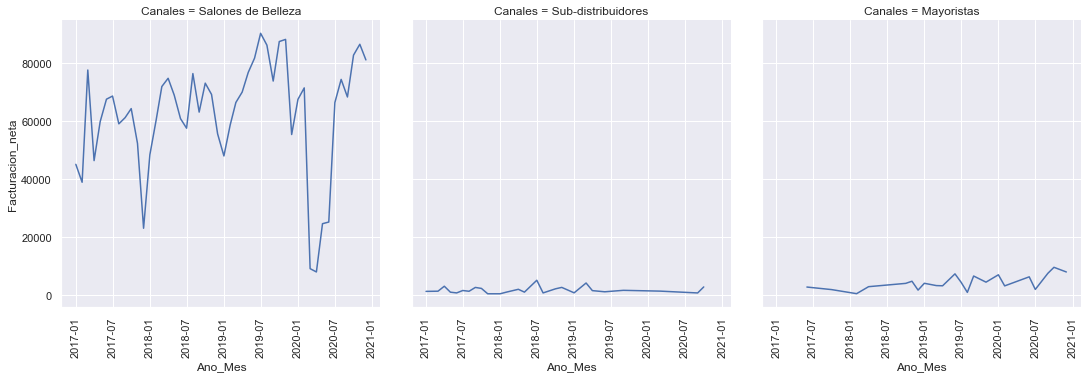

In [67]:



fact_canales=pd.DataFrame(ventas.groupby(['Ano_Mes','Canales']) [['Facturacion_neta']].sum())
fact_canales=fact_canales.reset_index()

fact_canales['Ano_Mes']=fact_canales['Ano_Mes'].replace("[,""]","", regex=True)
fact_canales['Ano_Mes']= fact_canales['Ano_Mes'].astype(str)
fact_canales['Ano_Mes'] = pd.to_datetime(fact_canales['Ano_Mes'], format='%Y%m')

fact_canales=fact_canales.sort_values(by=['Ano_Mes'], ascending=True).reset_index()
desc =fact_canales['Ano_Mes'].unique()




k = sns.FacetGrid(fact_canales, col="Canales",col_wrap=5, height=5, aspect=1)
k.map(sns.lineplot,'Ano_Mes','Facturacion_neta', palette='pastel')
for axes in k.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()



array([<AxesSubplot:title={'center':'(Facturacion_neta, Mayoristas)'}, xlabel='Ano'>,
       <AxesSubplot:title={'center':'(Facturacion_neta, Salones de Belleza)'}, xlabel='Ano'>,
       <AxesSubplot:title={'center':'(Facturacion_neta, Sub-distribuidores)'}, xlabel='Ano'>],
      dtype=object)

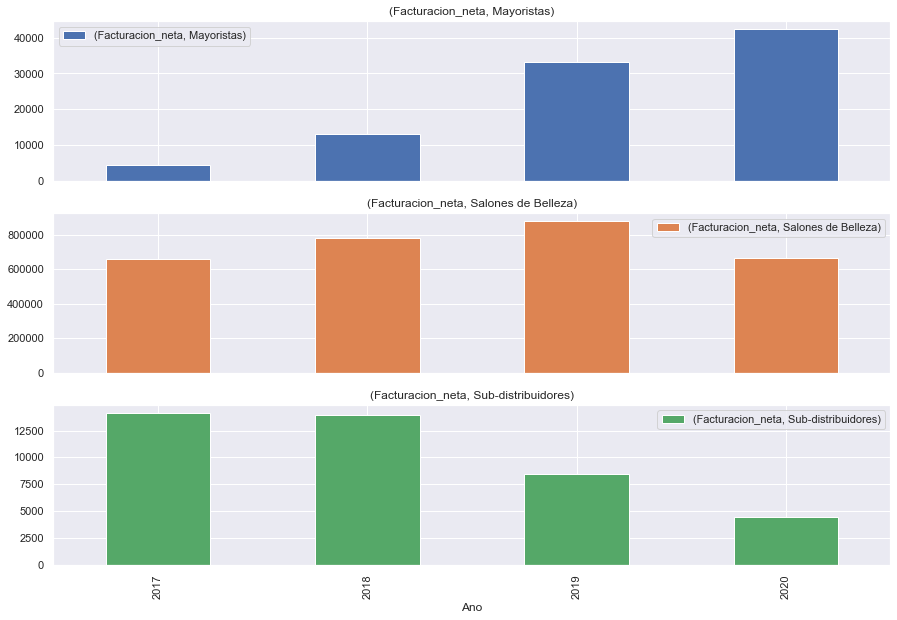

In [68]:
holi=pd.DataFrame(ventas.groupby(['Canales','Ano']) [['Facturacion_neta']].sum())

holi.unstack(0).plot(kind='bar',subplots=True,
figsize=(15,10))


#ventas.groupby('Ano').Canales.value_counts().unstack(0).plot.barh()


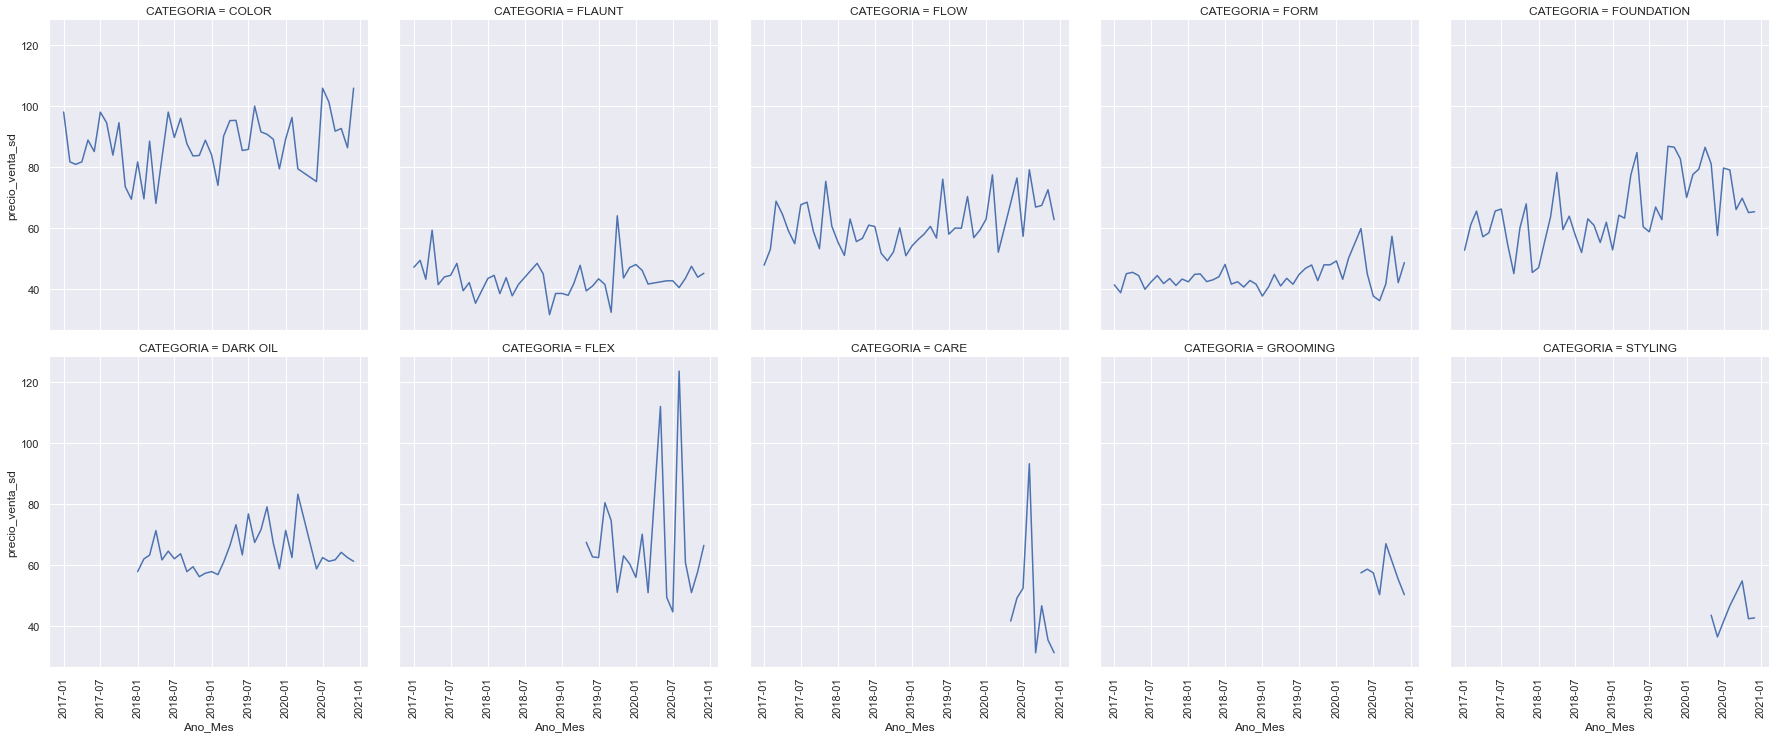

In [69]:

ventas['desc_xprod'] = (ventas['precio_venta_sd']-ventas2020['precio_venta_cd'])

descuentos=pd.DataFrame(ventas.groupby(['Ano_Mes','CATEGORIA']) [['desc_xprod','precio_venta_cd','precio_venta_sd']].mean())
descuentos=descuentos.reset_index()

descuentos['Ano_Mes']=descuentos['Ano_Mes'].replace("[,""]","", regex=True)
descuentos['Ano_Mes']= descuentos['Ano_Mes'].astype(str)
descuentos['Ano_Mes'] = pd.to_datetime(descuentos['Ano_Mes'], format='%Y%m')

descuentos=descuentos.sort_values(by=['Ano_Mes'], ascending=True).reset_index()
desc =descuentos['Ano_Mes'].unique()




k = sns.FacetGrid(descuentos, col='CATEGORIA',col_wrap=5, height=5, aspect=1)
k.map(sns.lineplot,'Ano_Mes','precio_venta_sd', palette='pastel')
for axes in k.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()


# Feature Engineering

In [70]:

prodxsolicitante=pd.DataFrame(ventas.groupby(['id_venta','Solicitante','Covid','Cerrado_COVID', 'Canales', 'TIPO', 'Mes','Ano_Mes']) [['Facturacion_neta']].sum())

prodxsolicitante = prodxsolicitante.fillna(0).reset_index()




In [71]:
dfaceite = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "ACEITE" ].index)
dfaceite.rename(columns={'Facturacion_neta':'Facturacion_aceite'},inplace = True)
dfaceite = dfaceite.drop(['TIPO'], axis=1) 

dfaceite.head()
                                           

id_venta                         Solicitante Covid Cerrado_COVID  \
100  201702421161                (X)E.MODA.SAN S.A.C.     0             0   
190  201703431265                     KHALEESI S.A.C.     0             0   
228  201704348759  DANITZA SERVICIOS GENERALES S.A.C.     0             0   
304  201705356069                  BESSO SALON S.A.C.     0             0   
306  201705357193           (I)MARCO ALDANY PERU S.A.     0             0   

                Canales Mes Ano_Mes  Facturacion_aceite  
100  Salones de Belleza  02  201702              355.80  
190  Salones de Belleza  03  201703              355.80  
228  Salones de Belleza  04  201704              711.60  
304  Salones de Belleza  05  201705              711.60  
306  Salones de Belleza  05  201705               71.16

In [72]:
dfacondicionador = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "ACONDICIONADOR" ].index)
dfacondicionador.rename(columns={'Facturacion_neta':'Facturacion_acondicionador'},inplace = True)
dfacondicionador = dfacondicionador.drop(['TIPO','Solicitante','Mes','Canales','Covid','Cerrado_COVID','Ano_Mes'], axis=1)

dfacondicionador.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 2 to 3427
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_venta                    520 non-null    object 
 1   Facturacion_acondicionador  520 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.2+ KB


In [73]:
dfaerosol = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "AEROSOL" ].index)
dfaerosol.rename(columns={'Facturacion_neta':'Facturacion_aerosol'},inplace = True)
dfaerosol = dfaerosol.drop(['TIPO','Solicitante','Mes','Canales','Covid','Cerrado_COVID','Ano_Mes'], axis=1)

dfaerosol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 1 to 3409
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_venta             219 non-null    object 
 1   Facturacion_aerosol  219 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.1+ KB


In [74]:
dfbalsamo = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "BALSAMO" ].index)
dfbalsamo.rename(columns={'Facturacion_neta':'Facturacion_balsamo'},inplace = True)
dfbalsamo = dfbalsamo.drop(['TIPO','Solicitante','Mes','Canales','Covid','Cerrado_COVID','Ano_Mes'], axis=1)

dfbalsamo.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2989 to 3419
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_venta             4 non-null      object 
 1   Facturacion_balsamo  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 96.0+ bytes


In [75]:
dfcera = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "CERA" ].index)
dfcera.rename(columns={'Facturacion_neta':'Facturacion_cera'},inplace = True)
dfcera = dfcera.drop(['TIPO','Solicitante','Mes','Canales','Covid','Cerrado_COVID','Ano_Mes'], axis=1)

dfcera.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 19 to 3300
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_venta          77 non-null     object 
 1   Facturacion_cera  77 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [76]:
dfcolor = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "COLOR" ].index)
dfcolor.rename(columns={'Facturacion_neta':'Facturacion_color'},inplace = True)
dfcolor = dfcolor.drop(['TIPO','Solicitante','Mes','Canales','Covid','Cerrado_COVID','Ano_Mes'], axis=1)

dfcolor.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 5 to 3405
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_venta           168 non-null    object 
 1   Facturacion_color  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [77]:
dfcrema = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "CREMA" ].index)
dfcrema.rename(columns={'Facturacion_neta':'Facturacion_crema'},inplace = True)
dfcrema = dfcrema.drop(['TIPO','Solicitante','Mes','Canales','Covid','Cerrado_COVID','Ano_Mes'], axis=1)

dfcrema.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 302 to 3410
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_venta           92 non-null     object 
 1   Facturacion_crema  92 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [78]:
dfgel = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "GEL" ].index)
dfgel.rename(columns={'Facturacion_neta':'Facturacion_gel'},inplace = True)
dfgel = dfgel.drop(['TIPO','Solicitante','Mes','Canales','Covid','Cerrado_COVID','Ano_Mes'], axis=1)

dfgel.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 13 to 3420
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_venta         171 non-null    object 
 1   Facturacion_gel  171 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [79]:
dfmousse = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "MOUSSE" ].index)
dfmousse.rename(columns={'Facturacion_neta':'Facturacion_mousse'},inplace = True)
dfmousse = dfmousse.drop(['TIPO','Solicitante','Mes','Canales','Covid','Cerrado_COVID','Ano_Mes'], axis=1)

dfmousse.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 14 to 3411
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_venta            191 non-null    object 
 1   Facturacion_mousse  191 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


In [80]:
dfpack = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "PACK" ].index)
dfpack.rename(columns={'Facturacion_neta':'Facturacion_pack'},inplace = True)
dfpack = dfpack.drop(['TIPO','Solicitante','Mes','Canales','Covid','Cerrado_COVID','Ano_Mes'], axis=1)

dfpack.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 655 to 3412
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_venta          138 non-null    object 
 1   Facturacion_pack  138 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [81]:
dfpasta = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "PASTA" ].index)
dfpasta.rename(columns={'Facturacion_neta':'Facturacion_pasta'},inplace = True)
dfpasta = dfpasta.drop(['TIPO','Solicitante','Mes','Canales','Covid','Cerrado_COVID','Ano_Mes'], axis=1)

dfpasta.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2955 to 3421
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_venta           5 non-null      object 
 1   Facturacion_pasta  5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 120.0+ bytes


In [82]:
dfpomada = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "POMADA" ].index)
dfpomada.rename(columns={'Facturacion_neta':'Facturacion_pomada'},inplace = True)
dfpomada = dfpomada.drop(['TIPO','Solicitante','Mes','Canales','Covid','Cerrado_COVID','Ano_Mes'], axis=1)

dfpomada.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2956 to 3422
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_venta            5 non-null      object 
 1   Facturacion_pomada  5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 120.0+ bytes


In [83]:
dfshampoo = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "SHAMPOO" ].index)
dfshampoo.rename(columns={'Facturacion_neta':'Facturacion_shampoo'},inplace = True)
dfshampoo = dfshampoo.drop(['TIPO','Solicitante','Mes','Canales','Covid','Cerrado_COVID','Ano_Mes'], axis=1)

dfshampoo.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 3428
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_venta             678 non-null    object 
 1   Facturacion_shampoo  678 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.9+ KB


In [84]:
dfspray = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "SPRAY" ].index)
dfspray.rename(columns={'Facturacion_neta':'Facturacion_spray'},inplace = True)
dfspray = dfspray.drop(['TIPO','Solicitante','Mes','Canales','Covid','Cerrado_COVID','Ano_Mes'], axis=1)

dfspray.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 6 to 3424
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_venta           109 non-null    object 
 1   Facturacion_spray  109 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [85]:
dfsuero = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "SUERO" ].index)
dfsuero.rename(columns={'Facturacion_neta':'Facturacion_suero'},inplace = True)
dfsuero = dfsuero.drop(['TIPO','Solicitante','Mes','Canales','Covid','Cerrado_COVID','Ano_Mes'], axis=1)

dfsuero.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 7 to 3415
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_venta           71 non-null     object 
 1   Facturacion_suero  71 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [86]:
dftonico = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "TONICO" ].index)
dftonico.rename(columns={'Facturacion_neta':'Facturacion_tonico'},inplace = True)
dftonico = dftonico.drop(['TIPO','Solicitante','Mes','Canales','Covid','Cerrado_COVID','Ano_Mes'], axis=1)

dftonico.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 2993 to 3342
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_venta            7 non-null      object 
 1   Facturacion_tonico  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 168.0+ bytes


In [87]:
dftratam = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "TRATAM" ].index)
dftratam.rename(columns={'Facturacion_neta':'Facturacion_tratam'},inplace = True)
dftratam = dftratam.drop(['TIPO','Solicitante','Mes','Canales','Covid','Cerrado_COVID','Ano_Mes'], axis=1)

dftratam.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 8 to 3416
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_venta            756 non-null    object 
 1   Facturacion_tratam  756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.7+ KB


In [88]:
comport = pd.merge(left=dfaceite,right=dfacondicionador, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfaerosol, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfbalsamo, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfcera, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfcolor, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfcrema, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfgel, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfmousse, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfpack, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfpasta, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfpomada, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfshampoo, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfspray, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfsuero, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dftonico, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dftratam, how='left', left_on='id_venta', right_on='id_venta') 
comport["Facturacion_total"]= comport.iloc[:,6:24].sum(axis=1)
comport = comport.fillna(0)
comport.describe()


Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
count          218.000000                  218.000000           218.000000   
mean           793.917569                  575.786239            93.530917   
std            850.826925                 1293.617196           326.073251   
min             29.930000                    0.000000             0.000000   
25%            231.090000                    0.000000             0.000000   
50%            616.240000                    0.000000             0.000000   
75%            998.280000                  628.800000             0.000000   
max           8235.810000                11170.050000          2498.640000   

       Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
count           218.000000        218.000000         218.000000   
mean              1.842661         41.746881         282.223073   
std              19.193563        284.588238        1225.439562   
min               0.000000          0.000000           0.000000   
25%               0.000000          0.000000           0.000000   
50%               0.000000          0.000000           0.000000   
75%               0.000000          0.000000           0.000000   
max             200.850000       3931.000000       13537.800000   

       Facturacion_crema  Facturacion_gel  Facturacion_mousse  \
count         218.000000       218.000000          218.000000   
mean           72.895505        36.681193           81.575917   
std           282.974555       123.855974          251.577017   
min             0.000000         0.000000            0.000000   
25%             0.000000         0.000000            0.000000   
50%             0.000000         0.000000            0.000000   
75%             0.000000         0.000000            0.000000   
max          2768.400000       705.000000         2004.600000   

       Facturacion_pack  Facturacion_pasta  Facturacion_pomada  \
count        218.000000         218.000000          218.000000   
mean          90.188257           4.913761            5.527982   
std          420.952843          37.704744           42.758860   
min            0.000000           0.000000            0.000000   
25%            0.000000           0.000000            0.000000   
50%            0.000000           0.000000            0.000000   
75%            0.000000           0.000000            0.000000   
max         3050.880000         401.700000          401.700000   

       Facturacion_shampoo  Facturacion_spray  Facturacion_suero  \
count           218.000000         218.000000         218.000000   
mean            737.105092          74.962936          33.078761   
std            1459.204279         243.451916         116.960563   
min               0.000000           0.000000           0.000000   
25%               0.000000           0.000000           0.000000   
50%             216.030000           0.000000           0.000000   
75%             808.950000           0.000000           0.000000   
max           12834.510000        1868.400000         705.000000   

       Facturacion_tonico  Facturacion_tratam  Facturacion_total  
count          218.000000          218.000000         218.000000  
mean             2.657569          835.241239        3763.875550  
std             28.946300         1295.345909        5160.581007  
min              0.000000            0.000000          60.250000  
25%              0.000000            0.000000         924.360000  
50%              0.000000          320.400000        1994.240000  
75%              0.000000         1225.890000        4601.512500  
max            400.000000         7860.960000       41639.970000

In [89]:
comport.loc[comport['Facturacion_total'] >= 4601.5125, 'top'] = '1'
comport.loc[comport['Facturacion_total'] < 4601.5125, 'top'] = '0'
comport['top'] = comport['top'].astype(int)
comport = comport.drop(['Solicitante'], axis=1) #borramos columnas que no nocesitamos

comport.head()


id_venta Covid Cerrado_COVID             Canales Mes Ano_Mes  \
0  201702421161     0             0  Salones de Belleza  02  201702   
1  201703431265     0             0  Salones de Belleza  03  201703   
2  201704348759     0             0  Salones de Belleza  04  201704   
3  201705356069     0             0  Salones de Belleza  05  201705   
4  201705357193     0             0  Salones de Belleza  05  201705   

   Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0              355.80                     1945.80                  0.0   
1              355.80                        0.00                  0.0   
2              711.60                      314.40                  0.0   
3              711.60                        0.00               1329.6   
4               71.16                      440.16                  0.0   

   Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0                  0.0               0.0                0.0   
1                  0.0             307.8                0.0   
2                  0.0               0.0                0.0   
3                  0.0               0.0                0.0   
4                  0.0               0.0                0.0   

   Facturacion_crema  Facturacion_gel  Facturacion_mousse  Facturacion_pack  \
0                0.0              0.0               961.2               0.0   
1                0.0              0.0                 0.0               0.0   
2                0.0              0.0              1233.6               0.0   
3                0.0              0.0                 0.0               0.0   
4                0.0            167.4                 0.0               0.0   

   Facturacion_pasta  Facturacion_pomada  Facturacion_shampoo  \
0                0.0                 0.0                 0.00   
1                0.0                 0.0              1245.60   
2                0.0                 0.0               279.00   
3                0.0                 0.0                 0.00   
4                0.0                 0.0               548.88   

   Facturacion_spray  Facturacion_suero  Facturacion_tonico  \
0              355.8              326.4                 0.0   
1              355.8                0.0                 0.0   
2                0.0                0.0                 0.0   
3                0.0                0.0                 0.0   
4                0.0                0.0                 0.0   

   Facturacion_tratam  Facturacion_total  top  
0              759.60            4704.60    1  
1             3111.78            5376.78    1  
2             1212.12            3750.72    0  
3                0.00            2041.20    0  
4             1576.32            2803.92    0

# Machine Learning

### Aprendizaje Supervisado - Clasificación

In [90]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

In [91]:
# Import necessary libs

import os
import random as rnd
import pandas as pd
import numpy as np
import itertools
import gc
import networkx as nx
from sklearn import metrics
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')

## Modelos de Machine Learning
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import tree

## Métricas de los modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

## Selección de Variables
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

## Validación Cruzada
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Common seed value to be used whenever required
seed = 16
np.random.seed(seed)

In [92]:
comport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_venta                    218 non-null    object 
 1   Covid                       218 non-null    object 
 2   Cerrado_COVID               218 non-null    object 
 3   Canales                     218 non-null    object 
 4   Mes                         218 non-null    object 
 5   Ano_Mes                     218 non-null    object 
 6   Facturacion_aceite          218 non-null    float64
 7   Facturacion_acondicionador  218 non-null    float64
 8   Facturacion_aerosol         218 non-null    float64
 9   Facturacion_balsamo         218 non-null    float64
 10  Facturacion_cera            218 non-null    float64
 11  Facturacion_color           218 non-null    float64
 12  Facturacion_crema           218 non-null    float64
 13  Facturacion_gel             218 non

In [93]:
x = pd.get_dummies(comport, columns=['Canales', 'Mes']) 

In [94]:
comport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_venta                    218 non-null    object 
 1   Covid                       218 non-null    object 
 2   Cerrado_COVID               218 non-null    object 
 3   Canales                     218 non-null    object 
 4   Mes                         218 non-null    object 
 5   Ano_Mes                     218 non-null    object 
 6   Facturacion_aceite          218 non-null    float64
 7   Facturacion_acondicionador  218 non-null    float64
 8   Facturacion_aerosol         218 non-null    float64
 9   Facturacion_balsamo         218 non-null    float64
 10  Facturacion_cera            218 non-null    float64
 11  Facturacion_color           218 non-null    float64
 12  Facturacion_crema           218 non-null    float64
 13  Facturacion_gel             218 non

In [95]:
# Preprocesar label
from sklearn import preprocessing
# Estandarizamos los datos
from sklearn.preprocessing import StandardScaler
# Normalizando los datos
from sklearn.preprocessing import MinMaxScaler



In [96]:
## selection of category variables
target = 'top'
exclude = ['Ano_Mes']

cols = [x for x in comport.columns if x not in exclude + [target]]
cols_cat = comport[cols].select_dtypes(['object']).columns.tolist()
index_categorical=[cols.index(x) for x in cols_cat]
print(exclude, '\n\n', index_categorical,cols_cat)

## For Training

for i in cols_cat:
    le = preprocessing.LabelEncoder()
    le.fit(list(comport[i].dropna()))
    comport.loc[~comport[i].isnull(),i]=le.transform(comport[i].dropna())

comport[cols]


['Ano_Mes'] 

 [0, 1, 2, 3, 4] ['id_venta', 'Covid', 'Cerrado_COVID', 'Canales', 'Mes']


id_venta  Covid  Cerrado_COVID  Canales  Mes  Facturacion_aceite  \
0           0      0              0        1    1              355.80   
1           1      0              0        1    2              355.80   
2           2      0              0        1    3              711.60   
3           3      0              0        1    4              711.60   
4           4      0              0        1    4               71.16   
5           5      0              0        1    4              355.80   
6           6      0              0        1    0             1848.72   
7           7      0              0        1    0              924.36   
8           8      0              0        1    0             1848.72   
9           9      0              0        1    1              924.36   
10         10      0              0        1    1              462.18   
11         11      0              0        1    1              924.36   
12         12      0              0        1    1              924.36   
13         13      0              0        1    1              924.36   
14         14      0              0        1    1              924.36   
15         15      0              0        1    1              924.36   
16         16      0              0        1    1              924.36   
17         17      0              0        1    1              462.18   
18         18      0              0        1    1              924.36   
19         19      0              0        1    1              308.12   
20         20      0              0        1    1             2773.08   
21         21      0              0        1    1              924.36   
22         22      0              0        1    1              924.36   
23         23      0              0        1    1              462.18   
24         24      0              0        1    1              924.36   
25         25      0              0        1    1              616.24   
26         26      0              0        1    1              924.36   
27         27      0              0        1    2              462.18   
28         28      0              0        1    2              924.36   
29         29      0              0        1    2              369.73   
30         30      0              0        1    2             1771.69   
31         31      0              0        1    2             1848.72   
32         32      0              0        1    2              924.36   
33         33      0              0        1    3              924.36   
34         34      0              0        1    3               77.03   
35         35      0              0        1    3               77.03   
36         36      0              0        1    3              154.06   
37         37      0              0        1    3              231.09   
38         38      0              0        1    3               61.62   
39         39      0              0        1    4              616.24   
40         40      0              0        1    5              308.12   
41         41      0              0        1    5              924.36   
42         42      0              0        1    5              616.24   
43         43      0              0        1    5               61.62   
44         44      0              0        1    6             1848.72   
45         45      0              0        1    6              308.12   
46         46      0              0        1    6              924.36   
47         47      0              0        1    6              924.36   
48         48      0              0        1    6             1848.72   
49         49      0              0        1    6              924.36   
50         50      0              0        1    6               61.62   
51         51      0              0        1    6              924.36   
52         52      0              0        1    6              924.36   
53         53      0              0        1    6              

In [97]:
scaler = StandardScaler()
scaler = scaler.fit(comport)
estandarizar = scaler.transform(comport)
estandarizar = pd.DataFrame(estandarizar,columns=list(comport.columns))
estandarizar.head(10)

id_venta     Covid  Cerrado_COVID   Canales       Mes   Ano_Mes  \
0 -1.724124 -0.495696       -0.19518  0.219265 -1.416311 -2.169891   
1 -1.708233 -0.495696       -0.19518  0.219265 -1.124757 -2.158082   
2 -1.692343 -0.495696       -0.19518  0.219265 -0.833203 -2.146274   
3 -1.676452 -0.495696       -0.19518  0.219265 -0.541649 -2.134465   
4 -1.660562 -0.495696       -0.19518  0.219265 -0.541649 -2.134465   
5 -1.644671 -0.495696       -0.19518  0.219265 -0.541649 -2.134465   
6 -1.628781 -0.495696       -0.19518  0.219265 -1.707865 -1.000851   
7 -1.612890 -0.495696       -0.19518  0.219265 -1.707865 -1.000851   
8 -1.596999 -0.495696       -0.19518  0.219265 -1.707865 -1.000851   
9 -1.581109 -0.495696       -0.19518  0.219265 -1.416311 -0.989042   

   Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0           -0.516117                    1.061494            -0.287500   
1           -0.516117                   -0.446122            -0.287500   
2           -0.096973                   -0.202523            -0.287500   
3           -0.096973                   -0.446122             3.799496   
4           -0.851432                   -0.105084            -0.287500   
5           -0.516117                   -0.446122            -0.287500   
6            1.242591                   -0.446122            -0.287500   
7            0.153665                    0.162875            -0.287500   
8            1.242591                   -0.080724            -0.287500   
9            0.153665                   -0.446122            -0.287500   

   Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0            -0.096225         -0.147030          -0.230834   
1            -0.096225          0.937022          -0.230834   
2            -0.096225         -0.147030          -0.230834   
3            -0.096225         -0.147030          -0.230834   
4            -0.096225         -0.147030          -0.230834   
5            -0.096225         -0.147030          -0.230834   
6            -0.096225         -0.147030          -0.230834   
7            -0.096225         -0.147030          -0.230834   
8            -0.096225         -0.147030          -0.230834   
9            -0.096225         -0.147030          -0.230834   

   Facturacion_crema  Facturacion_gel  Facturacion_mousse  Facturacion_pack  \
0          -0.258197        -0.296842            3.504488         -0.214741   
1          -0.258197        -0.296842           -0.325005         -0.214741   
2          -0.258197        -0.296842            4.589749         -0.214741   
3          -0.258197        -0.296842           -0.325005         -0.214741   
4          -0.258197         1.057839           -0.325005         -0.214741   
5          -0.258197        -0.296842           -0.325005         -0.214741   
6          -0.258197        -0.296842           -0.325005         -0.214741   
7          -0.258197        -0.296842           -0.325005         -0.214741   
8          -0.258197        -0.296842           -0.325005         -0.214741   
9          -0.258197        -0.296842           -0.325005         -0.214741   

   Facturacion_pasta  Facturacion_pomada  Facturacion_shampoo  \
0          -0.130622            -0.12958            -0.506304   
1          -0.130622            -0.12958             0.349276   
2          -0.130622            -0.12958            -0.314664   
3          -0.130622            -0.12958            -0.506304   
4          -0.130622            -0.12958            -0.129288   
5          -0.130622            -0.12958            -0.506304   
6          -0.130622            -0.12958            -0.506304   
7          -0.130622            -0.12958             0.205278   
8          -0.130622            -0.12958            -0.506304   
9          -0.130622            -0.12958            -0.506304   

   Facturacion_spray  Facturacion_suero  Facturacion_tonico  \
0           1.156218           2.513636           -0.092022   
1          

In [98]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(comport)
normalized = scaler.transform(comport)
normalized1 = pd.DataFrame(normalized,columns=list(comport.columns))
normalized1.head(10)

id_venta  Covid  Cerrado_COVID  Canales       Mes   Ano_Mes  \
0  0.000000    0.0            0.0      1.0  0.090909  0.000000   
1  0.004608    0.0            0.0      1.0  0.181818  0.003226   
2  0.009217    0.0            0.0      1.0  0.272727  0.006452   
3  0.013825    0.0            0.0      1.0  0.363636  0.009677   
4  0.018433    0.0            0.0      1.0  0.363636  0.009677   
5  0.023041    0.0            0.0      1.0  0.363636  0.009677   
6  0.027650    0.0            0.0      1.0  0.000000  0.319355   
7  0.032258    0.0            0.0      1.0  0.000000  0.319355   
8  0.036866    0.0            0.0      1.0  0.000000  0.319355   
9  0.041475    0.0            0.0      1.0  0.090909  0.322581   

   Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0            0.039712                    0.174198             0.000000   
1            0.039712                    0.000000             0.000000   
2            0.083071                    0.028147             0.000000   
3            0.083071                    0.000000             0.532129   
4            0.005024                    0.039405             0.000000   
5            0.039712                    0.000000             0.000000   
6            0.221645                    0.000000             0.000000   
7            0.108999                    0.070367             0.000000   
8            0.221645                    0.042220             0.000000   
9            0.108999                    0.000000             0.000000   

   Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0                  0.0          0.000000                0.0   
1                  0.0          0.078301                0.0   
2                  0.0          0.000000                0.0   
3                  0.0          0.000000                0.0   
4                  0.0          0.000000                0.0   
5                  0.0          0.000000                0.0   
6                  0.0          0.000000                0.0   
7                  0.0          0.000000                0.0   
8                  0.0          0.000000                0.0   
9                  0.0          0.000000                0.0   

   Facturacion_crema  Facturacion_gel  Facturacion_mousse  Facturacion_pack  \
0                0.0         0.000000            0.479497               0.0   
1                0.0         0.000000            0.000000               0.0   
2                0.0         0.000000            0.615385               0.0   
3                0.0         0.000000            0.000000               0.0   
4                0.0         0.237447            0.000000               0.0   
5                0.0         0.000000            0.000000               0.0   
6                0.0         0.000000            0.000000               0.0   
7                0.0         0.000000            0.000000               0.0   
8                0.0         0.000000            0.000000               0.0   
9                0.0         0.000000            0.000000               0.0   

   Facturacion_pasta  Facturacion_pomada  Facturacion_shampoo  \
0                0.0                 0.0             0.000000   
1                0.0                 0.0             0.097051   
2                0.0                 0.0             0.021738   
3                0.0                 0.0             0.000000   
4                0.0                 0.0             0.042766   
5                0.0                 0.0             0.000000   
6                0.0                 0.0             0.000000   
7                0.0                 0.0             0.080717   
8                0.0                 0.0             0.000000   
9                0.0                 0.0             0.000000   

   Facturacion_spray  Facturacion_suero  Facturacion_tonico  \
0            0.19043           0.462979                 0.0   
1            0.19043           0.000000                

In [100]:
## modelos que usamos para imputar
from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.ensemble import IsolationForest
from missingpy import MissForest
from sklearn.neighbors import LocalOutlierFactor

In [101]:
# DBSCAN model with parameters
model = DBSCAN(min_samples=3).fit(estandarizar)

In [102]:
comport[model.labels_ == -1]

id_venta  Covid  Cerrado_COVID  Canales  Mes Ano_Mes  Facturacion_aceite  \
0           0      0              0        1    1  201702              355.80   
1           1      0              0        1    2  201703              355.80   
2           2      0              0        1    3  201704              711.60   
3           3      0              0        1    4  201705              711.60   
4           4      0              0        1    4  201705               71.16   
5           5      0              0        1    4  201705              355.80   
6           6      0              0        1    0  201801             1848.72   
7           7      0              0        1    0  201801              924.36   
8           8      0              0        1    0  201801             1848.72   
10         10      0              0        1    1  201802              462.18   
11         11      0              0        1    1  201802              924.36   
12         12      0              0        1    1  201802              924.36   
14         14      0              0        1    1  201802              924.36   
16         16      0              0        1    1  201802              924.36   
17         17      0              0        1    1  201802              462.18   
18         18      0              0        1    1  201802              924.36   
20         20      0              0        1    1  201802             2773.08   
21         21      0              0        1    1  201802              924.36   
22         22      0              0        1    1  201802              924.36   
23         23      0              0        1    1  201802              462.18   
24         24      0              0        1    1  201802              924.36   
25         25      0              0        1    1  201802              616.24   
28         28      0              0        1    2  201803              924.36   
29         29      0              0        1    2  201803              369.73   
30         30      0              0        1    2  201803             1771.69   
31         31      0              0        1    2  201803             1848.72   
32         32      0              0        1    2  201803              924.36   
33         33      0              0        1    3  201804              924.36   
34         34      0              0        1    3  201804               77.03   
36         36      0              0        1    3  201804              154.06   
39         39      0              0        1    4  201805              616.24   
40         40      0              0        1    5  201806              308.12   
41         41      0              0        1    5  201806              924.36   
42         42      0              0        1    5  201806              616.24   
43         43      0              0        1    5  201806               61.62   
44         44      0              0        1    6  201807             1848.72   
45         45      0              0        1    6  201807              308.12   
48         48      0              0        1    6  201807             1848.72   
50         50      0              0        1    6  201807               61.62   
51         51      0              0        1    6  201807              924.36   
52         52      0              0        1    6  201807              924.36   
55         55      0              0        1    7  201808               77.03   
56         56      0              0        1    7  201808             1848.72   
57         57      0              0        1    7  201808              924.36   
58         58      0              0        1    7  201808              231.09   
59         59      0              0        1    7  201808              924.36   
60         60      0              0        1    8  201809              231.09   
62         62      0              0        1    8  201809              462.18   
63         63      0              0 

In [103]:
print(Counter(model.labels_))

Counter({-1: 166, 5: 15, 4: 11, 3: 6, 1: 5, 0: 4, 2: 4, 7: 4, 6: 3})


Logistic Regression

In [104]:
# Prepare the data
from sklearn.model_selection import train_test_split
X,y = comport.drop(['id_venta','Ano_Mes'], axis=1),comport[["top"]]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1)

# Initialize and fit the model
benchmark_model = LogisticRegression()
benchmark_model.fit(X_train, y_train)


# Separate the features and the target variable
predict_train_rl = benchmark_model.predict_proba(X_train)[:,1]
predict_test_rl = benchmark_model.predict_proba(X_test)[:,1]


# Print scores on both  predict_proba(best_X_train)[:,1]
print("auc on training in LogisticRegression data : {:.3f}".format(roc_auc_score(y_train, predict_train_rl) ))
print("auc on testing in LogisticRegression  data : {:.3f}".format(roc_auc_score(y_test, predict_test_rl) ))


auc on training in LogisticRegression data : 0.957
auc on testing in LogisticRegression  data : 0.870


Decision tree

In [105]:
# Prepare the data
from sklearn.model_selection import train_test_split
X,y = comport.drop(['id_venta','Ano_Mes'], axis=1),comport[["top"]]

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.25, random_state=1)

# Initialize and fit the model
benchmark_model = tree.DecisionTreeClassifier()
benchmark_model.fit(X_train, y_train)


# Separate the features and the target variable
predict_train_dt = benchmark_model.predict_proba(X_train)[:,1]
predict_test_dt = benchmark_model.predict_proba(X_test)[:,1]


# Print scores on both
print("auc on training in DecisionTree data : {:.3f}".format(roc_auc_score(y_train, predict_train_dt) ))
print("auc on testing in DecisionTree  data : {:.3f}".format(roc_auc_score(y_test, predict_test_dt) ))

auc on training in DecisionTree data : 1.000
auc on testing in DecisionTree  data : 1.000


Univariate feature selection

In [106]:
X,y = comport.drop(['id_venta','Ano_Mes'], axis=1),comport[["top"]]


In [107]:
print(X.shape,y.shape)

(218, 23) (218, 1)


In [108]:
select_feature = SelectKBest(score_func=chi2, k=5).fit(X, y)

features = []
for feature in zip(X.columns, select_feature.scores_):
    features.append(feature)
    
features_total = pd.DataFrame(features).sort_values(1, ascending=False)
features_total.head(20)

0              1
21           Facturacion_total  812855.115846
16         Facturacion_shampoo  245795.308532
20          Facturacion_tratam  190723.198368
5   Facturacion_acondicionador  185102.893103
9            Facturacion_color   81365.648774
4           Facturacion_aceite   49518.474722
17           Facturacion_spray   25450.855438
13            Facturacion_pack   24528.830457
6          Facturacion_aerosol   20232.365780
10           Facturacion_crema   17492.093980
12          Facturacion_mousse   10430.727558
8             Facturacion_cera   10306.320128
18           Facturacion_suero    5196.778648
11             Facturacion_gel    4097.631699
14           Facturacion_pasta     546.430367
15          Facturacion_pomada     391.976754
19          Facturacion_tonico     195.486196
22                         top     163.000000
7          Facturacion_balsamo     130.658918
0                        Covid       6.304831

Recursive Feature Elimination

In [109]:
# Feature Extraction with RFE
model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(X, y)
print('Best feature by rfe:',X.columns[rfe.support_])

Best feature by rfe: Index(['Canales', 'Mes', 'Facturacion_aceite', 'Facturacion_acondicionador',
       'Facturacion_aerosol', 'Facturacion_balsamo', 'Facturacion_cera',
       'Facturacion_color', 'Facturacion_crema', 'Facturacion_mousse',
       'Facturacion_pack', 'Facturacion_pasta', 'Facturacion_pomada',
       'Facturacion_shampoo', 'Facturacion_spray', 'Facturacion_suero',
       'Facturacion_tonico', 'Facturacion_tratam', 'Facturacion_total', 'top'],
      dtype='object')


In [110]:
# Create the RFE object and rank each pixel
'''
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=20, step=1)
rfe = rfe.fit(X, y)

print('Best feature by rfe:',X.columns[rfe.support_])
'''

"\nclf_rf_3 = RandomForestClassifier()      \nrfe = RFE(estimator=clf_rf_3, n_features_to_select=20, step=1)\nrfe = rfe.fit(X, y)\n\nprint('Best feature by rfe:',X.columns[rfe.support_])\n"

In [111]:
### selector de variables
rf_clf = RandomForestClassifier(n_estimators=200,random_state =123)

# Train the model
rf_clf.fit(X.values,y.values.ravel())

## ordenando  las mejores variables
features = []
for feature in zip(X.columns, rf_clf.feature_importances_):
    features.append(feature)
    
features_total = pd.DataFrame(features,columns=['Variables','Gain']).sort_values('Gain', ascending=False)

sfm = SelectFromModel(rf_clf, threshold=0.006)

# Train the selector
sfm.fit(X, y)

# Print the names of the most important features

variables = []
for feature_list_index in sfm.get_support(indices=True):
    variables.append(X.columns[feature_list_index])
    #variables
    
#features_total
variables

['Facturacion_aceite',
 'Facturacion_acondicionador',
 'Facturacion_aerosol',
 'Facturacion_color',
 'Facturacion_crema',
 'Facturacion_shampoo',
 'Facturacion_spray',
 'Facturacion_tratam',
 'Facturacion_total',
 'top']

In [112]:
len(variables)

10

In [113]:
len(features_total)

23

In [114]:
# Prepare the data
X,y = comport.drop(['id_venta', 'Canales','Mes','Ano_Mes'], axis=1),comport[["top"]]
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=1)

In [115]:
## Usando la mejor selecciónde variables
best_X_train = X_train[variables]
best_X_test  = X_test[variables]

In [116]:
# Function to fit the classify and record its metrics
def pipeline(clas, X_train, y_train, X_test, y_test, **kwargs ):
    # Dictionary to hold the properties
    clas_props = {}
    
    # Initialize and fit the classify 
    classify = clas(**kwargs)
    classify.fit(best_X_train, y_train)
    y_train_pre =  classify.predict_proba(best_X_train)[:,1]
    y_test_pre =  classify.predict_proba(best_X_test)[:,1]

    
    # Store the metrics for the classify
    clas_props["name"] = clas.__name__
    clas_props["train_score"] = roc_auc_score(y_train, y_train_pre)
    clas_props["test_score"] = roc_auc_score(y_test, y_test_pre)
    
    return clas_props

In [117]:
def execute_pipeline():
    # Create the list of algorithms
    classifys = [
        LogisticRegression,
        DecisionTreeClassifier,
        RandomForestClassifier,
        XGBClassifier,
        LGBMClassifier,
        CatBoostClassifier
    ]
    
    # To store the properties for each classify
    props = []
    
    """
    Iterate thorugh the list of classify,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for clas in classifys:
        properites = pipeline(clas, best_X_train, y_train, best_X_test, y_test)
        props.append(properites)
        
    return props

In [118]:
# Consolidate the properties into a DataFrame
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    
    # Extract each individual property of the classify
    names = [prop["name"] for prop in properties]
    train_scores = [prop["train_score"] for prop in properties]
    test_scores = [prop["test_score"] for prop in properties]
    
    # Create a DataFrame from these properties
    df = pd.DataFrame(index=names, 
                    data = {
                            "Training scores auc": train_scores,
                            "Testing scores auc": test_scores,
                      }
                  )
    
    return df

In [119]:
properties = get_properties()
properties

[01:02:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.004883
0:	learn: 0.6807878	total: 146ms	remaining: 2m 25s
1:	learn: 0.6696294	total: 148ms	remaining: 1m 14s
2:	learn: 0.6581069	total: 151ms	remaining: 50s
3:	learn: 0.6477917	total: 153ms	remaining: 38.2s
4:	learn: 0.6389248	total: 156ms	remaining: 31.1s
5:	learn: 0.6290323	total: 159ms	remaining: 26.3s
6:	learn: 0.6183977	total: 161ms	remaining: 22.9s
7:	learn: 0.6067045	total: 163ms	remaining: 20.2s
8:	learn: 0.5971669	total: 166ms	remaining: 18.2s
9:	learn: 0.5870965	total: 168ms	remaining: 16.6s
10:	learn: 0.5769152	total: 170ms	remaining: 15.3s
11:	learn: 0.5672572	total: 172ms	remaining: 14.1s
12:	learn: 0.5594718	total: 174ms	remaining: 13.2s
13:	lea

203:	learn: 0.0532817	total: 621ms	remaining: 2.42s
204:	learn: 0.0528960	total: 624ms	remaining: 2.42s
205:	learn: 0.0524704	total: 626ms	remaining: 2.41s
206:	learn: 0.0518354	total: 627ms	remaining: 2.4s
207:	learn: 0.0515257	total: 630ms	remaining: 2.4s
208:	learn: 0.0508894	total: 631ms	remaining: 2.39s
209:	learn: 0.0503885	total: 633ms	remaining: 2.38s
210:	learn: 0.0500116	total: 636ms	remaining: 2.38s
211:	learn: 0.0496290	total: 639ms	remaining: 2.37s
212:	learn: 0.0491868	total: 640ms	remaining: 2.37s
213:	learn: 0.0488888	total: 643ms	remaining: 2.36s
214:	learn: 0.0484272	total: 644ms	remaining: 2.35s
215:	learn: 0.0480620	total: 647ms	remaining: 2.35s
216:	learn: 0.0474813	total: 648ms	remaining: 2.34s
217:	learn: 0.0471438	total: 651ms	remaining: 2.33s
218:	learn: 0.0467757	total: 653ms	remaining: 2.33s
219:	learn: 0.0463826	total: 655ms	remaining: 2.32s
220:	learn: 0.0460311	total: 658ms	remaining: 2.32s
221:	learn: 0.0457483	total: 661ms	remaining: 2.32s
222:	learn: 0.

391:	learn: 0.0164017	total: 1.07s	remaining: 1.66s
392:	learn: 0.0163358	total: 1.07s	remaining: 1.66s
393:	learn: 0.0162457	total: 1.08s	remaining: 1.66s
394:	learn: 0.0161871	total: 1.08s	remaining: 1.65s
395:	learn: 0.0161307	total: 1.08s	remaining: 1.65s
396:	learn: 0.0160875	total: 1.08s	remaining: 1.65s
397:	learn: 0.0159861	total: 1.09s	remaining: 1.64s
398:	learn: 0.0159218	total: 1.09s	remaining: 1.64s
399:	learn: 0.0158517	total: 1.09s	remaining: 1.64s
400:	learn: 0.0157867	total: 1.09s	remaining: 1.63s
401:	learn: 0.0157088	total: 1.1s	remaining: 1.63s
402:	learn: 0.0156548	total: 1.1s	remaining: 1.63s
403:	learn: 0.0155357	total: 1.1s	remaining: 1.62s
404:	learn: 0.0154808	total: 1.1s	remaining: 1.62s
405:	learn: 0.0153598	total: 1.1s	remaining: 1.61s
406:	learn: 0.0152949	total: 1.11s	remaining: 1.61s
407:	learn: 0.0152413	total: 1.11s	remaining: 1.61s
408:	learn: 0.0151903	total: 1.11s	remaining: 1.61s
409:	learn: 0.0151483	total: 1.11s	remaining: 1.6s
410:	learn: 0.0150

569:	learn: 0.0085355	total: 1.49s	remaining: 1.12s
570:	learn: 0.0085192	total: 1.49s	remaining: 1.12s
571:	learn: 0.0085041	total: 1.5s	remaining: 1.12s
572:	learn: 0.0084826	total: 1.5s	remaining: 1.12s
573:	learn: 0.0084642	total: 1.5s	remaining: 1.11s
574:	learn: 0.0084428	total: 1.5s	remaining: 1.11s
575:	learn: 0.0084293	total: 1.51s	remaining: 1.11s
576:	learn: 0.0083806	total: 1.51s	remaining: 1.11s
577:	learn: 0.0083568	total: 1.51s	remaining: 1.1s
578:	learn: 0.0083283	total: 1.51s	remaining: 1.1s
579:	learn: 0.0082892	total: 1.51s	remaining: 1.1s
580:	learn: 0.0082555	total: 1.52s	remaining: 1.09s
581:	learn: 0.0082370	total: 1.52s	remaining: 1.09s
582:	learn: 0.0081900	total: 1.52s	remaining: 1.09s
583:	learn: 0.0081762	total: 1.52s	remaining: 1.08s
584:	learn: 0.0081579	total: 1.52s	remaining: 1.08s
585:	learn: 0.0081454	total: 1.53s	remaining: 1.08s
586:	learn: 0.0081217	total: 1.53s	remaining: 1.08s
587:	learn: 0.0081009	total: 1.53s	remaining: 1.07s
588:	learn: 0.00808

755:	learn: 0.0054943	total: 1.93s	remaining: 623ms
756:	learn: 0.0054877	total: 1.93s	remaining: 620ms
757:	learn: 0.0054824	total: 1.94s	remaining: 618ms
758:	learn: 0.0054740	total: 1.94s	remaining: 615ms
759:	learn: 0.0054650	total: 1.94s	remaining: 613ms
760:	learn: 0.0054590	total: 1.94s	remaining: 610ms
761:	learn: 0.0054522	total: 1.95s	remaining: 608ms
762:	learn: 0.0054404	total: 1.95s	remaining: 605ms
763:	learn: 0.0054335	total: 1.95s	remaining: 602ms
764:	learn: 0.0054117	total: 1.95s	remaining: 599ms
765:	learn: 0.0054019	total: 1.95s	remaining: 597ms
766:	learn: 0.0053934	total: 1.96s	remaining: 595ms
767:	learn: 0.0053825	total: 1.96s	remaining: 592ms
768:	learn: 0.0053709	total: 1.96s	remaining: 589ms
769:	learn: 0.0053624	total: 1.96s	remaining: 587ms
770:	learn: 0.0053546	total: 1.97s	remaining: 584ms
771:	learn: 0.0053467	total: 1.97s	remaining: 582ms
772:	learn: 0.0053358	total: 1.97s	remaining: 579ms
773:	learn: 0.0053122	total: 1.97s	remaining: 576ms
774:	learn: 

976:	learn: 0.0038381	total: 2.39s	remaining: 56.3ms
977:	learn: 0.0038309	total: 2.39s	remaining: 53.8ms
978:	learn: 0.0038224	total: 2.39s	remaining: 51.4ms
979:	learn: 0.0038178	total: 2.4s	remaining: 48.9ms
980:	learn: 0.0038143	total: 2.4s	remaining: 46.5ms
981:	learn: 0.0038088	total: 2.4s	remaining: 44.1ms
982:	learn: 0.0038052	total: 2.4s	remaining: 41.6ms
983:	learn: 0.0037991	total: 2.41s	remaining: 39.1ms
984:	learn: 0.0037904	total: 2.41s	remaining: 36.7ms
985:	learn: 0.0037802	total: 2.41s	remaining: 34.2ms
986:	learn: 0.0037755	total: 2.41s	remaining: 31.8ms
987:	learn: 0.0037708	total: 2.41s	remaining: 29.3ms
988:	learn: 0.0037574	total: 2.42s	remaining: 26.9ms
989:	learn: 0.0037502	total: 2.42s	remaining: 24.4ms
990:	learn: 0.0037476	total: 2.42s	remaining: 22ms
991:	learn: 0.0037429	total: 2.42s	remaining: 19.5ms
992:	learn: 0.0037394	total: 2.42s	remaining: 17.1ms
993:	learn: 0.0037367	total: 2.43s	remaining: 14.7ms
994:	learn: 0.0037301	total: 2.43s	remaining: 12.2ms

Training scores auc  Testing scores auc
LogisticRegression                      1.0                 1.0
DecisionTreeClassifier                  1.0                 1.0
RandomForestClassifier                  1.0                 1.0
XGBClassifier                           1.0                 1.0
LGBMClassifier                          1.0                 1.0
CatBoostClassifier                      1.0                 1.0

Text(0, 0.5, 'AUC Score')

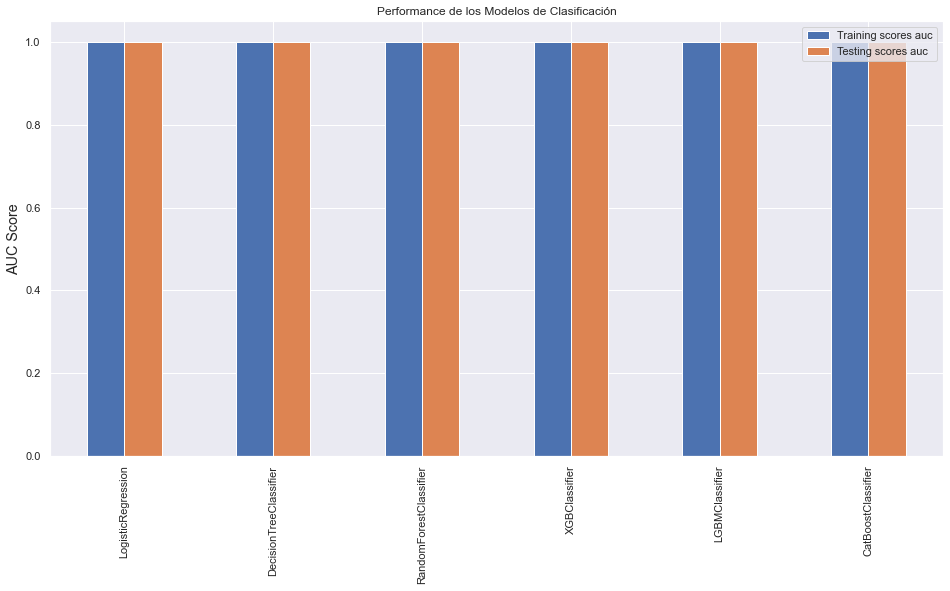

In [120]:
# Plot to compare the performance of the algorithms on both datasets
ax = properties[["Training scores auc", "Testing scores auc"]].plot(kind="bar",title="Performance de los Modelos de Clasificación", figsize=(16, 8))
ax.set_ylabel("AUC Score", fontsize="large")


In [121]:
from time import time

# Initialize and fit the model
best_model = LGBMClassifier() 
best_model.fit(best_X_train, y_train)


# Separate the features and the target variable
predict_train_lg = best_model.predict_proba(best_X_train)[:,1]
predict_test_lg = best_model.predict_proba(best_X_test)[:,1]


# Print scores on both
print("auc o Roc on training in LGBMClassifier data : {:.3f}".format(roc_auc_score(y_train, predict_train_lg)))
print("auc o Roc on testing in LGBMClassifier  data : {:.3f}".format(roc_auc_score(y_test, predict_test_lg))) 

auc o Roc on training in LGBMClassifier data : 1.000
auc o Roc on testing in LGBMClassifier  data : 1.000


In [122]:
predict_lg_test = best_model.predict(best_X_test)
cm=confusion_matrix(y_test, predict_lg_test)
cm

array([[33,  0],
       [ 0, 11]], dtype=int64)

In [123]:
predict_lg_test

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [124]:
## Metricas de Validación manual
predict_lg_test = best_model.predict(best_X_test)
cm=confusion_matrix(y_test, predict_lg_test)


TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

ACC = accuracy_score(y_test, predict_lg_test)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
AUC = roc_auc_score(y_test, predict_test_lg)
GINI = 2*(AUC-0.5)

print("AUC : {:.3f}".format(AUC))
print("INDICE DE GINI : {:.3f}".format(GINI))
print("ACCURACY : {:.3f}".format(ACC))
print("SENSIBILIDAD O RECALL: {:.3f}".format(TPR))
print("ESPECIFICIDAD : {:.3f}".format(TPR))
print("PPV O PRECISION : {:.3f}".format(PPV))
print("NPV : {:.3f}".format(NPV))

AUC : 1.000
INDICE DE GINI : 1.000
ACCURACY : 1.000
SENSIBILIDAD O RECALL: 1.000
ESPECIFICIDAD : 1.000
PPV O PRECISION : 1.000
NPV : 1.000


In [125]:
best_model = LGBMClassifier() 
best_model.fit(best_X_train, y_train)

LGBMClassifier()

In [126]:
predict_lg_test = best_model.predict(best_X_test)

In [127]:
print(metrics.classification_report(y_test, predict_lg_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        11

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



Cross Validation and Optimización de Modelos

In [128]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(best_model.get_params()) 

Parameters currently in use:

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}


Random Hyperparameter Grid

In [129]:
# Number of trees in random forest
iterations = [int(x) for x in np.linspace(start = 500, stop = 2500, num = 10)]
# Metrics eval
colsample_bytree = [0.6, 0.7, 0.8 , 0.9, 1]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 10, num = 5)]
max_depth.append(None)
# Method of selecting samples for training each tree
learning_rate = [0.05, 0.1, 0.15 ,0.2]
# Create the random grid
random_grid = {'iterations': iterations,
               'colsample_bytree': colsample_bytree,
               'max_depth': max_depth,
               'learning_rate': learning_rate}
pprint(random_grid)

{'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
 'iterations': [500, 722, 944, 1166, 1388, 1611, 1833, 2055, 2277, 2500],
 'learning_rate': [0.05, 0.1, 0.15, 0.2],
 'max_depth': [3, 4, 6, 8, 10, None]}


In [130]:
{'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
 'iterations': [500, 722, 944, 1166, 1388, 1611, 1833, 2055, 2277, 2500],
 'learning_rate': [0.05, 0.1, 0.15, 0.2],
 'max_depth': [3, 4, 6, 8, 10, None]}

{'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
 'iterations': [500, 722, 944, 1166, 1388, 1611, 1833, 2055, 2277, 2500],
 'learning_rate': [0.05, 0.1, 0.15, 0.2],
 'max_depth': [3, 4, 6, 8, 10, None]}

In [131]:
best_X_train.columns

Index(['Facturacion_aceite', 'Facturacion_acondicionador',
       'Facturacion_aerosol', 'Facturacion_color', 'Facturacion_crema',
       'Facturacion_shampoo', 'Facturacion_spray', 'Facturacion_tratam',
       'Facturacion_total', 'top'],
      dtype='object')

In [132]:
best_X= X[variables]
best_X.columns

Index(['Facturacion_aceite', 'Facturacion_acondicionador',
       'Facturacion_aerosol', 'Facturacion_color', 'Facturacion_crema',
       'Facturacion_shampoo', 'Facturacion_spray', 'Facturacion_tratam',
       'Facturacion_total', 'top'],
      dtype='object')

In [133]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
lgb = LGBMClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 50 different combinations, and use all available cores
lgb_random = RandomizedSearchCV(estimator = lgb, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=1416, n_jobs = -1)
# Fit the random search model
lgb_random.fit(best_X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.8s


[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.2s finished


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1],
                                        'iterations': [500, 722, 944, 1166,
                                                       1388, 1611, 1833, 2055,
                                                       2277, 2500],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [3, 4, 6, 8, 10, None]},
                   random_state=1416, verbose=2)

In [134]:
lgb_random.best_params_

{'max_depth': 6,
 'learning_rate': 0.2,
 'iterations': 2055,
 'colsample_bytree': 0.6}

In [135]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:.12g}%.'.format(accuracy))
    return accuracy

In [136]:
base_model = LGBMClassifier()
base_model.fit(best_X_train, y_train)
base_accuracy = evaluate(base_model, best_X_test, y_test)

best_random = lgb_random.best_estimator_
best_random.fit(best_X_train, y_train)
random_accuracy = evaluate(best_random, best_X_test, y_test)
print('Improvement of {:.12g}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 1%.
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Model Performance
Accuracy = 1%.
Improvement of 0%.


Grid Search with Cross Validation

In [137]:
# Number of trees in random forest
iterations = [300, 400, 500, 600]
# Metrics eval
colsample_bytree = [0.7, 0.8, 0.9]
# Maximum number of levels in tree
max_depth = [3, 4, 6, 8]
# Method of selecting samples for training each tree
learning_rate = [0.1, 0.15 ,0.2]
# Create the random grid
param_grid = {'iterations': iterations,
               'colsample_bytree': colsample_bytree,
               'max_depth': max_depth,
               'learning_rate': learning_rate}
pprint(param_grid)

{'colsample_bytree': [0.7, 0.8, 0.9],
 'iterations': [300, 400, 500, 600],
 'learning_rate': [0.1, 0.15, 0.2],
 'max_depth': [3, 4, 6, 8]}


In [138]:
# Create a based model
lgb = LGBMClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lgb, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(best_X, y)
grid_search.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    5.1s


[LightGBM] [Warning] Unknown parameter: iterations


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   14.7s finished


{'colsample_bytree': 0.7,
 'iterations': 300,
 'learning_rate': 0.1,
 'max_depth': 3}

In [139]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, best_X_test, y_test)
print('Improvement of {:.12g}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 1%.
Improvement of 0%.


In [1]:
comport.head()

NameError: name 'comport' is not defined

Aprendizaje Supervisado - Regresión

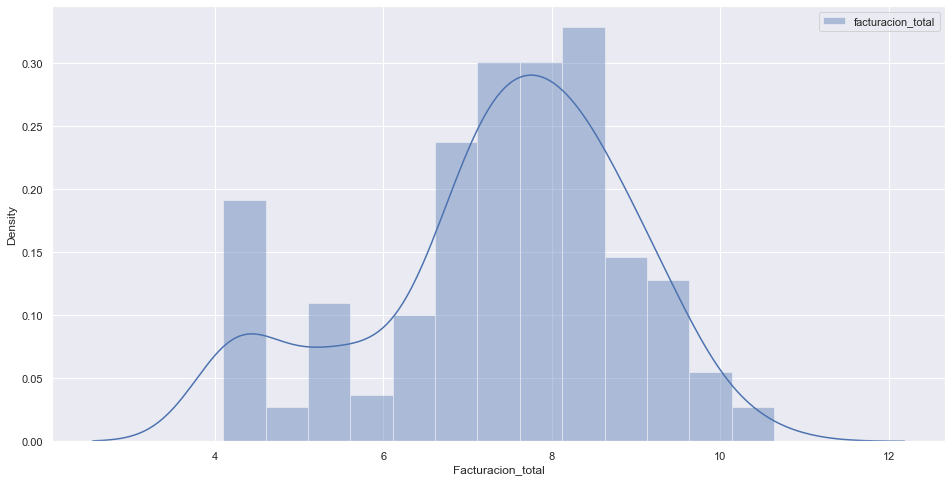

In [140]:
# Grouped boxplot
plt.figure(figsize=(16,8))
sns.distplot(np.log(comport["Facturacion_total"]) , label="facturacion_total")
plt.legend()
plt.show()

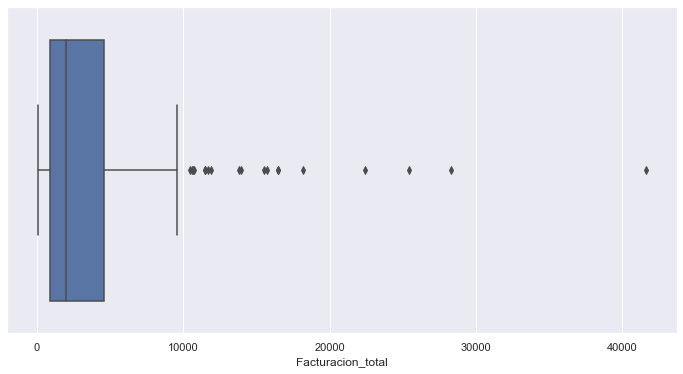

In [141]:
# Grouped boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Facturacion_total', data=comport);

In [142]:
comport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_venta                    218 non-null    int32  
 1   Covid                       218 non-null    int32  
 2   Cerrado_COVID               218 non-null    int32  
 3   Canales                     218 non-null    int32  
 4   Mes                         218 non-null    int32  
 5   Ano_Mes                     218 non-null    object 
 6   Facturacion_aceite          218 non-null    float64
 7   Facturacion_acondicionador  218 non-null    float64
 8   Facturacion_aerosol         218 non-null    float64
 9   Facturacion_balsamo         218 non-null    float64
 10  Facturacion_cera            218 non-null    float64
 11  Facturacion_color           218 non-null    float64
 12  Facturacion_crema           218 non-null    float64
 13  Facturacion_gel             218 non

Preprocesing la Data

In [143]:
## selection of category variables
target = 'Facturacion_total'
exclude = ['Ano_Mes']

cols = [x for x in comport.columns if x not in exclude + [target]]
cols_cat = comport[cols].select_dtypes(['object']).columns.tolist()
index_categorical=[cols.index(x) for x in cols_cat]
print(exclude, '\n\n', index_categorical,cols_cat)


## For Training

for i in cols_cat:
    le = preprocessing.LabelEncoder()
    le.fit(list(comport[i].dropna()))
    comport.loc[~comport[i].isnull(),i]=le.transform(comport[i].dropna())

comport[cols].head()

['Ano_Mes'] 

 [] []


id_venta  Covid  Cerrado_COVID  Canales  Mes  Facturacion_aceite  \
0         0      0              0        1    1              355.80   
1         1      0              0        1    2              355.80   
2         2      0              0        1    3              711.60   
3         3      0              0        1    4              711.60   
4         4      0              0        1    4               71.16   

   Facturacion_acondicionador  Facturacion_aerosol  Facturacion_balsamo  \
0                     1945.80                  0.0                  0.0   
1                        0.00                  0.0                  0.0   
2                      314.40                  0.0                  0.0   
3                        0.00               1329.6                  0.0   
4                      440.16                  0.0                  0.0   

   Facturacion_cera  Facturacion_color  Facturacion_crema  Facturacion_gel  \
0               0.0                0.0                0.0              0.0   
1             307.8                0.0                0.0              0.0   
2               0.0                0.0                0.0              0.0   
3               0.0                0.0                0.0              0.0   
4               0.0                0.0                0.0            167.4   

   Facturacion_mousse  Facturacion_pack  Facturacion_pasta  \
0               961.2               0.0                0.0   
1                 0.0               0.0                0.0   
2              1233.6               0.0                0.0   
3                 0.0               0.0                0.0   
4                 0.0               0.0                0.0   

   Facturacion_pomada  Facturacion_shampoo  Facturacion_spray  \
0                 0.0                 0.00              355.8   
1                 0.0              1245.60              355.8   
2                 0.0               279.00                0.0   
3                 0.0                 0.00                0.0   
4                 0.0               548.88                0.0   

   Facturacion_suero  Facturacion_tonico  Facturacion_tratam  top  
0              326.4                 0.0              759.60    1  
1                0.0                 0.0             3111.78    1  
2                0.0                 0.0             1212.12    0  
3                0.0                 0.0                0.00    0  
4                0.0                 0.0             1576.32    0

In [144]:
comport.Ano_Mes.min()

'201702'

In [145]:
comport.Ano_Mes.max()

'202012'

In [146]:
X_train = comport[comport.Ano_Mes < '202006'].drop(['Facturacion_total','Ano_Mes'], axis=1)
X_test = comport[comport.Ano_Mes >= '202006'].drop(['Facturacion_total','Ano_Mes'], axis=1)
y_train = comport[comport.Ano_Mes < '202006'][['Facturacion_total']]
y_test= comport[comport.Ano_Mes >= '202006'][['Facturacion_total']]

In [147]:
X = comport.drop(['Facturacion_total','Ano_Mes'], axis=1)
y = comport[['Facturacion_total']]

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [149]:
X_test.shape

(44, 23)

In [150]:
y_test.shape

(44, 1)

Regresion Lineal Estadística

In [151]:
y_train.head()

Facturacion_total
22             2372.76
142             998.28
188            4251.24
39            16446.00
66             3803.88

In [152]:
## Modelos de regresion
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm           
import statsmodels.formula.api as smf 

In [153]:
M_R = sm.OLS(np.sqrt(y_train),X_train).fit()

In [154]:
M_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Facturacion_total   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              271.8
Date:                Fri, 12 Mar 2021   Prob (F-statistic):                   2.56e-110
Time:                        01:03:04   Log-Likelihood:                         -639.71
No. Observations:                 174   AIC:                                      1323.
Df Residuals:                     152   BIC:                                      1393.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
id_venta                       0.0188      0.018      1.062      0.290      -0.016       0.054
Covid                         -2.4222      2.970     -0.816      0.416      -8.290       3.446
Cerrado_COVID                 -4.1956      5.206     -0.806      0.422     -14.481       6.090
Canales                       16.3667      1.938      8.443      0.000      12.537      20.196
Mes                            0.3852      0.261      1.476      0.142      -0.131       0.901
Facturacion_aceite             0.0176      0.002     11.511      0.000       0.015       0.021
Facturacion_acondicionador    -0.0033      0.002     -1.843      0.067      -0.007       0.000
Facturacion_aerosol            0.0023      0.004      0.630      0.529      -0.005       0.010
Facturacion_balsamo           -0.0089      0.034     -0.260      0.795      -0.077       0.059
Facturacion_cera               0.0137      0.004      3.606      0.000       0.006       0.021
Facturacion_color              0.0052      0.001      5.933      0.000       0.003       0.007
Facturacion_crema              0.0092      0.004      2.147      0.033       0.001       0.018
Facturacion_gel                0.0008      0.010      0.077      0.939      -0.020       0.021
Facturacion_mousse             0.0108      0.004      2.459      0.015       0.002       0.019
Facturacion_pack               0.0081      0.002      3.982      0.000       0.004       0.012
Facturacion_pasta              0.0037      0.042      0.089      0.930      -0.080       0.087
Facturacion_pomada            -0.0089      0.034     -0.260      0.795      -0.077       0.059
Facturacion_shampoo            0.0073      0.002      4.491      0.000       0.004       0.011
Facturacion_spray              0.0052      0.004      1.151      0.252      -0.004       0.014
Facturacion_suero              0.0274      0.009      3.028      0.003       0.010       0.045
Facturacion_tonico             0.0448      0.026      1.697      0.092      -0.007       0.097
Facturacion_tratam             0.0061      0.001      5.881      0.000       0.004       0.008
top                           11.5194      3.048      3.779      0.000       5.497      17.542
==============================================================================
Omnibus:                        0.785   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.865
Skew:                           0.154   Prob(JB):                        0.649
Kurtosis:                       2.844   Cond. No.                     4.00e+18
==============================================================================

Notes:
[1] R² is computed without cente

In [155]:
## Regresión Lineal Múltiple

X_train.shape

X_train.head()


id_venta  Covid  Cerrado_COVID  Canales  Mes  Facturacion_aceite  \
22         22      0              0        1    1              924.36   
142       142      0              0        1    8              998.28   
188       188      1              0        1    7              998.28   
39         39      0              0        1    4              616.24   
66         66      0              0        1    9              924.36   

     Facturacion_acondicionador  Facturacion_aerosol  Facturacion_balsamo  \
22                          0.0                  0.0                  0.0   
142                         0.0                  0.0                  0.0   
188                         0.0                  0.0                  0.0   
39                       5505.6                664.8                  0.0   
66                        628.8                  0.0                  0.0   

     Facturacion_cera  Facturacion_color  Facturacion_crema  Facturacion_gel  \
22              688.8                0.0                0.0              0.0   
142               0.0                0.0                0.0              0.0   
188               0.0                0.0                0.0              0.0   
39             3931.0                0.0              668.2              0.0   
66                0.0                0.0                0.0              0.0   

     Facturacion_mousse  Facturacion_pack  Facturacion_pasta  \
22                  0.0              0.00                0.0   
142                 0.0              0.00                0.0   
188                 0.0              0.00                0.0   
39               2004.6              0.00                0.0   
66                  0.0           1041.12                0.0   

     Facturacion_pomada  Facturacion_shampoo  Facturacion_spray  \
22                  0.0                 0.00                0.0   
142                 0.0                 0.00                0.0   
188                 0.0                 0.00                0.0   
39                  0.0              1187.16             1868.4   
66                  0.0               556.80                0.0   

     Facturacion_suero  Facturacion_tonico  Facturacion_tratam  top  
22                 0.0                 0.0              759.60    0  
142                0.0                 0.0                0.00    0  
188                0.0                 0.0             3252.96    0  
39                 0.0                 0.0                0.00    1  
66                 0.0                 0.0              652.80    0

In [156]:

## Usando el api de SKlearn

lm = LinearRegression()
lm.fit(X_train,np.sqrt(y_train))

lm.get_params()




{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [157]:

# The coefficients
print('Coefficients: \n', lm.coef_)


Coefficients: 
 [[-2.13678922e-02  3.01527670e+00 -6.37241667e+00 -4.22928081e+00
  -4.83913381e-02  1.49389384e-02 -8.93636206e-04  2.16303649e-03
  -4.50239369e-03  1.16822570e-02  5.29032337e-03  4.46164266e-03
   1.13218025e-03  8.54183988e-03  8.66101342e-03  4.50519938e-03
  -4.50239369e-03  6.33641113e-03  5.12936971e-03  2.45659823e-02
   4.43185694e-02  6.34686211e-03  1.10770615e+01]]


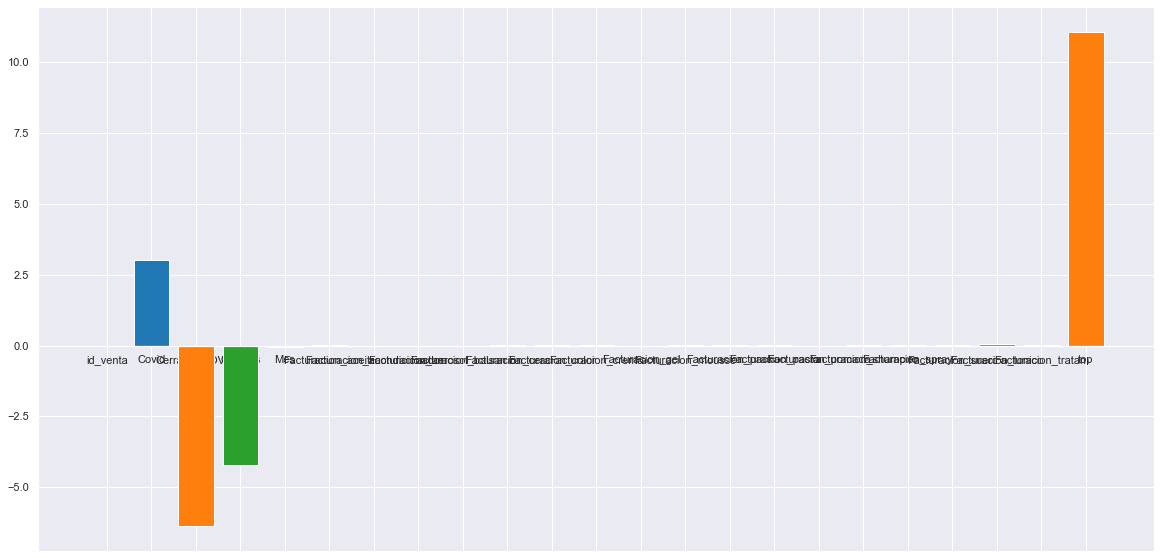

In [158]:

## Coefiencientes del modelo
rL_coefficient = pd.DataFrame() 
rL_coefficient["Columns"]= X_train.columns 
rL_coefficient['Coefficient_Estimate'] = pd.DataFrame(lm.coef_).T
rL_coefficient

sns.set(font_scale=1)
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive'] 
  
ax.bar(X_train.columns ,  
rL_coefficient.Coefficient_Estimate,  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 


In [159]:

## Performace del Modelo

np.log(4)

np.exp(np.log(4))


4.0

In [160]:

## Definimos la función del MAPE

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [161]:
#predicciones
predictions = lm.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', mean_absolute_percentage_error(y_test, predictions))


MAE: 1469.0526449735826
MSE: 17597192.901180115
RMSE: 4194.90082137589
MAPE: 101.38441439362286


Text(0, 0.5, 'Predicted Y')

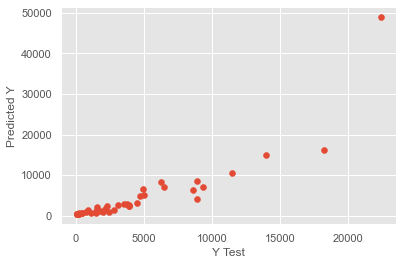

In [162]:

### Gráfico de test

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')



In [163]:
## Regresión Ridge

model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train, np.sqrt(y_train)) 

ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_train.columns 
ridge_coefficient['Coefficient_Estimate'] = pd.DataFrame(model_ridge.coef_).T
ridge_coefficient


Columns  Coefficient_Estimate
0                     id_venta             -0.020246
1                        Covid              2.526459
2                Cerrado_COVID             -4.991467
3                      Canales             -3.696547
4                          Mes             -0.033714
5           Facturacion_aceite              0.015094
6   Facturacion_acondicionador             -0.000994
7          Facturacion_aerosol              0.002221
8          Facturacion_balsamo             -0.004262
9             Facturacion_cera              0.011749
10           Facturacion_color              0.005341
11           Facturacion_crema              0.004574
12             Facturacion_gel              0.000423
13          Facturacion_mousse              0.008724
14            Facturacion_pack              0.008749
15           Facturacion_pasta              0.006075
16          Facturacion_pomada             -0.004262
17         Facturacion_shampoo              0.006459
18           Facturacion_spray              0.005371
19           Facturacion_suero              0.024853
20          Facturacion_tonico              0.044398
21          Facturacion_tratam              0.006442
22                         top             10.256577

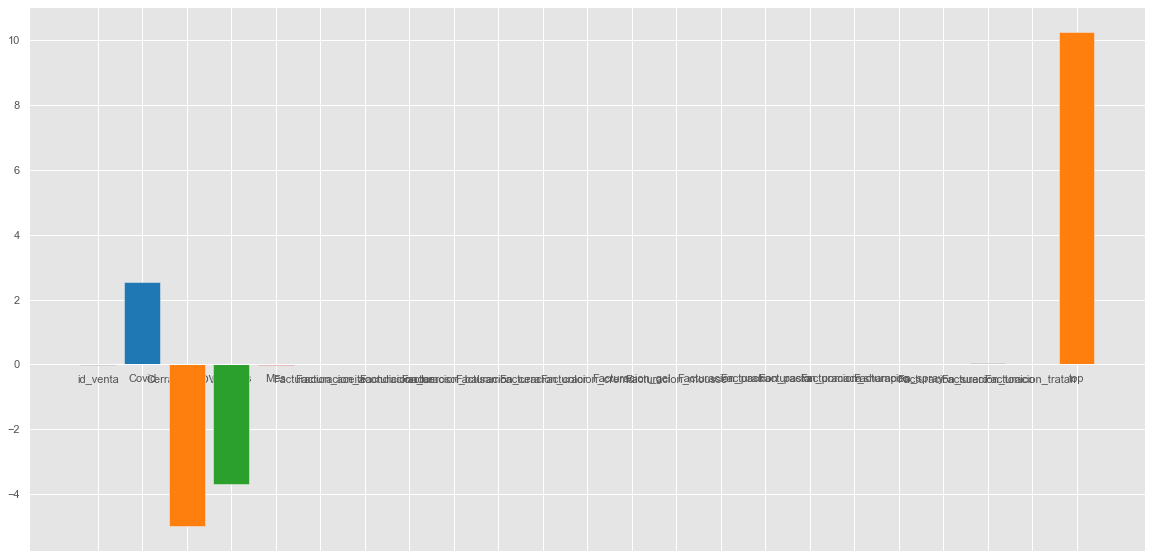

In [164]:

## Gráfico de los Parámetros del Modelo Ridge

fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive'] 
  
ax.bar(X_train.columns ,  
ridge_coefficient.Coefficient_Estimate,  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 


In [165]:

## Performace del Modelo

pred_test_rr= model_ridge.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, pred_test_rr))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_rr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_rr)))
print('MAPE:', mean_absolute_percentage_error(y_test, pred_test_rr))


MAE: 1489.7278666563222
MSE: 18398324.27093515
RMSE: 4289.326785281713
MAPE: 102.86629888442147


Text(0, 0.5, 'Predicted Y')

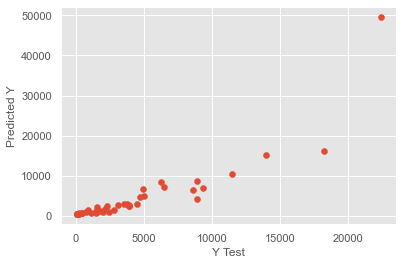

In [166]:

### Gráfico de test

plt.scatter(y_test,pred_test_rr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


In [167]:

## Regresión Lasso

model_lasso = Lasso(alpha= 0.01)
model_lasso.fit(X_train, np.sqrt(y_train)) 


ridge_lasso = pd.DataFrame() 
ridge_lasso["Columns"]= X_train.columns 
ridge_lasso['Coefficient_Estimate'] = pd.DataFrame(model_lasso.coef_)
ridge_lasso


Columns  Coefficient_Estimate
0                     id_venta             -0.020751
1                        Covid              2.740239
2                Cerrado_COVID             -5.824850
3                      Canales             -3.938963
4                          Mes             -0.039289
5           Facturacion_aceite              0.014969
6   Facturacion_acondicionador             -0.000927
7          Facturacion_aerosol              0.002146
8          Facturacion_balsamo             -0.000002
9             Facturacion_cera              0.011676
10           Facturacion_color              0.005298
11           Facturacion_crema              0.004557
12             Facturacion_gel              0.001001
13          Facturacion_mousse              0.008565
14            Facturacion_pack              0.008662
15           Facturacion_pasta              0.004940
16          Facturacion_pomada             -0.008735
17         Facturacion_shampoo              0.006367
18           Facturacion_spray              0.005236
19           Facturacion_suero              0.024631
20          Facturacion_tonico              0.044586
21          Facturacion_tratam              0.006359
22                         top             10.966835

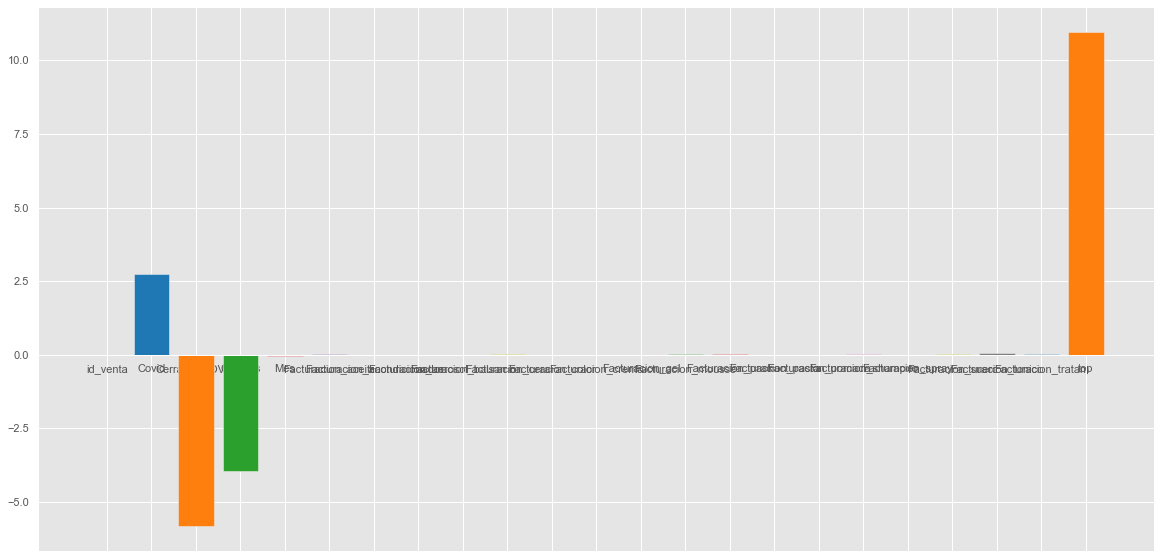

In [168]:

## Gráfico de los Parámetros del Modelo Lasso

fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive'] 
  
ax.bar(X_train.columns ,  
ridge_lasso.Coefficient_Estimate,  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 


In [169]:

## Performace del Modelo

pred_test_lasso= model_lasso.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, pred_test_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_lasso)))
print('MAPE:', mean_absolute_percentage_error(y_test, pred_test_lasso))


MAE: 1484.9702294188407
MSE: 17936306.439772796
RMSE: 4235.127676915159
MAPE: 1047.784130999102


Columns  Coefficient_Estimate
0                     id_venta             -0.020102
1                        Covid              2.462372
2                Cerrado_COVID             -4.917359
3                      Canales             -3.631082
4                          Mes             -0.031424
5           Facturacion_aceite              0.015089
6   Facturacion_acondicionador             -0.000997
7          Facturacion_aerosol              0.002207
8          Facturacion_balsamo              0.002333
9             Facturacion_cera              0.011739
10           Facturacion_color              0.005339
11           Facturacion_crema              0.004602
12             Facturacion_gel              0.000449
13          Facturacion_mousse              0.008713
14            Facturacion_pack              0.008740
15           Facturacion_pasta              0.006106
16          Facturacion_pomada             -0.010820
17         Facturacion_shampoo              0.006459
18           Facturacion_spray              0.005389
19           Facturacion_suero              0.024848
20          Facturacion_tonico              0.044500
21          Facturacion_tratam              0.006436
22                         top             10.303007

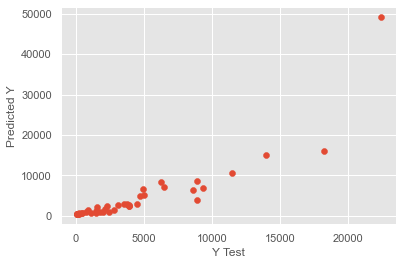

In [170]:

### Gráfico de test

plt.scatter(y_test,pred_test_lasso)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Regresión Elastic Net

#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, np.sqrt(y_train)) 


ridge_elastic_net= pd.DataFrame() 
ridge_elastic_net["Columns"]= X_train.columns 
ridge_elastic_net['Coefficient_Estimate'] = pd.DataFrame(model_enet.coef_)
ridge_elastic_net


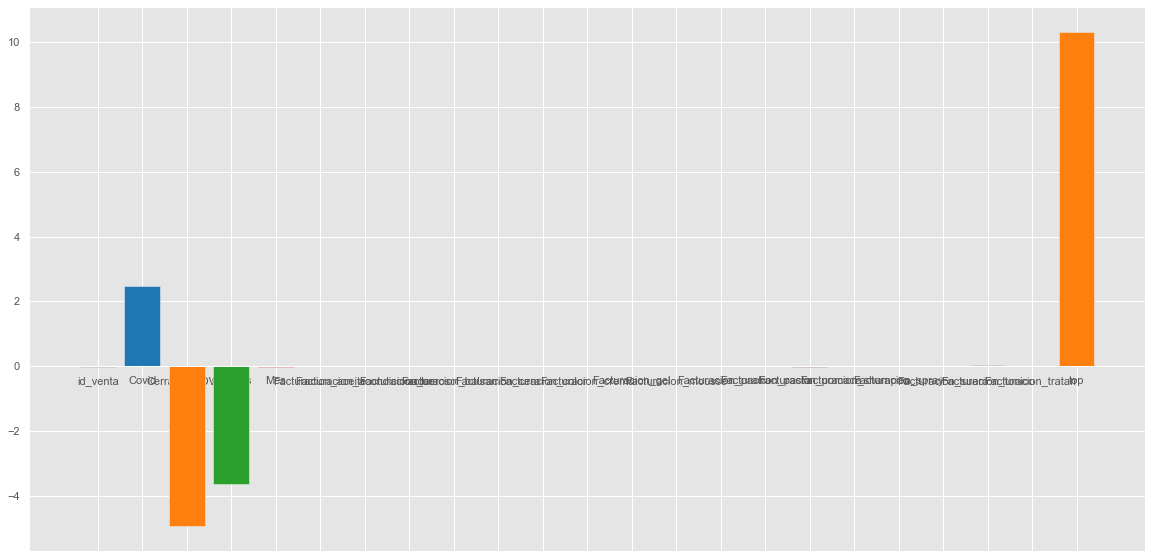

In [171]:

## Gráfico de los Parámetros del Modelo Eslastic Net

fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive'] 
  
ax.bar(X_train.columns ,  
ridge_elastic_net.Coefficient_Estimate,  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 


In [172]:

## Performace del Modelo

pred_test_enet= model_enet.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, pred_test_enet))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_enet))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_enet)))
print('MAPE:', mean_absolute_percentage_error(y_test, pred_test_enet))



MAE: 1502.5522207602987
MSE: 18513723.391146522
RMSE: 4302.757649594795
MAPE: 1049.1404218489254


Text(0, 0.5, 'Predicted Y')

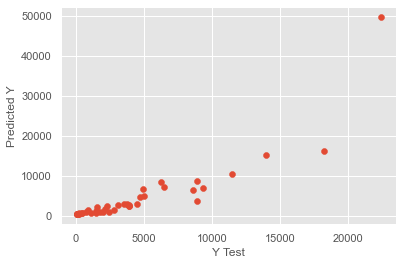

In [173]:
### Gráfico de test

plt.scatter(y_test,pred_test_enet)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Modelo No Supervisado - Clustering

In [174]:
!pip install pyclustering

In [175]:
from pyclustering.cluster.clarans import clarans;
from pyclustering.utils import timedcall;
from pyclustering.cluster.kmedoids import kmedoids;
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
## Clustering Jerarquico

### Normalizamos los datos

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(comport)
normalized = scaler.transform(comport)
normalized1 = pd.DataFrame(normalized,columns=list(comport.columns))
zscore_df = normalized1
zscore_df.head(10)



id_venta  Covid  Cerrado_COVID  Canales       Mes   Ano_Mes  \
0  0.000000    0.0            0.0      1.0  0.090909  0.000000   
1  0.004608    0.0            0.0      1.0  0.181818  0.003226   
2  0.009217    0.0            0.0      1.0  0.272727  0.006452   
3  0.013825    0.0            0.0      1.0  0.363636  0.009677   
4  0.018433    0.0            0.0      1.0  0.363636  0.009677   
5  0.023041    0.0            0.0      1.0  0.363636  0.009677   
6  0.027650    0.0            0.0      1.0  0.000000  0.319355   
7  0.032258    0.0            0.0      1.0  0.000000  0.319355   
8  0.036866    0.0            0.0      1.0  0.000000  0.319355   
9  0.041475    0.0            0.0      1.0  0.090909  0.322581   

   Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0            0.039712                    0.174198             0.000000   
1            0.039712                    0.000000             0.000000   
2            0.083071                    0.028147             0.000000   
3            0.083071                    0.000000             0.532129   
4            0.005024                    0.039405             0.000000   
5            0.039712                    0.000000             0.000000   
6            0.221645                    0.000000             0.000000   
7            0.108999                    0.070367             0.000000   
8            0.221645                    0.042220             0.000000   
9            0.108999                    0.000000             0.000000   

   Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0                  0.0          0.000000                0.0   
1                  0.0          0.078301                0.0   
2                  0.0          0.000000                0.0   
3                  0.0          0.000000                0.0   
4                  0.0          0.000000                0.0   
5                  0.0          0.000000                0.0   
6                  0.0          0.000000                0.0   
7                  0.0          0.000000                0.0   
8                  0.0          0.000000                0.0   
9                  0.0          0.000000                0.0   

   Facturacion_crema  Facturacion_gel  Facturacion_mousse  Facturacion_pack  \
0                0.0         0.000000            0.479497               0.0   
1                0.0         0.000000            0.000000               0.0   
2                0.0         0.000000            0.615385               0.0   
3                0.0         0.000000            0.000000               0.0   
4                0.0         0.237447            0.000000               0.0   
5                0.0         0.000000            0.000000               0.0   
6                0.0         0.000000            0.000000               0.0   
7                0.0         0.000000            0.000000               0.0   
8                0.0         0.000000            0.000000               0.0   
9                0.0         0.000000            0.000000               0.0   

   Facturacion_pasta  Facturacion_pomada  Facturacion_shampoo  \
0                0.0                 0.0             0.000000   
1                0.0                 0.0             0.097051   
2                0.0                 0.0             0.021738   
3                0.0                 0.0             0.000000   
4                0.0                 0.0             0.042766   
5                0.0                 0.0             0.000000   
6                0.0                 0.0             0.000000   
7                0.0                 0.0             0.080717   
8                0.0                 0.0             0.000000   
9                0.0                 0.0             0.000000   

   Facturacion_spray  Facturacion_suero  Facturacion_tonico  \
0            0.19043           0.462979                 0.0   
1            0.19043           0.000000                

In [177]:

### Estandarizamos los datos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(comport)
standarizar = scaler.transform(comport)
standarizar1 = pd.DataFrame(standarizar,columns=list(comport.columns))
zscore_df1 = standarizar1
zscore_df1.head(10)


id_venta     Covid  Cerrado_COVID   Canales       Mes   Ano_Mes  \
0 -1.724124 -0.495696       -0.19518  0.219265 -1.416311 -2.169891   
1 -1.708233 -0.495696       -0.19518  0.219265 -1.124757 -2.158082   
2 -1.692343 -0.495696       -0.19518  0.219265 -0.833203 -2.146274   
3 -1.676452 -0.495696       -0.19518  0.219265 -0.541649 -2.134465   
4 -1.660562 -0.495696       -0.19518  0.219265 -0.541649 -2.134465   
5 -1.644671 -0.495696       -0.19518  0.219265 -0.541649 -2.134465   
6 -1.628781 -0.495696       -0.19518  0.219265 -1.707865 -1.000851   
7 -1.612890 -0.495696       -0.19518  0.219265 -1.707865 -1.000851   
8 -1.596999 -0.495696       -0.19518  0.219265 -1.707865 -1.000851   
9 -1.581109 -0.495696       -0.19518  0.219265 -1.416311 -0.989042   

   Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0           -0.516117                    1.061494            -0.287500   
1           -0.516117                   -0.446122            -0.287500   
2           -0.096973                   -0.202523            -0.287500   
3           -0.096973                   -0.446122             3.799496   
4           -0.851432                   -0.105084            -0.287500   
5           -0.516117                   -0.446122            -0.287500   
6            1.242591                   -0.446122            -0.287500   
7            0.153665                    0.162875            -0.287500   
8            1.242591                   -0.080724            -0.287500   
9            0.153665                   -0.446122            -0.287500   

   Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0            -0.096225         -0.147030          -0.230834   
1            -0.096225          0.937022          -0.230834   
2            -0.096225         -0.147030          -0.230834   
3            -0.096225         -0.147030          -0.230834   
4            -0.096225         -0.147030          -0.230834   
5            -0.096225         -0.147030          -0.230834   
6            -0.096225         -0.147030          -0.230834   
7            -0.096225         -0.147030          -0.230834   
8            -0.096225         -0.147030          -0.230834   
9            -0.096225         -0.147030          -0.230834   

   Facturacion_crema  Facturacion_gel  Facturacion_mousse  Facturacion_pack  \
0          -0.258197        -0.296842            3.504488         -0.214741   
1          -0.258197        -0.296842           -0.325005         -0.214741   
2          -0.258197        -0.296842            4.589749         -0.214741   
3          -0.258197        -0.296842           -0.325005         -0.214741   
4          -0.258197         1.057839           -0.325005         -0.214741   
5          -0.258197        -0.296842           -0.325005         -0.214741   
6          -0.258197        -0.296842           -0.325005         -0.214741   
7          -0.258197        -0.296842           -0.325005         -0.214741   
8          -0.258197        -0.296842           -0.325005         -0.214741   
9          -0.258197        -0.296842           -0.325005         -0.214741   

   Facturacion_pasta  Facturacion_pomada  Facturacion_shampoo  \
0          -0.130622            -0.12958            -0.506304   
1          -0.130622            -0.12958             0.349276   
2          -0.130622            -0.12958            -0.314664   
3          -0.130622            -0.12958            -0.506304   
4          -0.130622            -0.12958            -0.129288   
5          -0.130622            -0.12958            -0.506304   
6          -0.130622            -0.12958            -0.506304   
7          -0.130622            -0.12958             0.205278   
8          -0.130622            -0.12958            -0.506304   
9          -0.130622            -0.12958            -0.506304   

   Facturacion_spray  Facturacion_suero  Facturacion_tonico  \
0           1.156218           2.513636           -0.092022   
1          

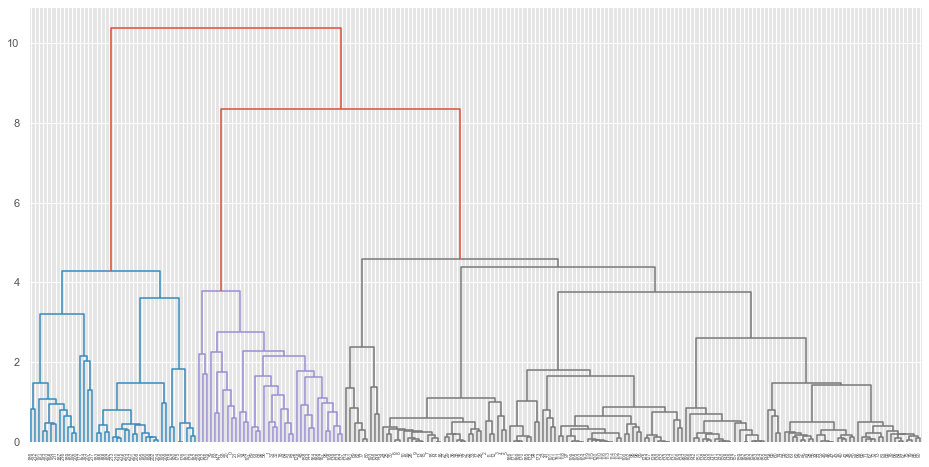

In [178]:

## Dendograma

from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

seed = 16
np.random.seed(seed)

linked = linkage(zscore_df,method = 'ward')

labelList = range(1, 11)

plt.figure(figsize=(16, 8))  
dendrogram(linked)
plt.show()  


In [179]:

## Construimos el Modelo Jerarquico con 4 cluster

from sklearn.cluster import AgglomerativeClustering

seed = 16
np.random.seed(seed)

cluster_Ag = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster_Ag.fit_predict(zscore_df)   ## Recordar que aca se reemplaza su dataframe

label_ag = pd.DataFrame(cluster_Ag.labels_,columns= ['Cluster'])
cluster_Jerarq = pd.concat([comport,label_ag['Cluster']], axis=1)
cluster_Jerarq


id_venta  Covid  Cerrado_COVID  Canales  Mes Ano_Mes  Facturacion_aceite  \
0           0      0              0        1    1  201702              355.80   
1           1      0              0        1    2  201703              355.80   
2           2      0              0        1    3  201704              711.60   
3           3      0              0        1    4  201705              711.60   
4           4      0              0        1    4  201705               71.16   
5           5      0              0        1    4  201705              355.80   
6           6      0              0        1    0  201801             1848.72   
7           7      0              0        1    0  201801              924.36   
8           8      0              0        1    0  201801             1848.72   
9           9      0              0        1    1  201802              924.36   
10         10      0              0        1    1  201802              462.18   
11         11      0              0        1    1  201802              924.36   
12         12      0              0        1    1  201802              924.36   
13         13      0              0        1    1  201802              924.36   
14         14      0              0        1    1  201802              924.36   
15         15      0              0        1    1  201802              924.36   
16         16      0              0        1    1  201802              924.36   
17         17      0              0        1    1  201802              462.18   
18         18      0              0        1    1  201802              924.36   
19         19      0              0        1    1  201802              308.12   
20         20      0              0        1    1  201802             2773.08   
21         21      0              0        1    1  201802              924.36   
22         22      0              0        1    1  201802              924.36   
23         23      0              0        1    1  201802              462.18   
24         24      0              0        1    1  201802              924.36   
25         25      0              0        1    1  201802              616.24   
26         26      0              0        1    1  201802              924.36   
27         27      0              0        1    2  201803              462.18   
28         28      0              0        1    2  201803              924.36   
29         29      0              0        1    2  201803              369.73   
30         30      0              0        1    2  201803             1771.69   
31         31      0              0        1    2  201803             1848.72   
32         32      0              0        1    2  201803              924.36   
33         33      0              0        1    3  201804              924.36   
34         34      0              0        1    3  201804               77.03   
35         35      0              0        1    3  201804               77.03   
36         36      0              0        1    3  201804              154.06   
37         37      0              0        1    3  201804              231.09   
38         38      0              0        1    3  201804               61.62   
39         39      0              0        1    4  201805              616.24   
40         40      0              0        1    5  201806              308.12   
41         41      0              0        1    5  201806              924.36   
42         42      0              0        1    5  201806              616.24   
43         43      0              0        1    5  201806               61.62   
44         44      0              0        1    6  201807             1848.72   
45         45      0              0        1    6  201807              308.12   
46         46      0              0        1    6  201807              924.36   
47         47      0              0        1    6  201807              924.36   
48         48      0              0 

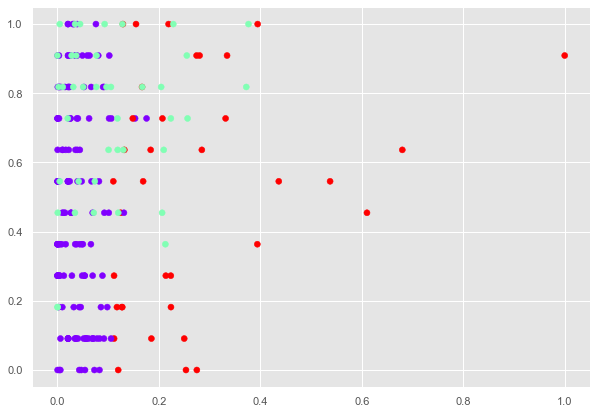

In [180]:

## Visualizacion en 2D

plt.figure(figsize=(10, 7))  
plt.scatter(zscore_df['Facturacion_total'], zscore_df['Mes'], c=cluster_Ag.labels_ , cmap='rainbow') 



0.26383425783602965

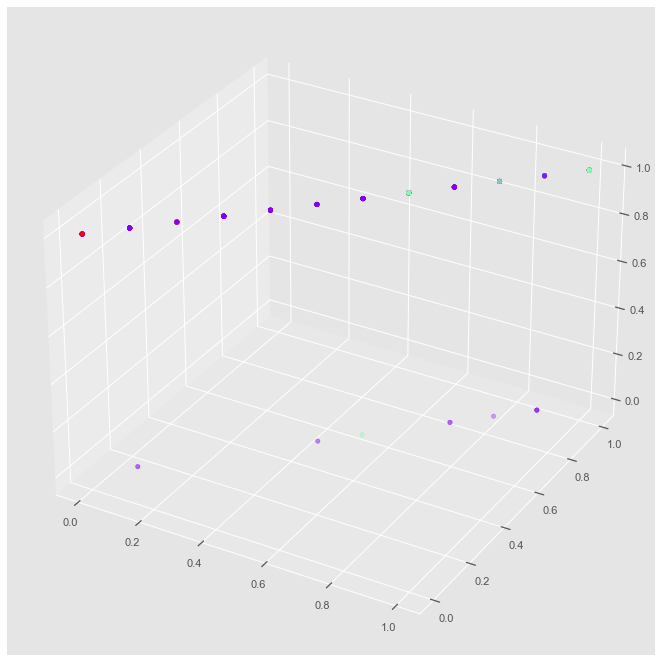

In [181]:
## Visualizacion en 3D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (18, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(zscore_df.Mes, zscore_df.Mes, zscore_df.Canales, c=cluster_Ag.labels_ ,cmap='rainbow')

from sklearn.metrics import silhouette_score
silhouette_score(comport.values, cluster_Ag.labels_, metric='euclidean')


In [182]:



## Usamos Kmedoides con P.A.M

#Debemos de fijar la cantidad de cluster

seed = 16 # con esto definimos la semilla o con random_state
np.random.seed(seed)

kmedoids_instance = kmedoids(zscore_df.values, [3, 6, 4],random_state=16); ## para probar mas cluster solo agregar en
# la lista [3, 6, 4] aca seria para 3 cluster si quieres 4 agrega [3, 6, 4, 10] un valor cualesquiera por que son aleatorios

#calls the clarans method 'process' to implement the algortihm
(ticks, result) = timedcall(kmedoids_instance.process);
print("Execution time : ", ticks, "\n");

#returns the clusters 
clusters_Kmed = kmedoids_instance.get_clusters();

#returns the mediods 
medoids = kmedoids_instance.get_medoids();

print("Index of the points that are in a cluster : ",clusters_Kmed)
print("The index of medoids that algorithm found to be best :", medoids)


Execution time :  0.055526799999995546 

Index of the points that are in a cluster :  [[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 84, 85, 86, 87, 88, 90, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 124, 125, 127, 128, 130, 131, 132, 133, 134, 135, 138, 140, 141, 142, 143, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 165, 166, 169, 170, 171, 172, 173, 174], [175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217], [0, 1, 20, 21, 31, 32, 34, 39, 48, 51, 52, 56, 64, 70, 78, 83, 89, 91, 92, 93, 98, 107, 108, 122, 123, 126, 129, 136

In [183]:

#Adecuamos los cluster con etiquetas

label = pd.DataFrame()
for i in range(3):  # Esto es para 3 cluster si quiero 4 cambio aca el valor anda mas  
    print(i)
    a = pd.DataFrame(clusters_Kmed[i],columns = ['Index']) 
    a['Cluster'] = i
    label = label.append(a)


0
1
2


In [184]:

label_f = label.sort_values(by ='Index').reset_index(drop='true')
cluster_Med = pd.concat([comport,label_f['Cluster']], axis=1)
cluster_Med



id_venta  Covid  Cerrado_COVID  Canales  Mes Ano_Mes  Facturacion_aceite  \
0           0      0              0        1    1  201702              355.80   
1           1      0              0        1    2  201703              355.80   
2           2      0              0        1    3  201704              711.60   
3           3      0              0        1    4  201705              711.60   
4           4      0              0        1    4  201705               71.16   
5           5      0              0        1    4  201705              355.80   
6           6      0              0        1    0  201801             1848.72   
7           7      0              0        1    0  201801              924.36   
8           8      0              0        1    0  201801             1848.72   
9           9      0              0        1    1  201802              924.36   
10         10      0              0        1    1  201802              462.18   
11         11      0              0        1    1  201802              924.36   
12         12      0              0        1    1  201802              924.36   
13         13      0              0        1    1  201802              924.36   
14         14      0              0        1    1  201802              924.36   
15         15      0              0        1    1  201802              924.36   
16         16      0              0        1    1  201802              924.36   
17         17      0              0        1    1  201802              462.18   
18         18      0              0        1    1  201802              924.36   
19         19      0              0        1    1  201802              308.12   
20         20      0              0        1    1  201802             2773.08   
21         21      0              0        1    1  201802              924.36   
22         22      0              0        1    1  201802              924.36   
23         23      0              0        1    1  201802              462.18   
24         24      0              0        1    1  201802              924.36   
25         25      0              0        1    1  201802              616.24   
26         26      0              0        1    1  201802              924.36   
27         27      0              0        1    2  201803              462.18   
28         28      0              0        1    2  201803              924.36   
29         29      0              0        1    2  201803              369.73   
30         30      0              0        1    2  201803             1771.69   
31         31      0              0        1    2  201803             1848.72   
32         32      0              0        1    2  201803              924.36   
33         33      0              0        1    3  201804              924.36   
34         34      0              0        1    3  201804               77.03   
35         35      0              0        1    3  201804               77.03   
36         36      0              0        1    3  201804              154.06   
37         37      0              0        1    3  201804              231.09   
38         38      0              0        1    3  201804               61.62   
39         39      0              0        1    4  201805              616.24   
40         40      0              0        1    5  201806              308.12   
41         41      0              0        1    5  201806              924.36   
42         42      0              0        1    5  201806              616.24   
43         43      0              0        1    5  201806               61.62   
44         44      0              0        1    6  201807             1848.72   
45         45      0              0        1    6  201807              308.12   
46         46      0              0        1    6  201807              924.36   
47         47      0              0        1    6  201807              924.36   
48         48      0              0 

In [185]:
cluster_Med.Cluster.value_counts()


0    138
2     42
1     38
Name: Cluster, dtype: int64

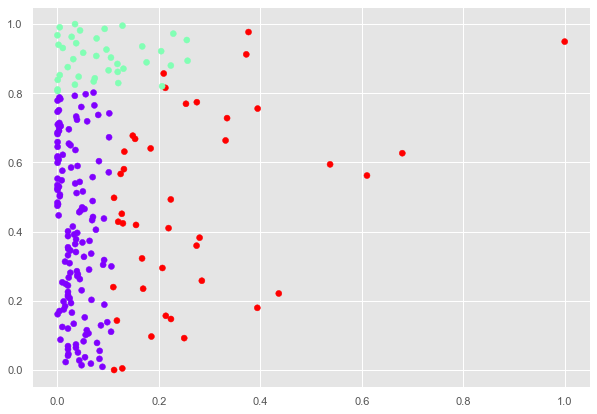

In [186]:

## Visualizacion en 2D

plt.figure(figsize=(10, 7))  
plt.scatter(zscore_df['Facturacion_total'], zscore_df['id_venta'], c=cluster_Med.Cluster, cmap='rainbow') 


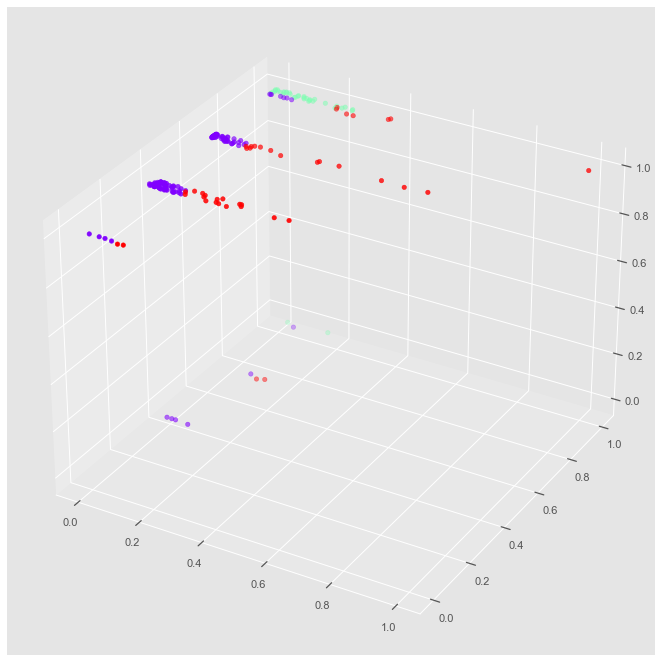

In [187]:

## Visualizacion en 3D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (18, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(zscore_df.Facturacion_total, zscore_df.Ano_Mes, zscore_df.Canales, c=cluster_Med.Cluster,cmap='rainbow')



In [188]:
### Métrica de Silueta

from sklearn.metrics import silhouette_score
silhouette_score(comport.values, cluster_Med.Cluster, metric='euclidean')



0.2381951788137758

In [189]:


## Usamos Kmeans

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=16)
kmeans.fit(zscore_df.values)
centroids = kmeans.cluster_centers_
print("The index of kemans that algorithm found to be best :", kmeans.labels_)



The index of kemans that algorithm found to be best : [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [190]:

#Adecuamos los cluster con etiquetas

label_km = pd.DataFrame(kmeans.labels_,columns= ['Cluster'])
cluster_kmeans = pd.concat([comport,label_km['Cluster']], axis=1)
cluster_kmeans



id_venta  Covid  Cerrado_COVID  Canales  Mes Ano_Mes  Facturacion_aceite  \
0           0      0              0        1    1  201702              355.80   
1           1      0              0        1    2  201703              355.80   
2           2      0              0        1    3  201704              711.60   
3           3      0              0        1    4  201705              711.60   
4           4      0              0        1    4  201705               71.16   
5           5      0              0        1    4  201705              355.80   
6           6      0              0        1    0  201801             1848.72   
7           7      0              0        1    0  201801              924.36   
8           8      0              0        1    0  201801             1848.72   
9           9      0              0        1    1  201802              924.36   
10         10      0              0        1    1  201802              462.18   
11         11      0              0        1    1  201802              924.36   
12         12      0              0        1    1  201802              924.36   
13         13      0              0        1    1  201802              924.36   
14         14      0              0        1    1  201802              924.36   
15         15      0              0        1    1  201802              924.36   
16         16      0              0        1    1  201802              924.36   
17         17      0              0        1    1  201802              462.18   
18         18      0              0        1    1  201802              924.36   
19         19      0              0        1    1  201802              308.12   
20         20      0              0        1    1  201802             2773.08   
21         21      0              0        1    1  201802              924.36   
22         22      0              0        1    1  201802              924.36   
23         23      0              0        1    1  201802              462.18   
24         24      0              0        1    1  201802              924.36   
25         25      0              0        1    1  201802              616.24   
26         26      0              0        1    1  201802              924.36   
27         27      0              0        1    2  201803              462.18   
28         28      0              0        1    2  201803              924.36   
29         29      0              0        1    2  201803              369.73   
30         30      0              0        1    2  201803             1771.69   
31         31      0              0        1    2  201803             1848.72   
32         32      0              0        1    2  201803              924.36   
33         33      0              0        1    3  201804              924.36   
34         34      0              0        1    3  201804               77.03   
35         35      0              0        1    3  201804               77.03   
36         36      0              0        1    3  201804              154.06   
37         37      0              0        1    3  201804              231.09   
38         38      0              0        1    3  201804               61.62   
39         39      0              0        1    4  201805              616.24   
40         40      0              0        1    5  201806              308.12   
41         41      0              0        1    5  201806              924.36   
42         42      0              0        1    5  201806              616.24   
43         43      0              0        1    5  201806               61.62   
44         44      0              0        1    6  201807             1848.72   
45         45      0              0        1    6  201807              308.12   
46         46      0              0        1    6  201807              924.36   
47         47      0              0        1    6  201807              924.36   
48         48      0              0 

In [191]:
cluster_kmeans.Cluster.value_counts()


1    138
2     43
0     37
Name: Cluster, dtype: int64

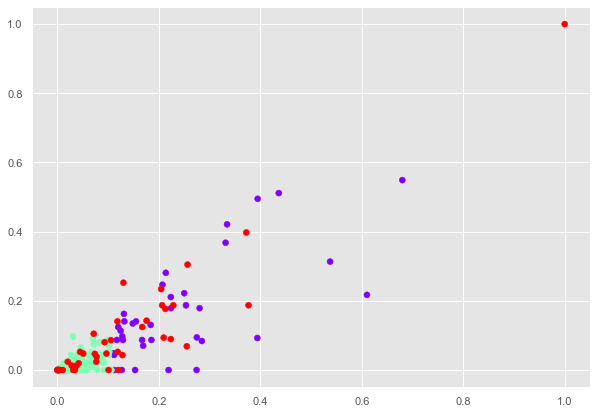

In [194]:

## Visualizacion en 2D

plt.figure(figsize=(10, 7))  
plt.scatter(zscore_df['Facturacion_total'], zscore_df['Facturacion_shampoo'], c=cluster_kmeans.Cluster, cmap='rainbow') 



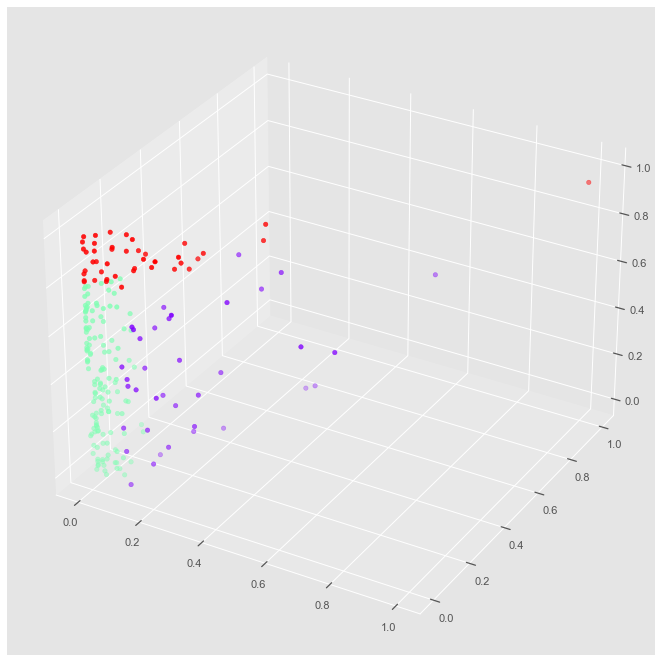

In [195]:
## Visualizacion en 3D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (18, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(zscore_df.Facturacion_total, zscore_df.Facturacion_acondicionador, zscore_df.id_venta, c=cluster_kmeans.Cluster ,cmap='rainbow')


In [196]:

### Métrica de Silueta

from sklearn.metrics import silhouette_score
silhouette_score(comport.values, cluster_kmeans.Cluster, metric='euclidean')

0.31840967163089173

# Modelos escogidos

In [198]:
from pandas.plotting import scatter_matrix

In [200]:
# Produce a scatter matrix for each pair of features in the data
graf = scatter_matrix(np.log(comport), alpha = 0.3, figsize = (14,14))

import warnings
warnings.filterwarnings('ignore')

TypeError: loop of ufunc does not support argument 0 of type int which has no callable log method